In [1]:
import pybel
import logging
import os
import networkx as nx
import nx2d3
import logging
from operator import itemgetter
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
g = pybel.from_bel('~/Desktop/AD.bel')

Failed: 4)  Using Drugs as Molecular Probes: Enabling a “Chemical Biology" Approach in Molecular Systems Biology of the Brain Mohammad Asif Emran Khan Emon, Alpha Tom Kodamullil1, Erfan Yonesi, Reagon Karki, Shahid Mohammad, Martin Hofmann-Apitius 5) Comorbidity analysis between Alzheimer’s disease and Type 2 Diabetes Mellitus based on disease network models and the role T2DM drug: metformin in AD Reagon Karki, Alpha Tom Kodamullil, Mufassra Naz, Martin Hofmann-Apitius  SET DOCUMENT Authors = "Alpha Tom Kodamullil, Reagon Karki, Mohammad Asif Emon, Mengjun Wu, Mufassra Naz, Daniel Domingo-Fernandez"
Failed: DEFINE NAMESPACE LMSD AS URL "https://dl.dropboxusercontent.com/u/43656618/LMSD.belns"
Failed: DEFINE NAMESPACE BRCO AS URL "http://belief.scai.fraunhofer.de/openbel/repository/namespaces/BRCO.belns"
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Evidence="Here, we show that siRNA-mediated loss of calsyntenin-1 in cultured neurons al

KEY NervousSystem
{'NervousSystem': 'Hippocampus', 'Evidence': 'A temporal sequence was observed whereby Aß accumulation is followed by expression of IL-1ß and eventually, of CXCL1, in the hippocampus and olfactory bulb but not the cortex.'}
{'Evidence': 'A temporal sequence was observed whereby Aß accumulation is followed by expression of IL-1ß and eventually, of CXCL1, in the hippocampus and olfactory bulb but not the cortex.'}


Failed: SET Evidence = "AICD was shown to induce the expression of genes having functional roles in actin organization and dynamics, including transgelin (SM22) and alpha2-actin, resulting in a loss of organized filamentous actin structures\
Failed: within the cell. In fact, overexpression of transgelin, a proposed AICD target gene, causes destabilization of actin filaments, depolarization of mitochondrial membrane potential (DeltaPsim), and significant alteration of mitochondrial\
Failed: distribution and morphology in human SHEP neuroblastoma cells and primary neurons. These data demonstrate that induction of AICD/APP significantly alters cytoskeletal dynamics and mitochondrial function in neuronal cells by\
Failed: interacting with JIP1b or Fe65." SET Pathway = {"Regulation of cytoskeleton","Amyloid precursor protein pathway"} a(PMICOMP:"Amyloid precursor protein intracellular domain") -> act(p(HGNC:TAGLN))         #TAGLN = transgelin act(p(HGNC:TAGLN)) -| bp(GOBP:"actin filament bi

KEY CellStructure
{'CellStructure': 'Mitochondria'}
{}
KEY CellStructure
{'CellStructure': 'Synapses'}
{}


Failed: bind tyrosine-phosphorylated APP, resulting in the recruitment of the components of the MAP kinase cascade (SoS, ras, Raf, MEK) leading to ERK1/2 activation."
Failed: SET Pathway = {"Amyloid precursor protein pathway","Ras pathway","Raf-MEK-ERK cascade pathway"}
Failed: complex(p(HGNC:APP,pmod(P,Y)) ,p(HGNC:SHC2),p(HGNC:GRB2)) -> p(HGNC:SOS1)
Failed: complex(p(HGNC:APP,pmod(P,Y)) ,p(HGNC:SHC2),p(HGNC:GRB2)) -> p(HGNC:SOS2)
Failed: complex(p(HGNC:APP,pmod(P,Y)) ,p(HGNC:SHC2),p(HGNC:GRB2)) -> p(SFAM:"RAS Family")
Failed: complex(p(HGNC:APP,pmod(P,Y)) ,p(HGNC:SHC2),p(HGNC:GRB2)) -> p(SFAM:"RAF Family")
Failed: complex(p(HGNC:APP,pmod(P,Y)) ,p(HGNC:SHC2),p(HGNC:GRB2)) -> p(SFAM:"MEK1/2 Family")
Failed: SET Evidence = "Schematic representation of the intracellular pathway by which AßPP and PS1 control the activation of the MAPK/ERK1/2 cascade and their final biological effects. In the figure is specified the interaction between APP\
Failed: intracellular domain and PS1 C-terminus, w

KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'Role of LPR8 activation in normal brain functioning and in neurodegeneration during AD.', 'Pathway': 'Cyclin-CDK pathway'}
{'Evidence': 'Role of LPR8 activation in normal brain functioning and in neurodegeneration during AD.', 'Pathway': 'Cyclin-CDK pathway'}


Failed: SET Pathway = {"Calcium dependent pathway","Raf-MEK-ERK cascade pathway"}
Failed: SET Pathway = {"Calcium dependent pathway","Jak pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Low density lipoprotein pathway"}
Failed: SET Evidence = "Upon binding, LRP8 transduces reelin signaling during neuronal development, and recent evidence has indicated that it interacts with the NR2A and NR2B subunits of NMDA receptor, being involved in neuronal functions\
Failed: such as maturation of NMDA receptor composition in the hippocampus, and the regulation of long-term potentiation. Subsequently, a novel interaction between reelin and AßPP was discovered, leading to increase in the cell surface\
Failed: levels of AßPP and affecting AßPP processing and Aß production. It was shown that reelin signaling in excitatory synapses can restore normal synaptic plasticity, which is impaired by oligomeric Aß peptides at concentrations\
Failed: within the range detectable in the brain

KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'Role of LPR8 activation in normal brain functioning and in neurodegeneration during AD.', 'Pathway': 'Cyclin-CDK pathway'}
{'Evidence': 'Role of LPR8 activation in normal brain functioning and in neurodegeneration during AD.', 'Pathway': 'Cyclin-CDK pathway'}


Failed: between APP and VLDLR" SET Pathway = {"Amyloid precursor protein pathway","Low density lipoprotein pathway","Cholesterol metabolism"} p(HGNC:APBB1) -- p(HGNC:VLDLR) ############################### SET Citation={"PubMed","J Neurosci. 2012 Mar 7;32(10):3352-65.","22399757"} SET Evidence="The ubiquitin-proteasome pathway is a major protein degradation pathway whose dysfunction is now\ widely accepted as a cause of neurodegenerative diseases, including Alzheimer's disease. Here we demonstrate that\ the F-box and leucine rich repeat protein2 (FBL2), a component of the E3 ubiquitin ligase complex, regulates\ amyloid precursor protein (APP) metabolism through APP ubiquitination."
Failed: SET Pathway = {"Ubiquitin degradation pathway","Amyloid precursor protein pathway"}
Failed: SET Evidence="Endoplasmic reticulum (ER)-associated degradation (ERAD) is a protective mechanism against ER stress in which unfolded proteins accumulated in the ER are selectively transported to the cytosol for

KEY CellStructure
{'CellStructure': 'Endoplasmic Reticulum'}
{}


Failed: SET Evidence="In the present study, we show that the PS1-mediated (or possibly the PS2-mediated) signal is essential for the APP-mediated death in a\
Failed: gamma-secretase-independent manner and vice versa. " SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"} act(p(HGNC:PSEN1)) -> p(HGNC:APP) act(p(HGNC:PSEN2)) -> p(HGNC:APP) SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"} p(HGNC:APP) -> bp(GOBP:"positive regulation of neuron apoptotic process") act(p(HGNC:PSEN1)) -> bp(GOBP:"positive regulation of neuron apoptotic process") act(p(HGNC:PSEN2)) -> bp(GOBP:"positive regulation of neuron apoptotic process") SET Evidence="MOCA (modifier of cell adhesion), which was originally\ identified as being a PS- and Rac1-binding protein, is a common downstream constituent of these neuronal death\ signals. Detailed molecular analysis indicates that MOCA is a key molecule of the AD-relevant neuronal death\ signals that links the PS-media

KEY NervousSystem
{'Cell': 'microglial cell', 'Pathway': 'Beta secretase pathway'}
KEY Cell
{'Cell': 'microglial cell', 'Pathway': 'Beta secretase pathway'}
{'Pathway': 'Beta secretase pathway'}


Failed: paper using cellular models for Alzheimer' disease (AD) of cultured PC12 cell lines and primary cultured hippocampal neurons. The aim of the present study was to uncover novel potential miR-124 targets and shed light\
Failed: on its function in the cellular AD model. MiR-124 expression was steadily altered when its mimic and inhibitor were transfected in vitro. The results showed the expression of BACE1, one of the potential functional downstream\
Failed: targets of miR-124, was well correlated with cell death induced by Aß neurotoxicity, and its expression level could be up- and down-regulated by suppression or over expression of miR-124 level respectively. These findings\
Failed: suggest that miR-124 may work as a basilic regulating factor to alleviate cell death in the process of AD by targeting BACE1, play an essential role in the control of BACE1 gene expression, and might be considered as a\
Failed: novel therapeutic target in treating AD."  SET Pathway = "Beta secretase 

KEY Pathway
{'Evidence': "Recently genome-wide association studies have identified significant association between Alzheimer's disease (AD) and variations in CLU, PICALM, BIN1, CR1, MS4A4/MS4A6E, CD2AP, CD33, EPHA1, and ABCA7", 'Pathway': 'Regulation of cytoskeleton'}
{'Evidence': "Recently genome-wide association studies have identified significant association between Alzheimer's disease (AD) and variations in CLU, PICALM, BIN1, CR1, MS4A4/MS4A6E, CD2AP, CD33, EPHA1, and ABCA7"}
KEY NervousSystem
{'NervousSystem': 'Autonomic Fibers, Postganglionic', 'Pathway': 'Sphingolipid metabolic pathway'}
{'Pathway': 'Sphingolipid metabolic pathway'}
KEY NervousSystem
{'Pathway': 'Endoplasmic reticulum-Golgi protein export pathway'}


Failed: p(HGNC:CST3,sub(T,25)) -> path(MESHD:"Alzheimer Disease")
Failed: SET Evidence="Two novel missense point mutations, Ser413Leu in the CHRNA4 gene and Gln397Pro in the CHRNB2 gene, were identified in two different AD cases but were not found in other AD cases and controls. These findings\
Failed: suggested that genetic polymorphisms of the neuronal nAChR genes might be related to the pathogenesis of sporadic AD."
Failed: SET Evidence="These findings suggest that the absence of CCR5 increases expression of CCR2, which leads to the activation of astrocytes causing Abeta deposit, and thereby impairs memory function. These results suggest\
Failed: that CCR5 may be a critical suppressor of the development and progression of AD pathology."  SET Pathway = "Chemokine signaling pathway"
Failed: SET Pathway = {"Chemokine signaling pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Akt pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Evidence="Several significant si

KEY FluidAndSecretion
{'FluidAndSecretion': 'Cerebrospinal Fluid', 'Evidence': 'Our findings support the notion that CSF tau and Abeta(1-42) may be useful biomarkers in the early identification of AD in MCI subjects.', 'Pathway': 'Amyloid precursor protein pathway'}
{'Evidence': 'Our findings support the notion that CSF tau and Abeta(1-42) may be useful biomarkers in the early identification of AD in MCI subjects.', 'Pathway': 'Amyloid precursor protein pathway'}
KEY FluidAndSecretion
{'Pathway': 'Tau protein pathway'}


Failed: SET Pathway = {"ATP binding cassette transport","Amyloid precursor protein pathway"}
Failed: SET Evidence="Since then, many of the cytokines and chemokines that have been studied in AD, including IL-1β, IL-6, TNF-α, IL-8, TGF-β and macrophage inflammatory protein-1α (MIP-1α) have been found to have altered expression\
Failed: compared with control individuals [22]."  SET Pathway = "Interleukin mediated signaling pathway"
Failed: SET Evidence="Dab1 significantly decreased the amount of APP bound to LRP and the level of secreted APP and APP-CTF in LRP expressing cells, unlike Fe65. It implies that overexpression of Dab1 diminish LRP-APP complex\
Failed: formation, resulting in altered APP processing." SET Pathway =  {"Reelin pathway","Low density lipoprotein pathway","Amyloid precursor protein pathway"} p(HGNC:DAB1) -| complex(p(HGNC:LRP1),p(HGNC:APP)) ############################# SET Citation={"PubMed","Neurosci Bull. 2010 Aug;26(4):338-44.","20651816"} SET Evidence="It is beli

KEY NervousSystem
{'NervousSystem': 'Astrocytes', 'Evidence': 'Nuclear factor-kappaB activation regulates cyclooxygenase-2 induction in human astrocytes in response to CXCL12: role in neuronal toxicity'}
{'Evidence': 'Nuclear factor-kappaB activation regulates cyclooxygenase-2 induction in human astrocytes in response to CXCL12: role in neuronal toxicity'}
KEY NervousSystem
{'NervousSystem': 'Neurons', 'Pathway': 'Tau protein pathway'}
{'Pathway': 'Tau protein pathway'}
KEY CellStructure
{'Evidence': 'Aß forms oligomers which can insert into the plasma membrane and form pores through which Ca2+ passes into the cytoplasm', 'Pathway': 'Membrane lipid metabolic pathway'}


Failed: SET Pathway = {"Beta secretase pathway","Calcium dependent pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Calcium dependent pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Evidence="Interaction of the protein reelin with the apolipoprotein E receptor (ApoER2) enhances Ca2+ influx through NMDA receptor channels by a mechanism involving a src family tyrosine kinsase (SFk);\
Failed: ApoE can block this effect of reelin" SET Pathway = {"Reelin pathway","Low density lipoprotein pathway"} p(HGNC:LRP8) -- p(HGNC:RELN) complex(p(HGNC:LRP8),p(HGNC:RELN)) -> bp(GOBP:"calcium ion import") complex(p(HGNC:LRP8),p(HGNC:RELN)) -- bp(GOBP:"regulation of N-methyl-D-aspartate selective glutamate receptor activity")  SET Pathway = "Reelin pathway"
Failed: SET Pathway = {"Reelin pathway","ApoE pathway"}
Failed: SET Pathway = {"ADAM Metallopeptidase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Raf-MEK-ERK cascade pathway",

KEY CellStructure
{'Evidence': 'There is also evidence that PS can interact directly or indirectly with RyR and SERCA (smooth endoplasmic reticulum Ca2+-ATPase) to alter ER Ca2+ release and uptake', 'CellStructure': 'Endoplasmic Reticulum', 'Pathway': 'Beta secretase pathway'}
{'Evidence': 'There is also evidence that PS can interact directly or indirectly with RyR and SERCA (smooth endoplasmic reticulum Ca2+-ATPase) to alter ER Ca2+ release and uptake', 'Pathway': 'Beta secretase pathway'}


Failed: SET Evidence="It was clarified what molecules related to cell death are activated in the case of AD and we discovered that caspase-4 plays a key role in ER stress-induced apoptosis. Caspase-4 also seems to act upstream\
Failed: of the beta-amyloid-induced ER stress pathway, suggesting that activation of caspase-4 might mediate neuronal cell death in AD"  SET Pathway = "Caspase pathway"
Failed: SET Evidence="Glutamate is the most abundant excitatory neurotransmitter of the mammalian nervous system. At the neuronal membrane, glutamate binds to ionotropic and metabotropic receptors. Ionotropic receptors include NMDA, kainate, and AMPA\
Failed: receptors" SET Pathway = {"Glutamatergic pathway","NMDA receptor"} a(CHEBI:"glutamate(2-)") -- bp(GOBP:"positive regulation of synaptic transmission, glutamatergic") a(CHEBI:"glutamate(1-)") -- bp(GOBP:"positive regulation of synaptic transmission, glutamatergic") complex(a(CHEBI:"glutamate(2-)"),p(SFAM:"GRIA Family")) -- bp(GOBP:"positive r

KEY NervousSystem
{'NervousSystem': 'Brain', 'Pathway': 'ApoE pathway'}
{'Pathway': 'ApoE pathway'}


Failed: SET Evidence="Microglia have neuroprotective capacities, yet chronic activation can promote neurotoxic inflammation. Neuronal fractalkine (FKN), acting on CX(3)CR1, has been shown to suppress excessive microglia\
Failed: activation." SET Pathway = {"Cytokines pathway","Interleukin mediated signaling pathway"} a(BRCO:Microglia) -- bp(GOBP:"neuron apoptotic process") a(BRCO:Microglia) -- path(MESHD:"Neurogenic Inflammation") p(HGNC:CX3CL1) -- p(HGNC:CX3CR1)       #fractalkine=CX3CL1 p(HGNC:CX3CL1) -| bp(GOBP:"microglial cell activation involved in immune response") p(HGNC:CX3CL1) -| bp(GOBP:"microglial cell activation") bp(GOBP:"microglial cell activation involved in immune response") -- bp(GOBP:"microglial cell activation") bp(GOBP:"microglial cell activation") -- bp(GOBP:"neuron apoptotic process") bp(GOBP:"neuron apoptotic process") -- path(MESHD:"Neurogenic Inflammation") bp(GOBP:"chronic inflammatory response")  -> bp(GOBP:"neuron apoptotic process") bp(GOBP:"microglial cell

KEY NervousSystem
{'NervousSystem': 'Microglia', 'Evidence': 'We examined the function of Interleukin-34 (IL-34), a newly discovered cytokine, on microglia because it reportedly induces proliferation of monocytes and macrophages.', 'Pathway': 'Interleukin mediated signaling pathway'}
{'Evidence': 'We examined the function of Interleukin-34 (IL-34), a newly discovered cytokine, on microglia because it reportedly induces proliferation of monocytes and macrophages.', 'Pathway': 'Interleukin mediated signaling pathway'}
KEY NervousSystem
{}
KEY NervousSystem
{}


Failed: SET Evidence="Mitochondrial dysfunction is a prominent feature of Alzheimer's disease (AD) brain.Mitochondrial biogenesis is regulated by the peroxisome proliferator activator receptor\
Failed: gamma-coactivator 1a (PGC-1a)-nuclear respiratory factor (NRF)-mitochondrial transcription factor A pathway. Expression levels of PGC-1a, NRF 1, NRF 2, and mitochondrial transcription factor A were significantly decreased\
Failed: in both AD hippocampal tissues and APPswe M17 cells, suggesting a reduced mitochondrial biogenesis. Indeed, APPswe M17 cells demonstrated decreased mitochondrial DNA/nuclear DNA ratio, correlated with reduced ATP content, and\
Failed: decreased cytochrome C oxidase activity." SET Pathway = {"Beta secretase pathway","Peroxosisome proliferator activated receptor pathway","Mitochondrial organization pathway"} path(MESHD:"Alzheimer Disease") -| bp(GOBP:"mitochondrion organization") p(HGNC:PPARG) -> bp(GOBP:"mitochondrion organization") #PPARG=PGC-1a p(HGNC:NRF1) ->

KEY CellStructure
{}


Failed: SET Evidence="Fractalkine/CX(3)CL1 is a transmembrane chemokine abundantly expressed in the brain by neurons, where it modulates glutamatergic transmission and long-term plasticity processes regulating the intercellular\
Failed: communication between glia and neurons, being its specific receptor CX(3)CR1 expressed by microglia"  SET Pathway = "Chemokine signaling pathway"
Failed: SET Evidence="Neuromuscular synapse formation requires an exchange of signals between motor neurons and muscle. Agrin, supplied by motor neurons, binds to Lrp4 in muscle, stimulating phosphorylation of MuSK and recruitment of\
Failed: a signaling complex essential for synapse-specific transcription and anchoring of key proteins in the postsynaptic membrane. Lrp4, like the LDLR and other Lrp-family members, contains an intracellular region with motifs that can\
Failed: regulate receptor trafficking, as well as assembly of an intracellular signaling complex." SET Pathway = "Low density lipoprotein pathwa

KEY Cell
{'Cell': 'microglial cell', 'Evidence': 'Recent evidence suggests that mononuclear phagocyte accumulation in the AD brain is dependent on chemokines. CCL2, a major monocyte chemokine, is upregulated in the AD brain.', 'Pathway': 'Chemokine signaling pathway'}
{'Evidence': 'Recent evidence suggests that mononuclear phagocyte accumulation in the AD brain is dependent on chemokines. CCL2, a major monocyte chemokine, is upregulated in the AD brain.', 'Pathway': 'Chemokine signaling pathway'}
KEY Cell
{'Cell': 'monocyte', 'Evidence': 'Recent evidence suggests that mononuclear phagocyte accumulation in the AD brain is dependent on chemokines. CCL2, a major monocyte chemokine, is upregulated in the AD brain.', 'Pathway': 'Chemokine signaling pathway'}
{'Evidence': 'Recent evidence suggests that mononuclear phagocyte accumulation in the AD brain is dependent on chemokines. CCL2, a major monocyte chemokine, is upregulated in the AD brain.', 'Pathway': 'Chemokine signaling pathway'}


Failed: SET Pathway = {"Peroxosisome proliferator activated receptor pathway","Beta secretase pathway"}
Failed: SET Evidence="We examined the effect of the two previously reported variants of PPAR  polymorphisms, the Pro12Ala and exon6 C478T, on the risk of LOAD and age of onset in a populati on- based f ol l ow- up sample of\
Failed: aged subj ects (125 LOAD patients and 462 non-demented controls). The genetic risk of AD was not significantly associated with the studied polymorphisms, but the PPARgamma Ala12-478T genotype carriers were significantly\
Failed: younger at the onset of dementia than the non-carriers (p = 0.026). These results suggest that the PPARgamma gene may modify the age of onset in LOAD"
Failed: SET Pathway = {"Interleukin mediated signaling pathway","Beta secretase pathway"}
Failed: SET Evidence="β-Amyloid (Aβ) plays a central role in Alzheimer's disease (AD) pathogenesis. Neurons are major sources of Aβ in the brain. However, astrocytes outnumber neurons by at lea

KEY NervousSystem
{'NervousSystem': 'Astrocytes'}
{}
KEY FluidAndSecretion
{'FluidAndSecretion': 'Cerebrospinal Fluid', 'Pathway': 'Amyloid precursor protein pathway'}
{'Pathway': 'Amyloid precursor protein pathway'}
KEY NervousSystem
{'NervousSystem': 'Brain', 'Pathway': 'Amyloid precursor protein pathway'}
{'Pathway': 'Amyloid precursor protein pathway'}


Failed: reactive oxygen species (ROS). Computer simulation studies show that A� interacts with both ANT and CypD. CypD/A� interaction causes an oxidative stress and increased MPTP opening that triggers neurodegeneration.\
Failed: CypD-deficient cortical mitochondria are resistant to A�- and Ca2+-induced mitochondrial swelling and MPTP opening. Adenine nucleotide translocase (ANT) is a transport protein for ADP and ATP and component of MPTP that\
Failed: binds directly to CypD. This interaction may facilitate its anchoring in the inner membrane and disturbance of the mitochondrial membrane potential, mitochondrial swelling and cell death. Interestingly, the MPTP also requires\
Failed: the participation of members of the Bcl-2 family proteins but a clear understanding of the interaction of A� with CypD together with both proapoptotic or antiapoptotic Bcl-2 family proteins in AD has not been made. The ability of\
Failed: CypD to protect neurons from A�- and oxidative stress-induced cell d

KEY NervousSystem
{'NervousSystem': 'Hippocampus', 'Evidence': 'CREB has been shown to be involved in certain types of hippocampal LTP as well as long-term memory, neurogenesis and synaptogenesis.', 'Pathway': 'CREB pathway'}
{'Evidence': 'CREB has been shown to be involved in certain types of hippocampal LTP as well as long-term memory, neurogenesis and synaptogenesis.', 'Pathway': 'CREB pathway'}


Failed: SET Evidence="SNAREs provide a large part of the specificity and energy needed for membrane fusion and, to do so, must be localized to their correct membranes. Here, we show that the R-SNAREs VAMP8, VAMP3, and VAMP2, which cycle\
Failed: between the plasma membrane and endosomes, bind directly to the ubiquitously expressed, PtdIns4,5P(2)-binding, endocytic clathrin adaptor CALM/PICALM. X-ray crystallography shows that the N-terminal halves of their SNARE\
Failed: motifs bind the CALM(ANTH) domain as helices in a manner that mimics SNARE complex formation. Mutation of residues in the CALM:SNARE interface inhibits binding in vitro and prevents R-SNARE endocytosis in vivo. Thus, CALM:R-SNARE\
Failed: interactions ensure that R-SNAREs, required for the fusion of endocytic clathrin-coated vesicles with endosomes and also for subsequent postendosomal trafficking, are sorted into endocytic vesicles. CALM's role in directing\
Failed: the endocytosis of small R-SNAREs may provide insigh

KEY CellLine
{'CellLine': 'HEK293', 'Evidence': 'We employed two cell lines, wild-type HEK293 cells and HEK293 cells stably expressing the longest human tau isoform (tau-441; HEK293/tau441 cells). We examined whether DEX, a synthetic GCs, induces tau phosphorylation and  μ-calpain activation. If so, we examined whether the DEX-induced tau phosphorylation and μ-calpain activation mediate the DEX-induced inhibition on the insulin-stimulated Akt phosphorylation. The results showed that DEX increased tau phosphorylation and induced tau-mediated μ-calpain activation.', 'Pathway': 'Insulin pathway'}
{'Evidence': 'We employed two cell lines, wild-type HEK293 cells and HEK293 cells stably expressing the longest human tau isoform (tau-441; HEK293/tau441 cells). We examined whether DEX, a synthetic GCs, induces tau phosphorylation and  μ-calpain activation. If so, we examined whether the DEX-induced tau phosphorylation and μ-calpain activation mediate the DEX-induced inhibition on the insulin-st

Failed: SET Pathway = {"Insulin pathway","Neurotrophic pathway"}
Failed: SET Pathway = {"Insulin pathway","Neurotrophic pathway"}
Failed: SET Pathway = {"Insulin pathway","Raf-MEK-ERK cascade pathway"}
Failed: SET Pathway = {"Insulin pathway","GSK3 pathway","Raf-MEK-ERK cascade pathway"}
Failed: SET Pathway = {"Insulin pathway","Phosphatidylinositol 3-kinase signaling pathway"}
Failed: SET Pathway = {"Insulin pathway","Acetylcholine signaling pathway"}
Failed: SET Pathway = {"Insulin pathway","ROS pathway"}
Failed: SET Pathway = {"Insulin pathway","Apoptosis signaling pathway"}
Failed: SET Pathway = {"Insulin pathway","Interleukin mediated signaling pathway"}
Failed: SET Pathway = {"Insulin pathway","Tumor necrosis factor pathway"}
Failed: SET Pathway = {"Insulin pathway","Tau protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Energy metabolic pathway"}
Failed: SET Pathway = {"Insulin pathway","Mitochondrial organization pathway"}
Failed: SET NervousSystem= {"Neurons","Oligode

KEY NervousSystem
{'MeSHDisease': 'Diabetes Mellitus, Type 2', 'NervousSystem': 'Brain', 'Evidence': 'This study carries additional significance because it established that, like all other pancreatic and intestinal polypeptide genes, the insulin gene was also expressed in the adult human brain. Moreover, the results taught us that endogenous brain deficiencies in insulin, IGF-1, IGF-2, and their corresponding receptors, in the absence of T2DM or obesity, could be linked to the most common form of dementia-associated neurodegeneration in the Western hemisphere.', 'Pathway': 'Insulin pathway'}
{'MeSHDisease': 'Diabetes Mellitus, Type 2', 'Evidence': 'This study carries additional significance because it established that, like all other pancreatic and intestinal polypeptide genes, the insulin gene was also expressed in the adult human brain. Moreover, the results taught us that endogenous brain deficiencies in insulin, IGF-1, IGF-2, and their corresponding receptors, in the absence of T2D

Failed: SET Pathway = {"Regulation of cytoskeleton","Insulin pathway"}
Failed: SET Pathway = {"Insulin pathway","Long term synaptic depression"}
Failed: SET Pathway = {"Insulin pathway","Acetylcholine signaling pathway"}
Failed: SET Pathway = {"Acetylcholine signaling pathway","Long term synaptic depression"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Caspase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Tau protein pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Mitochondrial organization pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Unfolded protein response","Beta secretase pathway","Response to endoplasmic reticulum stress"}


KEY NervousSystem
{'NervousSystem': 'Neurons', 'Evidence': 'In addition, the studies demonstrated AD Braak stage-associated declines in choline acetyltransferase (ChAT) expression with reduced colocalization of ChAT with insulin or IGF-1 receptor immunoreactivity in cortical neurons. These results correspond with experimental data demonstrating that neuronal tau and ChAT gene expression are regulated by IGF-1 and insulin stimulation.88 Therefore, brain insulin and IGF deficiency and resistance could account for the cytoskeletal collapse, neurite retraction, synaptic disconnection, loss of neuronal plasticity, and deficiencies in acetylcholine production, all of which correlate with cognitive decline and dementia in AD', 'Pathway': 'Acetylcholine signaling pathway'}
{'Evidence': 'In addition, the studies demonstrated AD Braak stage-associated declines in choline acetyltransferase (ChAT) expression with reduced colocalization of ChAT with insulin or IGF-1 receptor immunoreactivity in cor

Failed: SET Pathway = {"Amyloid precursor protein pathway","Synuclein pathway"}
Failed: SET Pathway = {"Insulin pathway","ApoE pathway"}
Failed: SET Pathway = {"Insulin pathway","ApoE pathway"}
Failed: SET Pathway = {"Ras pathway","Insulin pathway"}
Failed: SET Pathway = {"ApoE pathway","Insulin pathway"}
Failed: UNSET Patient
Failed: SET Pathway = {"ApoE pathway","Vitamin pathway"}


KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'Glucose transport within the brain is mostly insulin independent, suggesting that the primary role of brain insulin might be in signal transduction pathways involved in cognitive processes [Schulingkamp et al., 2000]. Indeed, studies have shown that insulin and insulin receptors are abundantly but selectively distributed in brain areas that are important for learning and memory [Schulingkamp et al., 2000], and treatment of both normal healthy individuals and patients with mild AD with insulin has been shown to improve cognition [Watson and Craft, 2004].', 'Pathway': 'Insulin pathway'}
{'Evidence': 'Glucose transport within the brain is mostly insulin independent, suggesting that the primary role of brain insulin might be in signal transduction pathways involved in cognitive processes [Schulingkamp et al., 2000]. Indeed, studies have shown that insulin and insulin receptors are abundantly but selectively distributed in brain area

Failed: SET Pathway = {"Wnt signaling pathway","Beta-Catenin pathway"}
Failed: SET Pathway = {"Wnt signaling pathway","GSK3 pathway"}
Failed: SET Pathway = {"Beta-Catenin pathway","Peroxosisome proliferator activated receptor pathway"}
Failed: SET Pathway = {"Peroxosisome proliferator activated receptor pathway","Inflammatory response pathway"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Peroxosisome proliferator activated receptor pathway","Beta secretase pathway"}
Failed: deg(a (Neurons)) -- bp(GOBP:cognition)
Failed: UNSET NervousSystem
Failed: UNSET NervousSystem
Failed: SET Pathway = {"Nerve growth factor pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Nerve growth factor pathway","SNP pathway"}
Failed: SET Pathway = {"Nerve growth factor pathway","Insulin pathway"}
Failed: SET Pathway = {"ApoE pathway","SNP pathway"}
Failed: SET Pathway = {"ApoE pathway","SNP pathway"}
Failed: SET Pathway = {"Nerve growth factor pathway","Apoptosis signaling pathway"}


KEY UserdefinedCellLine
{'UserdefinedCellLine': 'App transgenic', 'Evidence': "Rosiglitazone is a TZD derivative that was recently observed to improve cognition in both APP transgenic mice and AD patients [Watson et al., 2005; Pedersen et al., 2006]. It activates PPARγ leading to increased glucose disposal rates [Jung et al., 2005] and is also neuroprotective against Aβ neurotoxicity [Inestrosa et al., 2005]. Neuroprotection may result through modulation of Wnt signaling since an increase in β-catenin and inhibition of GSK-3β is observed upon exposure to rosiglitazone [Inestrosa et al., 2005], although a different study has shown that activation of PPARγ by a potent ligand leads to β-catenin degradation [Liu and Farmer 2004]. Nonetheless, in support of the role for PPARγ activation in neuroprotection, PPARγ agonists have potent anti-inflammatory effects [Luna-Medina et al., 2005], inhibit microglial activation [Bernardo et al., 2005; Heneka et al., 2005] and have been shown to improve 

Failed: UNSET NervousSystem
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Energy metabolic pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Amyloid precursor protein pathway","Insulin pathway"}
Failed: SET Pathway = {"Energy metabolic pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"ADAM Metallopeptidase pathway","Insulin pathway"}
Failed: SET Pathway = {"Insulin pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway","Insulin pathway"}
Failed: SET Pathway = {"ADAM Metallopeptidase pathway","Insulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway",  "Insulin pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Low density lipoprotein pathway"}
Failed: SET

KEY NervousSystem
{'Pathway': 'Nerve growth factor pathway', 'NervousSystem': 'Cholinergic Neurons', 'Evidence': 'Cholinergic hypothesis [3,4] has been used to elucidate the role of NGFR in AD pathogenesis because of selective loss of BFCN observed in AD patients. That is, elevated expression of NGFR and decreased TrkA may activate neuron apoptosis of NGFR on BFCN and thus reduce the interaction of NGFR with Aβ and proNGF, which lower the neurotoxicity and apoptosis of BFCN. All together, these mechanisms may explain the protective effect of NGFR rs734194 on the risk of AD observed in this study.'}
{'Pathway': 'Nerve growth factor pathway', 'Evidence': 'Cholinergic hypothesis [3,4] has been used to elucidate the role of NGFR in AD pathogenesis because of selective loss of BFCN observed in AD patients. That is, elevated expression of NGFR and decreased TrkA may activate neuron apoptosis of NGFR on BFCN and thus reduce the interaction of NGFR with Aβ and proNGF, which lower the neurotoxi

Failed: UNSET CellStructure
Failed: SET Pathway = {"Insulin pathway","Beta secretase pathway"}
Failed: UNSET UserdefinedCellLine
Failed: SET Pathway = {"Insulin pathway","Energy metabolic pathway"}
Failed: SET Pathway = {"Energy metabolic pathway","Insulin pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Insulin pathway"}
Failed: SET Pathway = {"Insulin pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Peroxosisome proliferator activated receptor pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Tau protein pathway","Cyclin-CDK pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Regulation of cytoskeleton"}
Failed: g(HGNC:ENO1) positiveCorrelation a("Beta cell")
Failed: a(PMICHEM:"tetanus toxin receptor") positiveCorrelation a("Beta cell")
Failed: a(PMICHEM:"a2b5 antigen") positiveCorrelation a("Beta cell")


KEY CellStructure
{'Evidence': 'The surface levels of both APP and LRP1 (low-density lipoprotein receptor-related protein 1), which are known to comigrate during trafficking, were dramatically reduced after metformin treatment as detected by biotinylation assays, whereas their total protein levels remained unchanged (Fig. 1D). However, the surface and the total BACE1 were markedly increased by metformin. Through further subfractionation, using sucrose gradients, we showed that metformin treatment caused changes in the compartmentalization of APP, as evidenced by increased distribution in trans-Golgi network (TGN) vesicles (fraction 2), including those trafficks en route to early endosomes and TGN (fraction 3), and decreased distribution in membranes (fraction 5) (Fig. S1 B and C). BACE1 protein levels were found to be elevated in all 3 fractions: 2, 3, and 5, with an ≈2-fold increase of the total protein. The increased distribution of both APP and BACE1 in fractions 2 and 3 are expecte

Failed: UNSET DigestiveSystem
Failed: SET Pathway = {"Insulin pathway","Cyclin-CDK pathway"}
Failed: SET Pathway = {"Insulin pathway","Cyclin-CDK pathway"}
Failed: SET Pathway = {"Insulin pathway","Cyclin-CDK pathway"}
Failed: SET Pathway = {"Acetylcholine signaling pathway","Cyclin-CDK pathway"}
Failed: act(g(HGNC:INS)) -- act(a("Beta cell"))
Failed: act(g(HGNC:PDX1)) -- act(a("Beta cell"))
Failed: act(g(HGNC:IAPP)) -- act(a("Beta cell"))


KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'Genes such as enolase, tetanus toxin receptor, and the A2B5 antigen initially found in the nervous system were later found to be expressed in β-cells (3). Another group of genes normally expressed in islet of Langerhans has been shown to be present in the nervous system. Some of these genes are only temporally expressed in the developing brain, such as insulin and the transcription factor IDX-1 (islet and duodenum homeobox-1) [PDX-1 (pancreatic and duodenal homeobox-1)] (4, 5, 6, 7), whereas other genes are permanently expressed, such as the genes for ATP-sensitive K+ channel (8, 9) and the LIM (Lin-11, Isl-1, and Mec-3) homeodomain protein islet-1 (10).', 'Pathway': 'Insulin pathway'}
{'Evidence': 'Genes such as enolase, tetanus toxin receptor, and the A2B5 antigen initially found in the nervous system were later found to be expressed in β-cells (3). Another group of genes normally expressed in islet of Langerhans has been show

Failed: act(g(HGNC:SLC2A2)) -- act(a("Beta cell"))
Failed: act(complex(p(HGNC:CDK5),p(HGNC:CDK5R1))) -- act(a("Beta cell"))
Failed: SET Pathway = {"Cyclin-CDK pathway","Dopamine pathway"}
Failed: SET Pathway = {"Insulin pathway","Cyclin-CDK pathway","Apoptosis signaling pathway","Low density lipoprotein pathway"}
Failed: SET Pathway = {"Insulin pathway","Cyclin-CDK pathway"}
Failed: SET Pathway = {"Insulin pathway","Nerve growth factor pathway"}
Failed: UNSET NervousSystem
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}
Failed: bp(GOBP:"maintenance of blood-brain barrier") -- bp("cerebral perfusion")
Failed: bp("cerebral perfusion") -> act(g(HGNC:APP))
Failed: bp("cerebral perfusion") -> a(ADO:"Abeta_42")
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}


KEY NervousSystem
{'NervousSystem': 'Neurons', 'Evidence': 'In neurons, p35/CDK5 regulates not only cytoskeletal dynamics and cell migration, but also the cAMP-dependent protein kinase A and the calcium-mediated signaling pathway (14). It also regulates dopamine signaling through phosphorylation of DARPP-32, which converts it into an inhibitor of protein kinase A (25). Therefore, we anticipate that in β-cells the presence of p35/CDK5 could be involved in the regulation of additional functional pathways. Our findings also indicate that in insulin-producing β-cells, CDK5 activity is predominantly regulated by variations in the expression of its activator p35, which, in turn, is regulated by extracellular glucose concentrations. During brain development, the expression of p35 seems to be constitutive, and regulation of CDK5 activity is dependent on its subcellular localization, phosphorylation by other protein kinases such as Abl, and association with other regulatory proteins (Dab1 and C

Failed: SET Pathway = {"Insulin pathway","Phosphatidylinositol 3 pathway"}
Failed: p(HGNC:IRS4,pmod(P,Y)) -> complex(p(HGNC:IRS4,pmod(P,Y)),p(HGNC:PIK3R1))
Failed: p(HGNC:IRS4,pmod(P,Y)) -> complex(p(HGNC:IRS4,pmod(P,Y)),p(HGNC:PIK3R2))
Failed: p(HGNC:IRS2,pmod(P,Y)) -> complex(p(HGNC:IRS2,pmod(P,Y)),p(HGNC:PIK3R1))
Failed: p(HGNC:IRS2,pmod(P,Y)) -> complex(p(HGNC:IRS2,pmod(P,Y)),p(HGNC:PIK3R2))
Failed: p(HGNC:IRS1,pmod(P,Y)) -> complex(p(HGNC:IRS1,pmod(P,Y)),p(HGNC:PIK3R1))
Failed: p(HGNC:IRS1,pmod(P,Y)) -> complex(p(HGNC:IRS1,pmod(P,Y)),p(HGNC:PIK3R2))
Failed: p(HGNC:IRS4,pmod(P,Y)) -> complex(p(HGNC:IRS4,pmod(P,Y)),p(HGNC:GRB2))
Failed: p(HGNC:IRS2,pmod(P,Y)) -> complex(p(HGNC:IRS2,pmod(P,Y)),p(HGNC:GRB2))


KEY NervousSystem
{'NervousSystem': 'Neurons', 'Evidence': "The  signaling mechanisms and  the  biological   effects  of insulin and IGF-l have been studied  mainly  in classical insulin target  tissues, such  as skeletal muscle,  fat  and  liver, with' respect   to  glucose  uptake,  regulation of  cell   proliferation, gene. expression and  the suppression of hepatic glucose pro\xad duction.  Over  the  past  few  years,  it has  become clear that insulin  and  IGF-1  also  have  profound effects  in the central nervous   system   (CNS), regulating  key  processes such   as energy  homeostasis, neuronal survival, and  longevity  as well as learning  and memory.", 'Pathway': 'Insulin pathway'}
{'Evidence': "The  signaling mechanisms and  the  biological   effects  of insulin and IGF-l have been studied  mainly  in classical insulin target  tissues, such  as skeletal muscle,  fat  and  liver, with' respect   to  glucose  uptake,  regulation of  cell   proliferation, gene. expression an

Failed: p(HGNC:IRS1,pmod(P,Y)) -> complex(p(HGNC:IRS1,pmod(P,Y)),p(HGNC:GRB2))
Failed: p(HGNC:IRS4,pmod(P,Y)) -> complex(p(HGNC:IRS4,pmod(P,Y)),p(HGNC:PTPN11))
Failed: p(HGNC:IRS2,pmod(P,Y)) -> complex(p(HGNC:IRS2,pmod(P,Y)),p(HGNC:PTPN11))
Failed: p(HGNC:IRS1,pmod(P,Y)) -> complex(p(HGNC:IRS1,pmod(P,Y)),p(HGNC:PTPN11))
Failed: SET Pathway = {"Phosphatidylinositol 3 pathway","GSK3 pathway"}
Failed: SET Pathway = {"Phosphatidylinositol 3 pathway","Bcl-2/Beclin 1 pathway"}
Failed: UNSET UserdefinedSpecies
Failed: SET Pathway = {"Insulin pathway","Raf-MEK-ERK cascade pathway"}
Failed: SET Pathway = {"Insulin pathway","Raf-MEK-ERK cascade pathway"}
Failed: SET Pathway = {"Apoptosis signaling pathway","Response to oxidative stress pathway","Raf-MEK-ERK cascade pathway"}
Failed: SET Pathway = {"Insulin pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Insulin pathway","Raf-MEK-ERK cascade pathway"}
Failed: SET Pathway = {"Insulin pathway","Tau protein pathway"}
Failed: SET P

KEY UserdefinedSpecies
{'UserdefinedSpecies': 'C elegans', 'Evidence': 'Activation of the  catalytic subunit of  the  Pl3-kinase re\xad sults   in   phosphorylation   of   phosphatidylinositide-diphos\xad phate (PI4,sP) to generate phosphatidylinositide-triphosphate (PI3,4.sP). This  leads to activation of several  downstream tar\xad gets,   such    as   phosphoinositide-dependent  Rrotein   kinase (PDK)-1, rotein k nase B (PKB, AKT),  p705  kinase, glycogen synthase kmase(GSK)-3and BAD  a proapoptotic member ?f thBcl-2  family.  Phosphorylation of GSK-3P and  BAD mact1vates these  proteins  and thereby  inhibits  further  sia nal\xad ing leading  to apoptosis. Activated  AKT  phosphorylatethe forkhed transcription factor  Foxo, which  triggers its nuclear excl usiOn and  thereby   regulates   transcription of  aenes   in\xad volved  in development, growth, stress  resistance, :poptosis, metabolism  an d  ag ing  [29-31]. Several  Foxo   target  genes might  play  an  importarJt  role 

Failed: SET Pathway = {"Amyloid precursor protein pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Raf-MEK-ERK cascade pathway"}
Failed: SET Pathway = {"Insulin pathway","Nerve growth factor pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Nerve growth factor pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Phosphatidylinositol 3 pathway","Focal adhesion","Cell adhesion pathway"}
Failed: SET Pathway = {"Tau protein pathway","GSK3 pathway"}
Failed: SET Pathway = {"Tau protein pathway","Cyclin-CDK pathway"}
Failed: SET Pathway = {"Tau protein pathway","Jak pathway"}
Failed: SET Pathway = {"Tau protein pathway","MAPK-ERK pathway"}
Failed: SET Pathway = {"Insulin pathway","GSK3 pathway"}


KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': "Taken   together, the   BBB  is  an  important interface  between  the blood  and the CNS  compartment regu\xad lating  uptake  of  insulin  and IGF-1   into the  bra in. However, the molecul ar mech anisms  by which  different conditions like aging  or AD decrease insulin 's transport to the  brain  are  not known   yet.   Wh eth er  these mech anisms   contribute  to  th e pathogenesis of AD and cognitive decline is still  unclear.", 'Pathway': 'Insulin pathway'}
{'Evidence': "Taken   together, the   BBB  is  an  important interface  between  the blood  and the CNS  compartment regu\xad lating  uptake  of  insulin  and IGF-1   into the  bra in. However, the molecul ar mech anisms  by which  different conditions like aging  or AD decrease insulin 's transport to the  brain  are  not known   yet.   Wh eth er  these mech anisms   contribute  to  th e pathogenesis of AD and cognitive decline is still  unclear.", 'Pathway': 'Insuli

Failed: SET Pathway = {"Insulin pathway","Akt pathway"}
Failed: SET Pathway = {"Insulin pathway","Akt pathway","GSK3 pathway"}
Failed: SET Pathway = {"Insulin pathway","Tau protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Tau protein pathway"}
Failed: SET Pathway = {"Insulin pathway","GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Insulin pathway","Tau protein pathway"}
Failed: SET Pathway = {"Neurotrophic pathway","Insulin pathway"}
Failed: SET Pathway = {"Neurotrophic pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Sphingolipid metabolic pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Insulin pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}


KEY CellLine
{'CellLine': 'SH-SY5Y', 'Pathway': 'Tau protein pathway', 'Evidence': 'In  SHSY5Y  cells,  a  human  neuroblastom a  cell  line,  as well  as  in  primary   cultu res  of  rat  cortical   neurons  insulin ad ministrat ion  leads to tau  hyperphosphorylation (111-113]. In contrast, insulin  and  IGF- 1   administration in NT2N cells, cultured    human    neurons,    decreases   tau   phosphorylat ion [114].  In primary cortical  n euron cultures, M esk e et a/ . (115J found  that  insulin  treatment causes  a regulatory  interaction between  PP2A  and  GSK-3.  Inhibition of  Pl3-kinase leads to activat ion of GSK-3and PP2A.  Enzyme  activity  of  both enzymes al ways  changed  in  the  same   direction. This   bal\xad anced  response  seemed to  induce  a steady  state  in tau  phos\xad phorylation  at GSK-3/PP2A-dependent sites   (115].  Thus, on ly a dysbalance of  insulin/IGF-1 regulated tau kinases  and phosphatases  might  lead  to tau   hyperphosphorylation,  partiall

Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway","Endothelin pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Low density lipoprotein pathway","Alpha 2 macroglobulin"}
Failed: complex(p(HGNC:IDE),a(ubiquitin)) -| act(p(HGNC:IDE))
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Tau protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Tau protein pathway"}
Failed: SET Pathway = {"Insulin pathway","ApoE pathway"}
Failed: SET Pathway = {"Insulin pathway","ApoE pathway"}
Failed: UNSET Patient
Failed: UNSET Tissue


KEY NervousSystem
{'NervousSystem': 'Hippocampus', 'Evidence': 'Aβ degrading activity by IDE was shown to be lower in AD brains than in the controls [71]. Moreover, the amount of hippocampal IDE protein was also found to reduce in AD brains as compared to the controls [15]. When the IDE gene was deleted in mouse model, Aβ levels in the brain were elevated [27] and [58], suggesting IDE activity is critical in determining the amount of brain Aβ in vivo. More significantly, enhanced IDE activity in the IDE and APP double transgenic mice decreased their brain Aβ levels, and prevented the formation of AD pathology [52].', 'Pathway': 'Insulin pathway'}
{'Evidence': 'Aβ degrading activity by IDE was shown to be lower in AD brains than in the controls [71]. Moreover, the amount of hippocampal IDE protein was also found to reduce in AD brains as compared to the controls [15]. When the IDE gene was deleted in mouse model, Aβ levels in the brain were elevated [27] and [58], suggesting IDE activit

Failed: SET Pathway = {"Insulin pathway","Long term potentiation","Long term synaptic potentiation","NMDA receptor"}
Failed: act(a(NMDAR)) -> bp(MESHPP:"Long-Term Potentiation")
Failed: p(HGNC:INS) -> a(NMDAR)
Failed: SET Evidence="The expression of microRNA miR-107 decreases early in Alzheimer's disease and may accelerate disease progression through regulation of beta-site amyloid precursor protein-cleaving enzyme 1. Among\
Failed: the AD-related miRNA expression changes, miR-107 was exceptional because miR-107 levels decreased significantly even in patients with the earliest stages of pathology. In situ hybridization with\
Failed: cross-comparison to neuropathology demonstrated that particular cerebral cortical laminas involved by AD pathology exhibit diminished neuronal miR-107 expression. Computational analysis predicted\
Failed: that the 3'-untranslated region (UTR) of beta-site amyloid precursor protein-cleaving enzyme 1 (BACE1) mRNA is targeted multiply by miR-107."
Failed: SET 

KEY FluidAndSecretion
{'FluidAndSecretion': 'Cerebrospinal Fluid', 'Evidence': 'We found that patients with Alzheimer’s disease had lower CSF insulin levels, higher plasma insulin levels and reduced insulin-mediated glucose disposal compared with healthy control individuals,[ 89,90] a pattern consistent with insulin resistance.', 'Pathway': 'Insulin pathway'}
{'Evidence': 'We found that patients with Alzheimer’s disease had lower CSF insulin levels, higher plasma insulin levels and reduced insulin-mediated glucose disposal compared with healthy control individuals,[ 89,90] a pattern consistent with insulin resistance.', 'Pathway': 'Insulin pathway'}
KEY FluidAndSecretion
{'FluidAndSecretion': 'Plasma', 'Evidence': 'We found that patients with Alzheimer’s disease had lower CSF insulin levels, higher plasma insulin levels and reduced insulin-mediated glucose disposal compared with healthy control individuals,[ 89,90] a pattern consistent with insulin resistance.', 'Pathway': 'Insulin pat

Failed: SET Evidence ="We show that miRNAs belonging to the miR-20a family (that is, miR-20a, miR-17-5p and miR-106b) could regulate APP expression in vitro and at the endogenous level in neuronal cell lines. \
Failed: A tight correlation between these miRNAs and APP was found during brain development and in differentiating neurons. We thus identify miRNAs as novel endogenous regulators of APP expression, suggesting that variations \
Failed: in miRNA expression could contribute to changes in APP expression in the brain during development and disease. This possibility is further corroborated by the observation that a statistically significant decrease in miR-106b \
Failed: expression was found in sporadic AD patients."  SET Pathway = "miRNA pathway"
Failed: SET Evidence ="Here we provide evidence in human neural (HN) cells of an aluminum-sulfate- and reactive oxygen species (ROS)-mediated up-regulation of an NF-kappaB-sensitive miRNA-146a that down-regulates the expression of \
Failed: 

KEY Pathway
{'Evidence': 'GWAS Central', 'Pathway': 'Endosomal lysosomal pathway'}
{'Evidence': 'GWAS Central'}
KEY Pathway
{'Evidence': 'GWAS Central', 'Pathway': 'Axonal guidance'}
{'Evidence': 'GWAS Central'}


Failed: SET Pathway = {"Caspase pathway","Electron transport chain"}


KEY Pathway
{'Evidence': 'GWAS Central', 'Pathway': 'Axonal guidance'}
{'Evidence': 'GWAS Central'}
KEY Pathway
{'Evidence': 'GWAS Central', 'Pathway': 'Amyloid precursor protein pathway'}
{'Evidence': 'GWAS Central'}
KEY Pathway
{'Evidence': 'GWAS Central', 'Pathway': 'Mitochondrial translocation pathway'}
{'Evidence': 'GWAS Central'}
KEY Pathway
{'Evidence': 'GWAS Central', 'Pathway': 'Amyloid precursor protein pathway'}
{'Evidence': 'GWAS Central'}


Failed: UNSET Pathway
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"ROS pathway"}
Failed: SET Pathway = {"Insulin pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Low density lipoprotein pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Phosphatidylinositol 3 pathway"}
Failed: SET MeSHDisease = {"Alzheimer Disease","Diabetes Mellitus, Type 2"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Insulin pathway","Phosphatidylinositol 3 pathway","GSK3 pathway","Tau protein pathway"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Insulin pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Insulin pathway","Phosphatidylinositol 3 pathway","Akt pathway","Tau protein pathway"}


KEY Pathway
{'Evidence': 'GWAS Central'}
KEY MeSHDisease
{'Evidence': 'GWAS Central', 'Pathway': 'Immunoglobulin pathway'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'NervousSystem': 'Neurons', 'Evidence': "It has been argued that in late-onset Alzheimer's disease a disturbance in the control of neuronal glucose metabolism consequent to impaired insulin signalling strongly resembles the pathophysiology of type 2 diabetes in non-neural tissue."}
{'NervousSystem': 'Neurons', 'Evidence': "It has been argued that in late-onset Alzheimer's disease a disturbance in the control of neuronal glucose metabolism consequent to impaired insulin signalling strongly resembles the pathophysiology of type 2 diabetes in non-neural tissue."}
KEY NervousSystem
{'NervousSystem': 'Neurons', 'Evidence': "It has been argued that in late-onset Alzheimer's disease a disturbance in the control of neuronal glucose metabolism consequent to impaired insulin signalling strongly resembles the pathophysiolog

Failed: SET Pathway = {"Insulin pathway","Phosphatidylinositol 3 pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Insulin pathway","Acetylcholine signaling pathway"}
Failed: SET Pathway = {"Insulin pathway","GSK3 pathway"}
Failed: SET Pathway = {"Insulin pathway","Akt pathway"}
Failed: SET Pathway = {"Insulin pathway","Regulation of cytoskeleton"}


KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'The levels and the activation of the insulin-PI3K-AKT signalling components correlated negatively with the level of tau phosphorylation and positively with protein O-GlcNAcylation, suggesting that impaired insulin-PI3K-AKT signalling might contribute to neurodegeneration in AD through down-regulation of O-GlcNAcylation and the consequent promotion of abnormal tau hyperphosphorylation and neurodegeneration.'}
{'Evidence': 'The levels and the activation of the insulin-PI3K-AKT signalling components correlated negatively with the level of tau phosphorylation and positively with protein O-GlcNAcylation, suggesting that impaired insulin-PI3K-AKT signalling might contribute to neurodegeneration in AD through down-regulation of O-GlcNAcylation and the consequent promotion of abnormal tau hyperphosphorylation and neurodegeneration.'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'NervousSystem': 'Brain', 'Evidence': 'The 

Failed: SET Pathway = {"Amyloid precursor protein pathway","Cholesterol metabolism"}
Failed: SET Pathway = {"Insulin pathway","Inflammatory response pathway"}
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Acetylcholine signaling pathway"}
Failed: SET Pathway = {"Insulin pathway","Cholesterol metabolism"}
Failed: SET Pathway = {"Insulin pathway","Tau protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Cholesterol metabolism"}
Failed: SET Pathway = {"Insulin pathway","Tau protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Lipid metabolic pathway","Beta-Oxidation of Fatty Acids pathway"}
Failed: SET Pathway = {"Lipid metabolic pathway","Inflammatory response pathway","Beta-Oxidation of F

KEY NervousSystem
{'NervousSystem': 'Neurons', 'Evidence': 'In addition, excitotoxicity from the overstimulation of glutamate receptors is considered a major cause of neuron death in AD and statins may be promising agents for protecting against memory loss.'}
{'Evidence': 'In addition, excitotoxicity from the overstimulation of glutamate receptors is considered a major cause of neuron death in AD and statins may be promising agents for protecting against memory loss.'}
KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'We also explore the contribution of brain inflammation to defective insulin signaling and neuronal dysfunction.'}
{'Evidence': 'We also explore the contribution of brain inflammation to defective insulin signaling and neuronal dysfunction.'}
KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'Insulin-degrading enzyme (IDE) is central to the turnover of insulin and degrades amyloid beta (Abeta) in the mammalian brain.'}
{'Evidence': 'Insulin-degrading enzyme 

Failed: SET Pathway = {"Lipid metabolic pathway","Beta-Oxidation of Fatty Acids pathway"}
Failed: SET Pathway = {"Insulin pathway","Peroxosisome proliferator activated receptor pathway"}
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Tau protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Response to endoplasmic reticulum stress"}
Failed: SET Pathway = {"Beta secretase pathway","Response to endoplasmic reticulum stress"}
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway","Calcium dependent pathway"}
Failed: SET Pathway = {"Insulin pathway","Response to oxidative stress pathway"}


KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "In a replication study, we confirmed significant association of SNPs within three genes--PPARgamma, SOS2, and PCK1--with Alzheimer's disease."}
{'Evidence': "In a replication study, we confirmed significant association of SNPs within three genes--PPARgamma, SOS2, and PCK1--with Alzheimer's disease."}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'In early-onset familial Alzheimer disease, the inhibition of neuronal insulin receptor function may be due to competitive binding of amyloid beta (Abeta) to the insulin receptor.'}
{'Evidence': 'In early-onset familial Alzheimer disease, the inhibition of neuronal insulin receptor function may be due to competitive binding of amyloid beta (Abeta) to the insulin receptor.'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'NervousSystem': 'Neurons', 'Evidence': 'In late-onset sporadic Alzheimer disease, the neuronal insulin receptor may be desensitized by i

Failed: SET MeSHDisease = {"Diabetes Mellitus, Type 2","Alzheimer Disease"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Amyloid precursor protein pathway","Amylin pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Calcium dependent pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Akt pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Jak pathway"}
Failed: SET Pathway = {"Calcium dependent pathway","Amylin pathway"}
Failed: SET Pathway = {"Amylin pathway","Jak pathway"}
Failed: SET Pathway = {"Calcium dependent pathway","Amylin pathway"}
Failed: a(AC253) -| a(SCHEM:Calcium)
Failed: SET Pathway = {"Amylin pathway","Jak pathway"}
Failed: a(AC253) -| bp(GOBP:"MAP kinase activity")
Failed: SET Pathway = {"Amylin pathway","Jak pathway"}


KEY NervousSystem
{'NervousSystem': 'Hypothalamus', 'Evidence': "Alzheimer's beta-amyloid, human islet amylin, and prion protein fragment evoke intracellular free calcium elevations by a common mechanism in a hypothalamic GnRH neuronal cell line.", 'Pathway': 'Amyloid precursor protein pathway'}
{'Evidence': "Alzheimer's beta-amyloid, human islet amylin, and prion protein fragment evoke intracellular free calcium elevations by a common mechanism in a hypothalamic GnRH neuronal cell line.", 'Pathway': 'Amyloid precursor protein pathway'}
KEY MeSHDisease
{'Evidence': "These results suggest that unregulated Ca(2+) entry across amyloid channels may be a common mechanism causing cell death, not only in diseases of the third age, including Alzheimer's disease and type 2 diabetes mellitus, but also in prion-induced diseases.", 'Pathway': 'Amylin pathway'}


Failed: a(AC253) -| p(SFAM:"AKT Family")
Failed: a(AC253) -| p(HGNC:FOS)
Failed: SET Pathway = {"Amyloid precursor protein pathway","Amylin pathway"}
Failed: complex(a("Amylin receptor"),p(HGNC:IAPP)) -> act(a("Amylin receptor"))
Failed: complex(a("Amylin receptor"),a(ADO:"Abeta_42")) -> act(a("Amylin receptor"))
Failed: act(a("Amylin receptor")) -> act(a(AC253))
Failed: act(a("Amylin receptor")) -> act(a(AC253))
Failed: SET Pathway = {"Endosomal lysosomal pathway","Insulin pathway"}
Failed: SET FluidAndSecretion = {"Plasma","Bodily Secretions"}
Failed: SET Pathway = {"Endosomal lysosomal pathway","Insulin pathway","Enzyme secretion pathway"}
Failed: UNSET FluidAndSecretion
Failed: SET Pathway  = {"Low density lipoprotein pathway","Insulin pathway"}


KEY FluidAndSecretion
{'Evidence': 'In particular, plasma β-Galactosidase and β-Hexosaminidase levels were higher in patients with AD-T2DM compared to those with T2DM, suggesting different mechanisms leading to enzyme secretion.', 'CellStructure': 'Lysosomes'}
KEY FluidAndSecretion
{'FluidAndSecretion': 'Plasma', 'Evidence': 'Statistical analyses based on ROC curves showed that both β-Galactosidase and β-Hexosaminidase activities, either intracellular or plasma-secreted, may be used to discriminate AD patients from controls and AD-T2DM from T2DM patients.', 'CellStructure': 'Lysosomes'}
{'Evidence': 'Statistical analyses based on ROC curves showed that both β-Galactosidase and β-Hexosaminidase activities, either intracellular or plasma-secreted, may be used to discriminate AD patients from controls and AD-T2DM from T2DM patients.', 'CellStructure': 'Lysosomes'}
KEY Patient
{'Evidence': 'The median (18)F-FDG ratio was lower in diabetic individuals than in nondiabetic individuals in the 

Failed: SET MeSHDisease = {"Alzheimer Disease","Diabetes Mellitus, Type 2"}
Failed: UNSET MeSHDisease
Failed: path(PMID:Hyperamylinemia) -- deg(a("Beta cell"))
Failed: sec(p(HGNC:IAPP)) -- deg(a("Beta cell"))
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Tau protein pathway"}
Failed: SET Pathway = {"Insulin pathway","Tau protein pathway","Glucose oxidation"}
Failed: SET Pathway = {"Glucagon pathway","Insulin pathway"}
Failed: SET Pathway = {"Glucagon pathway","Insulin pathway","Amyloid precursor protein pathway","Tau protein pathway"}
Failed: UNSET Pathway


KEY DigestiveSystem
{'Species': '10116', 'Evidence': 'A key transcriptional response to IIS is the inhibition of hepatic gluconeogenic gene expression, and, in rat liver cells, CQ represses expression of the key gluconeogenic regulatory enzymes PEPCK (phosphoenolpyruvate carboxykinase) and G6Pase (glucose-6-phosphatase).', 'DigestiveSystem': 'Liver'}
{'Species': '10116', 'Evidence': 'A key transcriptional response to IIS is the inhibition of hepatic gluconeogenic gene expression, and, in rat liver cells, CQ represses expression of the key gluconeogenic regulatory enzymes PEPCK (phosphoenolpyruvate carboxykinase) and G6Pase (glucose-6-phosphatase).'}
KEY Species
{'Species': '10116', 'Evidence': 'A key transcriptional response to IIS is the inhibition of hepatic gluconeogenic gene expression, and, in rat liver cells, CQ represses expression of the key gluconeogenic regulatory enzymes PEPCK (phosphoenolpyruvate carboxykinase) and G6Pase (glucose-6-phosphatase).'}
{'Evidence': 'A key trans

Failed: SET Pathway = {"Beta secretase pathway","Notch signaling pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Notch signaling pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Galanin pathway","Neuroprotective pathway","Acetylcholine signaling pathway"}
Failed: SET Pathway = {"Galanin pathway","Neuroprotective pathway"}
Failed: SET Pathway = {"Galanin pathway","Neuroprotective pathway","Tau protein pathway"}
Failed: SET Pathway = {"Cholesterol metabolism","Neuroprotective pathway"}


KEY Species
{'Species': '10116', 'Evidence': 'The present study examines the efficacy of Saxagliptin, a DPP-4 inhibitor in a streptozotocin (STZ) induced rat model of AD. Three months following induction of AD by intracerebral administration of streptozotocin, animals were orally administered Saxagliptin (0.25, 0.5 and 1 mg/kg) for 60 days. The effect of the DPP-4 inhibitor on hippocampal GLP-1 levels, Aβ burden, tau phosphorylation, inflammatory markers and memory retention were evaluated. The results reveal an attenuation of Aβ, tau phosphorylation and inflammatory markers and an improvement in hippocampal GLP-1 and memory retention following treatment.'}
{'Evidence': 'The present study examines the efficacy of Saxagliptin, a DPP-4 inhibitor in a streptozotocin (STZ) induced rat model of AD. Three months following induction of AD by intracerebral administration of streptozotocin, animals were orally administered Saxagliptin (0.25, 0.5 and 1 mg/kg) for 60 days. The effect of the DPP-4

Failed: SET Pathway = {"Cholesterol metabolism","Apoptosis signaling pathway"}
Failed: SET Pathway = {"Cholesterol metabolism","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Hydrolysis of homocysteine thiolactone pathway"}
Failed: SET UserdefinedCellLine = {"293APPwt","CHOAPPsw"}
Failed: UNSET UserdefinedCellLine
Failed: SET Pathway = {"ROS pathway","Hydrolysis of homocysteine thiolactone pathway"}
Failed: UNSET Pathway
Failed: SET Pathway = {"Albumin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Albumin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Low density lipoprotein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Low density lipoprotein pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Low density lipoprotein pathway","Tau protein pathway"}
Failed: SET Pathway = {"Low density lipoprotein pathway","Synaptic vesicle endocytosis pathway"}


KEY UserdefinedCellLine
{'UserdefinedCellLine': 'Neuroblastoma cell', 'Evidence': 'Seladin-1 was considered a novel neuroprotective factor, because of its anti-apoptotic activity. Subsequently, it was demonstrated that seladin-1 has also enzymatic activity [3-β-hydroxysterol delta-24-reductase, (DHCR24)], which catalyzes the synthesis of cholesterol from desmosterol. The amount of membrane cholesterol may play an important role both in protecting neuronal cells against toxic insults and in inhibiting the production of β-amyloid. We demonstrated that seladin-1 overexpression increases the amount of membrane cholesterol and induces resistance against β-amyloid aggregates in neuroblastoma cells, whereas a specific inhibitor of DHCR24 increased cell vulnerability. We also hypothesized that seladin-1 might be a mediator of the neuroprotective effects of estrogens. We first demonstrated that, in human fetal neuroepithelial cells (FNC), 17β-estradiol, raloxifene, and tamoxifen exert protectiv

Failed: SET Pathway = {"Caspase pathway","Electron transport chain","Bcl-2 pathway","Bcl-2/Beclin 1 pathway"}
Failed: UNSET Pathway
Failed: UNSET NervousSystem
Failed: SET Pathway = {"ATP binding cassette transport","Glucose oxidation"}
Failed: SET Pathway = {"Regulation of cytoskeleton","Wnt signaling pathway","Axonal guidance","Nerve growth factor pathway"}
Failed: UNSET Pathway


KEY Patient
{'Evidence': 'At Wave 1, MCI subjects had lower levels of ApoA1, ApoA2 and ApoH, and higher levels of ApoE and ApoJ, and a higher ApoB/ApoA1 ratio. Carriers of the apolipoprotein E ε4 allele had significantly lower levels of plasma ApoE, ApoC3 and ApoH and a significantly higher level of ApoB. ', 'Patient': 'APOE e4 +ve', 'Pathway': 'ApoE pathway'}
{'Evidence': 'At Wave 1, MCI subjects had lower levels of ApoA1, ApoA2 and ApoH, and higher levels of ApoE and ApoJ, and a higher ApoB/ApoA1 ratio. Carriers of the apolipoprotein E ε4 allele had significantly lower levels of plasma ApoE, ApoC3 and ApoH and a significantly higher level of ApoB. ', 'Pathway': 'ApoE pathway'}
KEY Species
{'Species': '10116', 'Evidence': ' We tested the effects of native GIP and the agonist N-AcGIP on synaptic plasticity [long-term potentiation (LTP)] in the hippocampus [15 nmol, administered intracerebroventricularly (icv)] and report for the first time that both peptides have enhancing effects on L

Failed: SET Pathway = {"Leptin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Leptin pathway","Tau protein pathway"}
Failed: SET Pathway = {"Leptin pathway","GSK3 pathway","Tau protein pathway"}
Failed: UNSET Pathway
Failed: SET Pathway = {"Dopamine pathway","Serotonergic pathway"}
Failed: SET Pathway = {"Dopamine pathway","Serotonergic pathway"}
Failed: SET Pathway = {"Dopamine pathway","Serotonergic pathway"}
Failed: SET Pathway = {"Dopamine pathway","Serotonergic pathway"}


KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'We analyzed leptin levels in CSF, and the concentration and localization of leptin and leptin receptor in the hippocampus. Significant elevations in leptin levels in both CSF and hippocampal tissue of AD patients, compared with age-matched control cases, indicate a physiological up-regulation of leptin in AD. However, the level of leptin receptor mRNA decreased in AD brain and the leptin receptor protein was localized to neurofibrillary tangles, suggesting a severe discontinuity in the leptin signaling pathway. Collectively, our results suggest that leptin resistance in the hippocampus may play a role in the characteristic changes associated with the disease. These findings are the first to demonstrate such dysregulated leptin-signaling circuitry and provide novel insights into the possible role of aberrant leptin signaling in AD. In this study, increased leptin was found in CSF and hippocampus in Alzheimer disease indicating it

Failed: SET Pathway = {"Dopamine pathway","Serotonergic pathway"}
Failed: SET Pathway = {"Dopamine pathway","Serotonergic pathway"}
Failed: SET Pathway = {"Blood vessel dilation","Endothelin pathway"}
Failed: a(PMICHEM:cerebrolysin) isA p("neurotrophic factors")
Failed: SET Pathway = {"Neurotrophic pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Neurotrophic pathway","Inflammatory response pathway"}
Failed: SET Pathway = {"Neurotrophic pathway","Response to oxidative stress pathway"}
Failed: SET Pathway = {"Neurotrophic pathway","Cellular metabolism"}
Failed: SET Pathway = {"Neurotrophic pathway","Akt pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Neurotrophic pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Neurotrophic pathway","Beta secretase pathway"}


KEY NervousSystem
{'NervousSystem': 'Cerebrum', 'Evidence': 'Symptoms of overdose include dyspnea, hypotension or hypertension, rapid weak pulse, delirium, nausea, vomiting, and bradycardia.'}
{'Evidence': 'Symptoms of overdose include dyspnea, hypotension or hypertension, rapid weak pulse, delirium, nausea, vomiting, and bradycardia.'}
KEY Species
{'Species': '10116', 'Evidence': 'Our results show that freshly solubilized Abeta1â€ 40 enhances the vasoconstriction induced by endothelin-1 (ET-1) and increases resistance to relaxation triggered by nitric oxide (NO), suggesting that Abeta may oppose the NO/cGMP pathway. Using specific inhibitors and activators of the NO/cGMP pathway, we show that Abeta vasoactivity is not due to a modulation of nitric oxide synthase (NOS) or soluble guanylyl cyclase (sGC). However, we find that a selective cGMP phosphodiesterase (cGMP-PDE) inhibitor (dipyridamole) is able to interactively block the enhanced vasoconstriction as well as the opposition to re

Failed: SET Pathway = {"Neurotrophic pathway","Notch signaling pathway"}
Failed: SET Pathway = {"Neurotrophic pathway","GSK3 pathway","Cyclin-CDK pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Glutamatergic pathway","AMPA receptor"}
Failed: SET Pathway = {"Insulin pathway","Neurotrophic pathway"}
Failed: SET Pathway = {"Insulin pathway","Neurotrophic pathway"}
Failed: SET Pathway = {"Neurotrophic pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Neurotrophic pathway","Nerve growth factor pathway"}
Failed: SET Pathway = {"Acetylcholine signaling pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Acetylcholine signaling pathway","Tau protein pathway"}
Failed: SET Pathway = {"Acetylcholine signaling pathway","GSK3 pathway"}
Failed: a(CHEBI:donepezil) -> act( p(nAChRs))


KEY Species
{'Species': '10090', 'Evidence': "Cerebrolysin is a peptide mixture with neurotrophic effects that might reduce the neurodegenerative pathology in Alzheimer's disease (AD). Cerebrolysin might reduce amyloid deposition by regulating amyloid-beta (Abeta) degradation or by modulating APP expression, maturation, or processing. To investigate these possibilities, APP tg mice were treated for 6 months with Cerebrolysin and analyzed in the water maze, followed by RNA, immunoblot, and confocal microscopy analysis of full-length (FL) APP and its fragments, beta-secretase (BACE1), and Abeta-degrading enzymes [neprilysin (Nep) and insulin-degrading enzyme (IDE)]. Consistent with previous studies, Cerebrolysin ameliorated the performance deficits in the spatial learning portion of the water maze and reduced the synaptic pathology and amyloid burden in the brains of APP tg mice. These effects were associated with reduced levels of FL APP and APP C-terminal fragments, but levels of BACE1

Failed: a(CHEBI:galanthamine) -> act(p(nAChRs))
Failed: complex(a(CHEBI:galanthamine), p(nAChRs)) -> act(p(nAChRs))
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway","Tau protein pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway","Long term potentiation","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway"}


KEY Species
{'Species': '10116', 'Evidence': 'Rivastigmine blocks voltage-activated K+ currents in dissociated rat hippocampal neurons'}
{'Evidence': 'Rivastigmine blocks voltage-activated K+ currents in dissociated rat hippocampal neurons'}
KEY Species
{'Species': '9606', 'Evidence': 'This study found that galantamine effected significant benefits on the cognitive, functional, and behavioral symptoms of mild to moderate AD in this population of Korean patients.', 'Pathway': 'Acetylcholine signaling pathway'}
{'Evidence': 'This study found that galantamine effected significant benefits on the cognitive, functional, and behavioral symptoms of mild to moderate AD in this population of Korean patients.', 'Pathway': 'Acetylcholine signaling pathway'}
KEY NervousSystem
{'NervousSystem': 'Hippocampus', 'Species': '10090', 'Evidence': 'After the treatment, memantine-treated mice had restored cognition and significantly reduced the levels of insoluble amyloid-beta (Abeta), Abeta dodecamers (Ab

Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway","Tumor necrosis factor pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway","Interleukin mediated signaling pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway","Mitocondrial transcription factor pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway","Endosomal lysosomal pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway","Low density lipoprotein pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway","Focal adhesion"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway","Inflammatory response pathway"}
Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway","Endothelin pathway"}
Failed: SET Pathway = {"NMDA receptor","Gluta

KEY Species
{'Species': '9606', 'Evidence': 'Fluvoxamine was effective in controlling BPSD with AD. This finding shows that the pathophysiology of behavioral and psychological symptoms of dementia BPSD due to AD may occur because of a hyposerotonergic state in the brain.'}
{'Evidence': 'Fluvoxamine was effective in controlling BPSD with AD. This finding shows that the pathophysiology of behavioral and psychological symptoms of dementia BPSD due to AD may occur because of a hyposerotonergic state in the brain.'}
KEY Species
{'Species': '9606', 'Evidence': 'The endoplasmic reticulum protein sigma-1 receptors play a key role in Ca2+ signalling and cell survival, and have been shown to regulate a number of neurotransmitter systems in the brain. The selective serotonin reuptake inhibitor (SSRI) fluvoxamine is a very potent agonist at sigma-1 receptors, which are also implicated in cognition and the pathophysiology of neuropsychiatric diseases. A study using the selective sigma-1 receptor ag

Failed: p("cholinergic receptor") hasMembers list(p(nAChRs),p(mAChRs))
Failed: p(nAChRs) hasMembers list(p(HGNC:CHRNA2), p(HGNC:CHRNA3), p(HGNC:CHRNA4), p(HGNC:CHRNA5), p(HGNC:CHRNA6), p(HGNC:CHRNA7), p(HGNC:CHRNA9),
Failed: p(mAChRs) hasMembers list(p(HGNC:CHRM1), p(HGNC:CHRM2), p(HGNC:CHRM3), p(HGNC:CHRM4), p(HGNC:CHRM5))
Failed: a(CHEBI:fluvoxamine) causesNoChange p("cholinergic receptor")
Failed: p("GABA receptor") hasMembers list(p("GABAA receptor"), p("GABAB receptor"))
Failed: p("GABAA receptor") hasMembers list(p(HGNC:GABRA1), p(HGNC:GABRA2), p(HGNC:GABRA3), p(HGNC:GABRA4), p(HGNC:GABRA5), p(HGNC:GABRA6),
Failed: p("GABAB receptor") hasMembers list(p(HGNC:GABBR1), p(HGNC:GABBR2))
Failed: a(CHEBI:fluvoxamine) causesNoChange p("GABA receptor")
Failed: p("dopaminergic receptor") hasMembers list(p(HGNC:DRD1), p(HGNC:DRD2), p(HGNC:DRD3), p(HGNC:DRD4), p(HGNC:DRD5))
Failed: a(CHEBI:fluvoxamine) causesNoChange p("dopaminergic receptor")
Failed: p("histamine receptor") hasMembers list(

KEY Species
{'NervousSystem': 'Neurons', 'Species': '10116', 'Evidence': 'In this study, we show that at nanomolar-low micromolar concentrations, etazolate, a selective GABA(A) receptor modulator, stimulates sAPPalpha production in rat cortical neurons and in guinea pig brains. Etazolate (20 nM-2 microM) dose-dependently protected rat cortical neurons against Abeta-induced toxicity. The neuroprotective effects of etazolate were fully blocked by GABA(A) receptor antagonists indicating that this neuroprotection was due to GABA(A) receptor signalling. This indicating that etazolate exerts its neuroprotective effect via sAPPalpha induction.'}
{'NervousSystem': 'Neurons', 'Evidence': 'In this study, we show that at nanomolar-low micromolar concentrations, etazolate, a selective GABA(A) receptor modulator, stimulates sAPPalpha production in rat cortical neurons and in guinea pig brains. Etazolate (20 nM-2 microM) dose-dependently protected rat cortical neurons against Abeta-induced toxicity.

Failed: UNSET Pathway
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"Regulation of cytoskeleton","Axonal guidance","Nerve growth factor pathway"}
Failed: UNSET Pathway
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}


KEY Pathway
{'Evidence': 'Since APP holoprotein levels are proportionate to Abeta peptide output in many systems we tested the efficacy of paroxetine and dimercaptopropanol to limit Abeta secretion as measured by ELISA assays. Paroxetine and dimercaptopropanol limited Abeta peptide secretion from lens epithelial cells (B3 cells). Interestingly, paroxetine changed the steady-state levels of transferrin receptor mRNAs. These data suggested that this serotonin reuptake inhibitor (SSRI) provided extra pharmacological action to chelate interacellular iron or change the intracellular iron distribution. An altered iron distribution would be predicted to indirectly limit APP holoprotein expression and Abeta peptide secretion.'}
KEY Pathway
{'Evidence': "Glycogen synthase kinase-3beta (GSK3beta) is recognized as one of major kinases to phosphorylate tau in Alzheimer's disease (AD), thus lots of AD drug discoveries target GSK3beta. However, the inactive form of GSK3beta which is phosphorylated a

Failed: p(mAChRs) hasMembers list(p(HGNC:CHRM1), p(HGNC:CHRM2), p(HGNC:CHRM3), p(HGNC:CHRM4), p(HGNC:CHRM5))
Failed: a(CHEBI:"cholinergic agonist") -> act(p(mAChRs))
Failed: a(SCHEM:Arecoline) -> act(p(mAChRs))
Failed: a(CHEBI:"cholinergic agonist") -> act(complex("HPA axis"))
Failed: a(CHEBI:physostigmine) -> act(complex("HPA axis"))
Failed: a(SCHEM:Arecoline) -> act(complex("HPA axis"))
Failed: act(complex("HPA axis")) -> a(CHEBI:corticotropin)
Failed: act(complex("HPA axis")) -> a(CHEBI:cortisol)
Failed: act(complex("HPA axis")) -> a(CHEBI:vasopressin)
Failed: act(complex("HPA axis")) -> a(SCHEM:Epinephrine)
Failed: a(Neuropeptide) hasMembers list(a(CHEBI:corticotropin),a(CHEBI:cortisol), a(CHEBI:vasopressin), a(SCHEM:Epinephrine))
Failed: a(Neuropeptide) -> bp(GOBP:"synaptic transmission")
Failed: a(Neuropeptide) -> bp(GOBP:cognition)
Failed: a(CHEBI:"cholinergic agonist") -> (act(complex("HPA axis")) ->  bp(GOBP:cognition))


KEY Species
{'Species': '10116', 'Evidence': 'These results therefore suggest that arecoline exerts its excitatory actions by binding to M2-muscarinic receptors on the cell membrane of neurons of the locus coeruleus.', 'Pathway': 'Acetylcholine signaling pathway'}
{'Evidence': 'These results therefore suggest that arecoline exerts its excitatory actions by binding to M2-muscarinic receptors on the cell membrane of neurons of the locus coeruleus.', 'Pathway': 'Acetylcholine signaling pathway'}
KEY Species
{'Species': '10116', 'Evidence': 'Physostigmine, an acetyl cholinesterase inhibitor, and arecoline, a muscarinic agonist, have been shown to improve Alzheimer presenile dementia in some patients when administered parenterally. Both of these compounds are ineffective orally due to first-pass metabolism.', 'Pathway': 'Acetylcholine signaling pathway'}
{'Evidence': 'Physostigmine, an acetyl cholinesterase inhibitor, and arecoline, a muscarinic agonist, have been shown to improve Alzheimer

Failed: SET Pathway = {"Acetylcholine signaling pathway","GABA pathway"}
Failed: p(nAChRs) hasMembers list(p(HGNC:CHRNA2), p(HGNC:CHRNA3), p(HGNC:CHRNA4), p(HGNC:CHRNA5), p(HGNC:CHRNA6), p(HGNC:CHRNA7), p(HGNC:CHRNA9),
Failed: SET Pathway = {"Acetylcholine signaling pathway","GABA pathway"}
Failed: a(CHEMBL:Nefiracetam) -> act(p(nAChRs))


KEY FDASTATUS
{'FDASTATUS': 'Phase 3', 'Evidence': "There has been a lot of disappointment surrounding the recent failure of the largest ever study in patients with Alzheimer's disease (AD) with tarenflurbil. A straightforward explanation of this failure is that the gamma-secretase is not the right target for therapy or that, in general, blocking A beta does not produce clinical benefits in AD", 'Pathway': 'Inflammatory response pathway', 'DiseaseState': 'Mild AD'}
{'Evidence': "There has been a lot of disappointment surrounding the recent failure of the largest ever study in patients with Alzheimer's disease (AD) with tarenflurbil. A straightforward explanation of this failure is that the gamma-secretase is not the right target for therapy or that, in general, blocking A beta does not produce clinical benefits in AD", 'Pathway': 'Inflammatory response pathway', 'DiseaseState': 'Mild AD'}
KEY DiseaseState
{'Evidence': "There has been a lot of disappointment surrounding the recent failu

Failed: SET Pathway = {"GABA pathway","NMDA receptor"}
Failed: SET Pathway = {"GABA pathway","Acetylcholine signaling pathway"}
Failed: a(CHEMBL:Nefiracetam)  ->  act(p(nAChRs))
Failed: a(CHEBI:galanthamine) -> act(p(nAChRs))
Failed: act(p(nAChRs)) -> a(CHEBI:"gamma-aminobutyric acid")
Failed: act(p(nAChRs)) -> a(CHEBI:"glutamate(1-)")
Failed: SET Pathway = {"GABA pathway","Acetylcholine signaling pathway"}
Failed: SET Pathway = {"GABA pathway","Long term synaptic potentiation"}
Failed: SET Pathway = {"Acetylcholine signaling pathway","GABA pathway","NMDA receptor"}
Failed: complex(a(CHEMBL:Nefiracetam),p(HGNC:PRKCA)) -> act(p(nAChRs))
Failed: act(p(nAChRs)) -> a(CHEBI:"glutamate(1-)")
Failed: path(MESHD:"Alzheimer Disease") -| act(p(nAChRs))
Failed: SET Pathway = {"NMDA receptor","Acetylcholine signaling pathway"}
Failed: path(MESHD:"Alzheimer Disease") -| act(p(nAChRs))
Failed: SET MeSHDisease = {"Alzheimer Disease","Dementia"}
Failed: UNSET MeSHDisease


KEY Species
{'Species': '10090', 'Evidence': "The nefiracetam-induced increase in the frequency of mEPSCs and mIPSCs over and above the level achieved by ACh alone would contribute to the therapeutic effect of nefiracetam as the cholinergic system is known to be downregulated in the brain of Alzheimer's disease patients.The therapeutic effects of galantamine are ascribed to the modest potentiation of nACh receptor and NMDA receptor activities in addition to the modest inhibition of acetylcholinesterase."}
{'Evidence': "The nefiracetam-induced increase in the frequency of mEPSCs and mIPSCs over and above the level achieved by ACh alone would contribute to the therapeutic effect of nefiracetam as the cholinergic system is known to be downregulated in the brain of Alzheimer's disease patients.The therapeutic effects of galantamine are ascribed to the modest potentiation of nACh receptor and NMDA receptor activities in addition to the modest inhibition of acetylcholinesterase."}
KEY Specie

Failed: SET MeSHDisease = {"Neoplasms","Multiple Myeloma"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Apoptosis signaling pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Caspase pathway"}

KEY Pathway
{'Evidence': 'As expected, LPS strongly induced the formation of two NF-kappa B DNA-binding activities, one of which was identified as RelA/p50.', 'Pathway': 'Nuclear factor Kappa signaling pathway'}
{'Evidence': 'As expected, LPS strongly induced the formation of two NF-kappa B DNA-binding activities, one of which was identified as RelA/p50.'}
KEY MeSHDisease
{'Evidence': 'Importantly, miR-16 inhibition decreased animal survival in a xenograft model of MM by increasing tumor load and host angiogenesis.'}



Failed: SET Pathway = {"Cyclin-CDK pathway","Tumor necrosis factor pathway"}
Failed: SET NervousSystem = {"Nerve Tissue","Neurons"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Apoptosis signaling pathway"}
Failed: UNSET NervousSystem
Failed: UNSET NervousSystem


KEY NervousSystem
{'Evidence': 'Cytoplasmic p21Cip1 has been reported to interact with stress-activated protein kinases and ASK1 kinase and to inhibit their catalytic activities, thus preventing apoptosis.59,60 p21Cip1 has also been shown to inhibit activation of caspase 3 and to resist Fas-mediated cell death.61 In the human P301S tau mice, nerve cell death occurs through a nonapoptotic mechanism,41 suggesting a possible link with the cytoplasmic expression of p21Cip1.', 'CellStructure': 'Cytoplasm', 'Pathway': 'Cyclin-CDK pathway'}
KEY CellStructure
{'Evidence': 'Cytoplasmic p21Cip1 has been reported to interact with stress-activated protein kinases and ASK1 kinase and to inhibit their catalytic activities, thus preventing apoptosis.59,60 p21Cip1 has also been shown to inhibit activation of caspase 3 and to resist Fas-mediated cell death.61 In the human P301S tau mice, nerve cell death occurs through a nonapoptotic mechanism,41 suggesting a possible link with the cytoplasmic expressi

Failed: SET Pathway = {"Vascular endothelial growth factor pathway","TFG-Beta signaling pathway"}
Failed: SET Pathway = {"Vascular endothelial growth factor pathway","TFG-Beta signaling pathway"}
Failed: SET MeSHDisease = {"Alzheimer Disease","Neurodegenerative Diseases"}
Failed: UNSET MeSHDisease
Failed: p(nAChRs) hasMembers list(p(HGNC:CHRNA2), p(HGNC:CHRNA3), p(HGNC:CHRNA4), p(HGNC:CHRNA5), p(HGNC:CHRNA6), p(HGNC:CHRNA7), p(HGNC:CHRNA9),
Failed: a(CHEBI:acetylcholine) -- p(nAChRs)
Failed: SET NervousSystem = {"Hippocampus","Prefrontal Cortex","Raphe Nuclei"}
Failed: UNSET NervousSystem
Failed: UNSET NervousSystem
Failed: SET Pathway = {"Nuclear factor Kappa signaling pathway","Beta secretase pathway"}
Failed: bp(PTS:nuclear factor kappa B signaling pathway) -> p(HGNC:BACE1)
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}


KEY MeSHDisease
{'Evidence': "Oxidative stress has been suggested to play an important role in the pathogenesis of various neurodegenerative diseases including Alzheimer's disease (AD).", 'Pathway': 'ROS pathway'}
KEY Pathway
{'Evidence': 'Using combinations of catalase-, glutathione synthesis- and glutathione peroxidase-inhibitors it was shown that the increased resistance of Neuro2a-HR cells is not solely based on an increased activity of catalase or the glutathione system, suggesting that their resistance might be based on yet unknown, novel defence mechanisms.', 'Pathway': 'Glutathione reductase pathway'}
{'Evidence': 'Using combinations of catalase-, glutathione synthesis- and glutathione peroxidase-inhibitors it was shown that the increased resistance of Neuro2a-HR cells is not solely based on an increased activity of catalase or the glutathione system, suggesting that their resistance might be based on yet unknown, novel defence mechanisms.'}
KEY NervousSystem
{'Evidence': 'In v

Failed: bp(PTS:nuclear factor kappa B signaling pathway) -- path(MESHD:Inflammation)
Failed: SET MeSHDisease = {"Plaque", "Amyloid"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Nuclear factor Kappa signaling pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Nuclear factor Kappa signaling pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Nuclear factor Kappa signaling pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Nuclear factor Kappa signaling pathway","Tumor necrosis factor pathway"}
Failed: SET Pathway = {"Tumor necrosis factor pathway","Beta secretase pathway"}
Failed: bp(PTS:nuclear factor kappa B signaling pathway) -> p(HGNC:BACE1)
Failed: SET Pathway = {"Toll Like Receptor","Beta secretase pathway"}


KEY MeSHDisease
{'MeSHDisease': 'Inflammation', 'Evidence': 'Nuclear factor-kappa B (NF-κB) signalling plays an important role in gene regulation and is implicated in inflammation, oxidative stress and apoptosis.', 'Pathway': 'Nuclear factor Kappa signaling pathway'}
{'Evidence': 'Nuclear factor-kappa B (NF-κB) signalling plays an important role in gene regulation and is implicated in inflammation, oxidative stress and apoptosis.', 'Pathway': 'Nuclear factor Kappa signaling pathway'}
KEY MeSHDisease
{'NervousSystem': 'Brain', 'Species': '9606', 'Evidence': 'In this report we found that both BACE1 and NF-κB p65 levels were significantly increased in the brains of AD patients.', 'Pathway': 'Nuclear factor Kappa signaling pathway'}
KEY NervousSystem
{'NervousSystem': 'Brain', 'Species': '9606', 'Evidence': 'In this report we found that both BACE1 and NF-κB p65 levels were significantly increased in the brains of AD patients.', 'Pathway': 'Nuclear factor Kappa signaling pathway'}
{'Species

Failed: SET NervousSystem = {"Amygdala","Dentate Gyrus"}
Failed: SET Pathway = {"Nerve growth factor pathway","Matrix metalloproteinase pathway"}
Failed: UNSET Pathway
Failed: SET Pathway = {"Amyloid precursor protein pathway","Matrix metalloproteinase pathway"}
Failed: SET MeSHDisease = {"Atherosclerosis","Amyloidosis","Arthritis","Alzheimer Disease"}


KEY Species
{'Evidence': "Human Down's syndrome brains also exhibited elevated zymogenic activity of MMP9, the major NGF-degrading protease.", 'Species': '9606', 'NervousSystem': 'Brain'}
{'Evidence': "Human Down's syndrome brains also exhibited elevated zymogenic activity of MMP9, the major NGF-degrading protease.", 'NervousSystem': 'Brain'}
KEY Pathway
{'Evidence': "Human Down's syndrome brains also exhibited elevated zymogenic activity of MMP9, the major NGF-degrading protease.", 'NervousSystem': 'Brain'}
KEY NervousSystem
{'Evidence': 'TIMP1 messenger RNA positively correlated with MMP9 activity in frontal cortex', 'NervousSystem': 'Prefrontal Cortex', 'Pathway': 'Matrix metalloproteinase pathway'}
{'Evidence': 'TIMP1 messenger RNA positively correlated with MMP9 activity in frontal cortex', 'Pathway': 'Matrix metalloproteinase pathway'}
KEY Species
{'Species': '9606', 'Evidence': 'Overexpression of p21 from an inducible promoter in a human cell line induces growth arrest and pheno

Failed: SET Pathway = {"Cyclooxygenase","COX pathway"}
Failed: SET Pathway = {"ROS pathway","Apoptosis signaling pathway"}
Failed: SET Pathway = {"ROS pathway","Apoptosis signaling pathway"}
Failed: SET MeSHDisease = {"Alzheimer Disease","Wounds and Injuries"}
Failed: SET NervousSystem = {"Hippocampus","Neurons"}
Failed: UNSET MeSHDisease
Failed: UNSET NervousSystem


KEY NervousSystem
{'Evidence': 'alpha-Iso-cubebene exerts neuroprotective effects in amyloid beta stimulated microglia activation.', 'NervousSystem': 'Microglia'}
{'Evidence': 'alpha-Iso-cubebene exerts neuroprotective effects in amyloid beta stimulated microglia activation.'}
KEY Pathway
{'NervousSystem': 'Hippocampus', 'Cell': 'neuronal stem cell', 'Pathway': 'Hydrogen peroxide pathway', 'Evidence': 'In vitro studies revealed that (1) exposure of neural stem cells (NSCs) from the hippocampus to STZ strikingly increased intracellular reactive oxygen species (ROS) levels, induced cell death and perturbed cell proliferation and differentiation, (2) hydrogen peroxide induced similar cellular activities as STZ, (3) pre-incubation of STZ-treated NSCs with catalase, an antioxidant, suppressed all these cellular activities induced by STZ, and (4) likewise, pre-incubation of STZ-treated NSCs with salidroside, also an antioxidant, suppressed all these activities as catalase: reduction of ROS l

Failed: SET Pathway = {"Cyclooxygenase","COX pathway"}
Failed: SET Pathway = {"Cyclooxygenase","COX pathway"}
Failed: SET MeSHDisease = {"Brain Neoplasms","Wounds and Injuries"}
Failed: SET NervousSystem = {"Cerebrum","Brain"}
Failed: UNSET NervousSystem
Failed: SET NervousSystem = {"Brain","Neurons"}
Failed: UNSET NervousSystem
Failed: SET MeSHDisease = {"Neoplasms","Brain Injuries"}
Failed: SET NervousSystem = {"Neuroglia","Brain"}
Failed: UNSET NervousSystem
Failed: SET NervousSystem = {"Neurons","Prosencephalon"}
Failed: UNSET NervousSystem


KEY Species
{'Species': '10116', 'Evidence': 'Isorhynchophylline (IRN), an alkaloid isolated from Uncaria rhynchophylla, has been reported to improve cognitive impairment induced by beta-amyloid in rats.', 'Pathway': 'Amyloid precursor protein pathway'}
{'Evidence': 'Isorhynchophylline (IRN), an alkaloid isolated from Uncaria rhynchophylla, has been reported to improve cognitive impairment induced by beta-amyloid in rats.', 'Pathway': 'Amyloid precursor protein pathway'}
KEY Pathway
{'Tissue': 'Tissues', 'NervousSystem': 'Brain', 'Evidence': 'In the mechanistic studies, IRN significantly increased the level of glutathione (GSH) and the activities of superoxide dismutase (SOD) and catalase (CAT), while decreased the level of malondialdehyde (MDA) in the brain tissues of the D-gal-treated mice.', 'Pathway': 'Glutathione reductase pathway'}
{'Tissue': 'Tissues', 'NervousSystem': 'Brain', 'Evidence': 'In the mechanistic studies, IRN significantly increased the level of glutathione (GSH) an

Failed: SET Pathway = {"Matrix metalloproteinase pathway","Amyloid precursor protein pathway"}
Failed: SET MeSHDisease = {"Alzheimer Disease","Dementia"}
Failed: UNSET NervousSystem
Failed: SET MeSHDisease = {"Alzheimer Disease","Tauopathies"}
Failed: SET Pathway = {"Caspase pathway","Tau protein pathway"}
Failed: SET MeSHDisease = {"Alzheimer Disease","Plaque, Amyloid"}
Failed: SET NervousSystem = {"Neurons","Brain"}
Failed: SET NervousSystem = {"Cerebral Cortex","Astrocytes"}
Failed: SET Pathway = {"Nitric oxide pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Vascular endothelial growth factor pathway",  "Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Calcium dependent pathway","Apoptosis signaling pathway"}
Failed: UNSET NervousSystem


KEY NervousSystem
{}
KEY NervousSystem
{'MeSHDisease': 'Alzheimer Disease', 'NervousSystem': 'Neurofibrillary Tangles', 'Evidence': "Alzheimer's disease (AD) is characterized by progressive cognitive decline associated with a featured neuropathology (neuritic plaques and neurofibrillary tangles)."}
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "Alzheimer's disease (AD) is characterized by progressive cognitive decline associated with a featured neuropathology (neuritic plaques and neurofibrillary tangles)."}
KEY Species
{'FluidAndSecretion': 'Bodily Secretions', 'Evidence': 'The Aβ Peptides-Activated Calcium-Sensing Receptor Stimulates the Production and Secretion of Vascular Endothelial Growth Factor-A by Normoxic Adult Human Cortical Astrocytes.', 'Species': '9606', 'NervousSystem': 'Astrocytes', 'Pathway': 'Vascular endothelial growth factor pathway'}
{'FluidAndSecretion': 'Bodily Secretions', 'Evidence': 'The Aβ Peptides-Activated Calcium-Sensing Receptor Stimulates the Producti

Failed: SET Pathway = {"Calcium dependent pathway","Raf-MEK-ERK cascade pathway"}
Failed: UNSET Species
Failed: SET MeSHDisease = {"Neoplasms","Multiple Sclerosis","Alzheimer Disease","Vascular Diseases"}


KEY Pathway
{'MeSHDisease': 'Alzheimer Disease', 'Species': '10090', 'Pathway': 'Ubiquitin degradation pathway', 'Evidence': 'Murine double minute 2 (MDM2) protein levels were decreased in AD cells relative to control lymphoblasts, suggesting an impairment of FOXO3a degradation.'}
{'MeSHDisease': 'Alzheimer Disease', 'Species': '10090', 'Evidence': 'Murine double minute 2 (MDM2) protein levels were decreased in AD cells relative to control lymphoblasts, suggesting an impairment of FOXO3a degradation.'}
KEY FluidAndSecretion
{'FluidAndSecretion': 'Blood', 'Evidence': 'The blood levels of catalase but not superoxide dismutase and glutathione were significantly decreased in the patients with severe AD when compared to controls (p < .01),', 'Pathway': 'Glutathione reductase pathway'}
{'Evidence': 'The blood levels of catalase but not superoxide dismutase and glutathione were significantly decreased in the patients with severe AD when compared to controls (p < .01),', 'Pathway': 'Glutathion

Failed: SET Pathway = {"Matrix metalloproteinase pathway","Amyloid precursor protein pathway"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Matrix metalloproteinase pathway","Amyloid precursor protein pathway"}
Failed: SET MeSHDisease = {"Alzheimer Disease","Dementia"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Matrix metalloproteinase pathway","Amyloid precursor protein pathway"}
Failed: SET MeSHDisease = {"Cerebral Amyloid Angiopathy","Stroke"}
Failed: SET NervousSystem = {"Cerebrum","Brain"}
Failed: UNSET MeSHDisease
Failed: UNSET NervousSystem
Failed: SET NervousSystem = {"Astrocytes","Brain"}
Failed: UNSET NervousSystem


KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'NervousSystem': 'Brain', 'Evidence': 'Our aim was to test if this enzyme could also degrade the insoluble 40-42 residues long A beta peptides purified from Alzheimer Disease brain. Our results indicate that MMP2 hydrolyzes A beta 1-40 and A beta 1-42 peptides at Lys 16-Leu 17, at Leu 34-Met 35, and Met 35-Val 36 peptide bonds.These results suggest that MMP2 has the ability of degrading A beta of AD in vitro.'}
{'NervousSystem': 'Brain', 'Evidence': 'Our aim was to test if this enzyme could also degrade the insoluble 40-42 residues long A beta peptides purified from Alzheimer Disease brain. Our results indicate that MMP2 hydrolyzes A beta 1-40 and A beta 1-42 peptides at Lys 16-Leu 17, at Leu 34-Met 35, and Met 35-Val 36 peptide bonds.These results suggest that MMP2 has the ability of degrading A beta of AD in vitro.'}
KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'Our aim was to test if this enzyme could also degrade the 

Failed: UNSET MeSHDisease
Failed: SET NervousSystem = {"Astrocytes","Brain"}
Failed: UNSET NervousSystem
Failed: SET Pathway = {"Matrix metalloproteinase pathway","Interleukin mediated signaling pathway"}
Failed: SET Pathway = {"Matrix metalloproteinase pathway","TFG-Beta signaling pathway"}
Failed: SET MeSHDisease = {"Hyperglycemia","Hypertriglyceridemia","Cardiovascular Diseases"}


KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'There was a significant 1.5-fold decrease in MMP-2 activity in the AD group compared to HC (p < 0.001) and a 1.4-fold decrease compared to MCI (p < 0.01).'}
{'Evidence': 'There was a significant 1.5-fold decrease in MMP-2 activity in the AD group compared to HC (p < 0.001) and a 1.4-fold decrease compared to MCI (p < 0.01).'}
KEY Cell
{'Evidence': 'Pathogenic A beta induces the expression and activation of matrix metalloproteinase-2 in human cerebrovascular smooth muscle cells.', 'Species': '9606', 'Cell': 'regular cardiac myocyte', 'Pathway': 'Matrix metalloproteinase pathway'}
{'Evidence': 'Pathogenic A beta induces the expression and activation of matrix metalloproteinase-2 in human cerebrovascular smooth muscle cells.', 'Species': '9606', 'Pathway': 'Matrix metalloproteinase pathway'}
KEY MeSHDisease
{'Evidence': 'Pathogenic A beta induces the expression and activation of matrix metalloproteinase-2 in human cerebrova

Failed: SET MeSHDisease = {"Osteoporosis","Sarcopenia"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Osteoporosis","Sarcopenia"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Alzheimer Disease","Osteoporosis","Sarcopenia"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Alzheimer Disease","Prostatic Neoplasms"}


KEY MeSHDisease
{'MeSHDisease': 'Cardiovascular Diseases', 'Evidence': 'Postprandial hypertriglyceridemia and hyperglycemia are considered risk factors for cardiovascular disease, and evidence suggests that postprandial hypertriglyceridemia and hyperglycemia may induce an increase in circulating adhesion molecules.', 'Pathway': 'Cell adhesion pathway'}
{'Evidence': 'Postprandial hypertriglyceridemia and hyperglycemia are considered risk factors for cardiovascular disease, and evidence suggests that postprandial hypertriglyceridemia and hyperglycemia may induce an increase in circulating adhesion molecules.', 'Pathway': 'Cell adhesion pathway'}
KEY FluidAndSecretion
{'FluidAndSecretion': 'Plasma', 'Evidence': 'High-fat load and glucose alone produced an increase of nitrotyrosine, ICAM-1, VCAM-1, and E-selectin plasma levels in normal and diabetic subjects.', 'Pathway': 'Cell adhesion pathway'}
{'Evidence': 'High-fat load and glucose alone produced an increase of nitrotyrosine, ICAM-1, V

Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Neoplasms","Neoplasm Metastasis"}
Failed: SET MeSHDisease = {"Dermatitis, Atopic","Alzheimer Disease","Arthritis, Rheumatoid"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Bcl-2 pathway","Amyloid precursor protein pathway"}


KEY Tissue
{'Evidence': "Clioquinol, a therapeutic agent for Alzheimer's disease, has proteasome-inhibitory, androgen receptor-suppressing, apoptosis-inducing, and antitumor activities in human prostate cancer cells and xenografts.", 'Species': '9606', 'Tissue': 'Prostate', 'Pathway': 'Androgen pathway'}
{'Evidence': "Clioquinol, a therapeutic agent for Alzheimer's disease, has proteasome-inhibitory, androgen receptor-suppressing, apoptosis-inducing, and antitumor activities in human prostate cancer cells and xenografts.", 'Species': '9606', 'Pathway': 'Androgen pathway'}
KEY Species
{'Evidence': "Clioquinol, a therapeutic agent for Alzheimer's disease, has proteasome-inhibitory, androgen receptor-suppressing, apoptosis-inducing, and antitumor activities in human prostate cancer cells and xenografts.", 'Species': '9606', 'Pathway': 'Androgen pathway'}
{'Evidence': "Clioquinol, a therapeutic agent for Alzheimer's disease, has proteasome-inhibitory, androgen receptor-suppressing, apoptos

Failed: SET Pathway = {"Bcl-2 pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Bcl-2 pathway","Hydrogen peroxide pathway"}
Failed: SET Pathway = {"Bcl-2 pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Bcl-2 pathway","Hydrogen peroxide pathway"}
Failed: SET Pathway = {"Bcl-2 pathway","Apoptosis signaling pathway"}
Failed: SET Pathway = {"Bcl-2 pathway","Apoptosis signaling pathway"}
Failed: SET Pathway = {"Bcl-2 pathway","Caspase pathway"}
Failed: SET Pathway = {"Bcl-2 pathway","Apoptosis signaling pathway"}
Failed: SET Pathway = {"Apoptosis signaling pathway","Hydrogen peroxide pathway"}


KEY Species
{'MeSHDisease': 'Wounds and Injuries', 'Species': '9606', 'Evidence': 'Exposure of neuronal cultures to subtoxic concentrations of beta-amyloid peptide 1-40 (1-10microM) or the fragment 25-35 up-regulated both bcl-xL mRNA and Bcl-xL protein levels, determined by reverse transcriptase-polymerase chain reaction and western blot analysis.'}
{'MeSHDisease': 'Wounds and Injuries', 'Evidence': 'Exposure of neuronal cultures to subtoxic concentrations of beta-amyloid peptide 1-40 (1-10microM) or the fragment 25-35 up-regulated both bcl-xL mRNA and Bcl-xL protein levels, determined by reverse transcriptase-polymerase chain reaction and western blot analysis.'}
KEY MeSHDisease
{'MeSHDisease': 'Wounds and Injuries', 'Evidence': 'In contrast, Bcl-xL overexpression only conferred a mild protection against oxidative injury induced by hydrogen peroxide.'}
{'Evidence': 'In contrast, Bcl-xL overexpression only conferred a mild protection against oxidative injury induced by hydrogen peroxid

Failed: SET Pathway = {"Hydrogen peroxide pathway","Caspase pathway"}
Failed: SET MeSHDisease = {"Alzheimer Disease","Anoxia"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Apoptosis signaling pathway"}


KEY CellLine
{'CellLine': 'PC-12 cell', 'Evidence': 'Piceatannol attenuates hydrogen-peroxide- and peroxynitrite-induced apoptosis of PC12 cells by blocking down-regulation of Bcl-XL and activation of JNK.'}
{'Evidence': 'Piceatannol attenuates hydrogen-peroxide- and peroxynitrite-induced apoptosis of PC12 cells by blocking down-regulation of Bcl-XL and activation of JNK.'}
KEY CellLine
{'CellLine': 'PC-12 cell', 'Evidence': 'Treatment of PC12 cells with hydrogen peroxide or SIN-1 led to down-regulation of Bcl-X(L) and activation of caspase-3 and -8, which were also inhibited by piceatannol treatment.', 'Pathway': 'ROS pathway'}
{'Evidence': 'Treatment of PC12 cells with hydrogen peroxide or SIN-1 led to down-regulation of Bcl-X(L) and activation of caspase-3 and -8, which were also inhibited by piceatannol treatment.', 'Pathway': 'ROS pathway'}
KEY Pathway
{'Evidence': 'Hydrogen peroxide or SIN-1 treatment induced phosphorylation of the c-Jun-N-terminal kinase (JNK), which was inhibit

Failed: SET MeSHDisease = {"Alzheimer Disease","Inflammation"}
Failed: UNSET MeSHDisease
Failed: SET FluidAndSecretion = {"Plasma","Cerebrospinal Fluid"}
Failed: UNSET FluidAndSecretion
Failed: SET Cell = {"phagocyte","microglial cell"}
Failed: UNSET Cell
Failed: SET MeSHDisease = {"Alzheimer Disease","Neurodegenerative Diseases"}
Failed: SET NervousSystem = {"Neurons","Brain"}
Failed: UNSET NervousSystem


KEY Species
{'MeSHDisease': 'Alzheimer Disease', 'Species': '9606', 'Evidence': "Osteopontin is increased in the cerebrospinal fluid of patients with Alzheimer's disease and its levels correlate with cognitive decline.", 'Pathway': 'Cytokines pathway'}
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "Osteopontin is increased in the cerebrospinal fluid of patients with Alzheimer's disease and its levels correlate with cognitive decline.", 'Pathway': 'Cytokines pathway'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "Osteopontin is increased in the cerebrospinal fluid of patients with Alzheimer's disease and its levels correlate with cognitive decline.", 'Pathway': 'Cytokines pathway'}
{'Evidence': "Osteopontin is increased in the cerebrospinal fluid of patients with Alzheimer's disease and its levels correlate with cognitive decline.", 'Pathway': 'Cytokines pathway'}
KEY MeSHDisease
{'Evidence': "Inflammation is believed to play a role in Alzheimer's disease (AD).", 

Failed: SET NervousSystem = {"Hippocampus","Brain"}
Failed: UNSET NervousSystem
Failed: SET MeSHDisease = {"Alzheimer Disease","Cell Transformation, Neoplastic"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"ATP binding cassette transport","Amyloid precursor protein pathway"}


KEY Pathway
{'Evidence': 'OPN is involved in a number of physiologic and pathologic events including angiogenesis, apoptosis, inflammation, oxidative stress, remyelination, wound healing, bone remodeling, cell migration and tumorigenesis.', 'Pathway': 'Cytokines pathway'}
{'Evidence': 'OPN is involved in a number of physiologic and pathologic events including angiogenesis, apoptosis, inflammation, oxidative stress, remyelination, wound healing, bone remodeling, cell migration and tumorigenesis.'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "Since these functions of OPN, and the events that it regulates, are involved with neurodegeneration, we examined whether OPN was differentially expressed in the hippocampus of the Alzheimer's disease (AD) compared with age-matched (59-93 years) control brain."}
{'Evidence': "Since these functions of OPN, and the events that it regulates, are involved with neurodegeneration, we examined whether OPN was differentially expressed in

Failed: SET MeSHDisease = {"Alzheimer Disease","Hypercholesterolemia","Hypertension"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Nitric oxide pathway","Amyloid precursor protein pathway"}
Failed: SET MeSHDisease = {"Cerebral Amyloid Angiopathy","Alzheimer Disease","Hypertension"}
Failed: SET Pathway = {"Nitric oxide pathway","Amyloid precursor protein pathway"}


KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'Other transporters showed a lack of association.Our results support the hypothesis that ABCB1 and possibly other ABC-transporters are involved in the process of Aβ accumulation in the aging brain and may modulate the risk for AD in an allele-specific manner, and thus might represent a new target for prevention and treatment of AD.', 'Pathway': 'ATP binding cassette transport'}
{'Evidence': 'Other transporters showed a lack of association.Our results support the hypothesis that ABCB1 and possibly other ABC-transporters are involved in the process of Aβ accumulation in the aging brain and may modulate the risk for AD in an allele-specific manner, and thus might represent a new target for prevention and treatment of AD.', 'Pathway': 'ATP binding cassette transport'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Tissue': 'Endothelium', 'Pathway': 'Nitric oxide pathway', 'Evidence': 'Genetic association between endothelial ni

Failed: UNSET MeSHDisease
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Nitric oxide pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Nitric oxide pathway","Amyloid precursor protein pathway"}
Failed: SET MeSHDisease = {"Cerebral Amyloid Angiopathy","Alzheimer Disease","Hypertension"}
Failed: SET Pathway = {"Nitric oxide pathway","Amyloid precursor protein pathway"}


KEY Tissue
{'Tissue': 'Endothelium', 'NervousSystem': 'Cerebrum', 'Evidence': "Pin1, endothelial nitric oxide synthase, and amyloid-β form a feedback signaling loop involved in the pathogenesis of Alzheimer's disease, hypertension, and cerebral amyloid angiopathy."}
{'NervousSystem': 'Cerebrum', 'Evidence': "Pin1, endothelial nitric oxide synthase, and amyloid-β form a feedback signaling loop involved in the pathogenesis of Alzheimer's disease, hypertension, and cerebral amyloid angiopathy."}
KEY NervousSystem
{'NervousSystem': 'Cerebrum', 'Evidence': "Pin1, endothelial nitric oxide synthase, and amyloid-β form a feedback signaling loop involved in the pathogenesis of Alzheimer's disease, hypertension, and cerebral amyloid angiopathy."}
{'Evidence': "Pin1, endothelial nitric oxide synthase, and amyloid-β form a feedback signaling loop involved in the pathogenesis of Alzheimer's disease, hypertension, and cerebral amyloid angiopathy."}
KEY MeSHDisease
{'Evidence': "Pin1, endothelial nit

Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Nitric oxide pathway","Amyloid precursor protein pathway"}
Failed: p("GABAA receptor") hasMembers list(p(HGNC:GABRA1), p(HGNC:GABRA2), p(HGNC:GABRA3), p(HGNC:GABRA4), p(HGNC:GABRA5), p(HGNC:GABRA6),


KEY FluidAndSecretion
{'FluidAndSecretion': 'Blood', 'NervousSystem': 'Cerebrum', 'CardiovascularSystem': 'Microvessels', 'Evidence': 'On one hand, Pin1 and eNOS not only inhibit Aβ production but also accelerate Aβ clearance, preventing Aβ deposition in cerebral microvessels. On the other hand, Pin1 and eNOS promote vasodilatation and prevent the elevation of blood pressure in brain, alleviating the pathology of cerebral microbleeds. However, once the precise balance is disturbed, it may result in Aβ deposition, microbleeds, and elevated blood pressure, possibly leading to the synchronous occurrence of AD, HTN, and CAA.'}
{'NervousSystem': 'Cerebrum', 'CardiovascularSystem': 'Microvessels', 'Evidence': 'On one hand, Pin1 and eNOS not only inhibit Aβ production but also accelerate Aβ clearance, preventing Aβ deposition in cerebral microvessels. On the other hand, Pin1 and eNOS promote vasodilatation and prevent the elevation of blood pressure in brain, alleviating the pathology of cere

Failed: p("GABAA receptor") -- bp(GOBP:"regulation of synaptic plasticity")
Failed: p(HGNC:EGR1) -- p("GABAA receptor")
Failed: SET MeSHDisease = {"Glaucoma","Alzheimer Disease"}
Failed: UNSET MeSHDisease
Failed: UNSET Pathway
Failed: SET MeSHDisease = {"Glaucoma","Alzheimer Disease"}
Failed: UNSET MeSHDisease
Failed: SET NervousSystem = {"Hippocampus","Neurons","Brain"}
Failed: UNSET NervousSystem
Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway"}
Failed: SET MeSHDisease = {"Paralysis","Ischemia","Encephalomyelitis, Autoimmune, Experimental","Inflammation"}


KEY NervousSystem
{'NervousSystem': 'Neurons', 'Evidence': 'Induction of zif268 in neurons leads to altered expression of proteasome subunit and proteasome-regulatory genes, thereby changing the capacity of the neuron to degrade synaptic proteins, including receptors and receptor subunits.', 'Pathway': 'GABA pathway'}
{'Evidence': 'Induction of zif268 in neurons leads to altered expression of proteasome subunit and proteasome-regulatory genes, thereby changing the capacity of the neuron to degrade synaptic proteins, including receptors and receptor subunits.', 'Pathway': 'GABA pathway'}
KEY MeSHDisease
{'Species': '10090', 'Evidence': "Egr1 expression is induced following glatiramer acetate immunotherapy in rodent models of glaucoma and Alzheimer's disease."}
KEY Species
{'Species': '10090', 'Evidence': "Egr1 expression is induced following glatiramer acetate immunotherapy in rodent models of glaucoma and Alzheimer's disease."}
{'Evidence': "Egr1 expression is induced following glatira

Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Alzheimer Disease","Infection"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Alzheimer Disease","Infection"}
Failed: UNSET MeSHDisease
Failed: SET NervousSystem = {"Brain","Blood-Brain Barrier"}


KEY MeSHDisease
{'Evidence': 'Cryab can reverse paralysis and attenuate inflammation in several models of inflammation including experimental autoimmune encephalomyelitis (EAE), and various models of ischemia.', 'Pathway': 'Chaperones pathway'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'Higher NK cytotoxicity (expressed as total lysis and percent increase) at different IL-2 concentrations (50 and 100 IU/ml/cells) was demonstrated in patients with SDAT than in healthy elderly subjects (p < 0.001) and MID patients (p < 0.001).', 'Pathway': 'Interleukin mediated signaling pathway'}
{'Evidence': 'Higher NK cytotoxicity (expressed as total lysis and percent increase) at different IL-2 concentrations (50 and 100 IU/ml/cells) was demonstrated in patients with SDAT than in healthy elderly subjects (p < 0.001) and MID patients (p < 0.001).', 'Pathway': 'Interleukin mediated signaling pathway'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "Physiologic m

Failed: UNSET MeSHDisease
Failed: UNSET NervousSystem
Failed: SET Pathway = {"ATP binding cassette transport","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"ATP binding cassette transport","Beta secretase pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Amyloid precursor protein pathway"}
Failed: UNSET Pathway
Failed: SET MeSHDisease = {"Stroke","Neurodegenerative Diseases","Dementia"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Alzheimer Disease","Wounds and Injuries","Dementia"}
Failed: SET NervousSystem = {"Brain", "Neurons"}


KEY NervousSystem
{'Evidence': "P-glycoprotein is a blood-brain barrier efflux transporter involved in the clearance of amyloid-beta from the brain and, as such, might be involved in the pathogenesis of Alzheimer's disease."}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Species': '9606', 'Evidence': "In contrast, patients with Alzheimer's disease with one or more T in C1236T, G2677T and C3435T had significantly higher binding potential values than patients without a T. In addition, there was a relationship between binding potential and T dose in C1236T and G2677T.In Alzheimer's disease patients, C1236T, G2677T/A and C3435T single-nucleotide polymorphisms may be related to changes in P-glycoprotein function at the blood-brain barrier.", 'Pathway': 'ATP binding cassette transport', 'NervousSystem': 'Blood-Brain Barrier'}
{'Species': '9606', 'Evidence': "In contrast, patients with Alzheimer's disease with one or more T in C1236T, G2677T and C3435T had significantly higher binding

Failed: UNSET MeSHDisease
Failed: UNSET NervousSystem
Failed: SET MeSHDisease = {"Atherosclerosis","Inflammation"}


KEY NervousSystem
{'Evidence': 'Moreover, basic experiments suggest a role of brain angiotensin II in neural injury, neuroinflammation, and cognitive function and that RAS blockade attenuates cognitive impairment in rodent dementia models of AD.'}
KEY MeSHDisease
{'Evidence': 'Here, we discuss the role of angiotensin II in cognitive impairment and AD.', 'MeSHDisease': 'Alzheimer Disease'}
{'Evidence': 'Here, we discuss the role of angiotensin II in cognitive impairment and AD.'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'NervousSystem': 'Cerebrum', 'Evidence': 'The functional involvements of the cerebral angiotensin IV in what concerns its possible participation in the normal neurochemical processes of memory and in the neurodegenerative processes of Alzheimer disease will be exposed, together with the vasodilating effects of angiotensin (1-7) as counteracting factor for the constricting effects of angiotensin II.'}
{'NervousSystem': 'Cerebrum', 'Evidence': 'The functional i

Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Alzheimer Disease","Dementia"}
Failed: p(FIXME) -- a(CHEBI:losartan)
Failed: UNSET MeSHDisease
Failed: SET NervousSystem = {"Cerebrum","Brain"}
Failed: UNSET NervousSystem


KEY MeSHDisease
{'Evidence': 'The data concerning the bioactive fragments of angiotensin II will be accompanied by those regarding its implication in the cardiovascular modeling and the induction of oxidative stress, inflammation, atherogenesis, etc.'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "Angiotensin as a target for the treatment of Alzheimer's disease, anxiety and depression."}
{'Evidence': "Angiotensin as a target for the treatment of Alzheimer's disease, anxiety and depression."}
KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'The brain renin-angiotensin system (RAS), which is comprised of a variety of peptides including angiotensin II, angiotensin III and angiotensin IV acting on AT<inf>1</inf>, AT<inf>2</inf> and AT<inf>4</inf> receptors, is important in cognition and anxiety.'}
{'Evidence': 'The brain renin-angiotensin system (RAS), which is comprised of a variety of peptides including angiotensin II, angiotensin III and angiotensin IV actin

Failed: SET Pathway = {"Inflammatory response pathway","Free radical formation pathway","Superoxide pathway"}
Failed: SET Pathway = {"Inflammatory response pathway","Free radical formation pathway","Glutathione reductase pathway"}
Failed: SET MeSHDisease = {"Fibrosis","Neoplasm Metastasis"}
Failed: SET Pathway = {"Inflammatory response pathway","Free radical formation pathway"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Amyotrophic Lateral Sclerosis","Parkinson Disease","Alzheimer Disease","Neurodegenerative Diseases","Huntington Disease"}
Failed: SET Pathway = {"ROS pathway"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Inflammatory response pathway","Free radical formation pathway"}
Failed: SET MeSHDisease = {"Stroke","Brain Injuries"}
Failed: SET Pathway = {"Inflammatory response pathway","Free radical formation pathway"}


KEY MeSHDisease
{'MeSHDisease': 'Wounds and Injuries', 'Pathway': 'Nuclear factor Kappa signaling pathway', 'Evidence': 'Evidently, WOX1 is the potential target for drug intervention in mitigating symptoms associated with neuronal injury.'}
{'Pathway': 'Nuclear factor Kappa signaling pathway', 'Evidence': 'Evidently, WOX1 is the potential target for drug intervention in mitigating symptoms associated with neuronal injury.'}
KEY MeSHDisease
{'Evidence': 'Nrf2 is referred to as the master regulator of the antioxidant response, modulating the expression of hundreds of genes, including not only the familiar antioxidant enzymes, but large numbers of genes that control seemingly disparate processes such as immune and inflammatory responses, tissue remodeling and fibrosis, carcinogenesis and metastasis, and even cognitive dysfunction and addictive behavior.', 'Tissue': 'Tissues'}
KEY Tissue
{'Evidence': 'Nrf2 is referred to as the master regulator of the antioxidant response, modulating the e

Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Amyotrophic Lateral Sclerosis","Parkinson Disease","Alzheimer Disease"}
Failed: SET Pathway = {"Inflammatory response pathway","Free radical formation pathway"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Wounds and Injuries","Inflammation"}
Failed: SET Pathway = {"Inflammatory response pathway","MAPK-JNK pathway"}
Failed: SET Pathway = {"Inflammatory response pathway","GSK3 pathway"}
Failed: SET Pathway = {"Inflammatory response pathway","Free radical formation pathway"}
Failed: SET Pathway = {"Inflammatory response pathway","GSK3 pathway"}
Failed: SET Pathway = {"Inflammatory response pathway","Free radical formation pathway"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Inflammatory response pathway","Free radical formation pathway"}
Failed: SET MeSHDisease = {"Cataract","Alzheimer Disease"}


KEY MeSHDisease
{'NervousSystem': 'Brain', 'Evidence': 'Acute oxidative stress to the brain, such as stroke and traumatic brain injury is increased in animals that are deficient in NRF2.'}
KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'Acute oxidative stress to the brain, such as stroke and traumatic brain injury is increased in animals that are deficient in NRF2.'}
{'Evidence': 'Acute oxidative stress to the brain, such as stroke and traumatic brain injury is increased in animals that are deficient in NRF2.'}
KEY MeSHDisease
{'Species': '9606', 'Evidence': "Insufficient NRF2 activation in humans has been linked to chronic diseases such as Parkinson's disease, Alzheimer's disease and amyotrophic lateral sclerosis."}
KEY Species
{'Species': '9606', 'Evidence': "Insufficient NRF2 activation in humans has been linked to chronic diseases such as Parkinson's disease, Alzheimer's disease and amyotrophic lateral sclerosis."}
{'Evidence': "Insufficient NRF2 activation in humans has 

Failed: SET Pathway = {"Inflammatory response pathway","Free radical formation pathway"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Inflammatory response pathway","Free radical formation pathway"}
Failed: SET Pathway = {"Tumor necrosis factor pathway","Amyloid precursor protein pathway"}
Failed: SET MeSHDisease = {"Multiple Sclerosis","Brain Diseases"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Alzheimer Disease","Plaque, Amyloid"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Tumor necrosis factor pathway","Amyloid precursor protein pathway"}


KEY MeSHDisease
{'Evidence': "Nrf2-encoding NFE2L2 haplotypes influence disease progression but not risk in Alzheimer's disease and age-related cataract."}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'However, one haplotype allele of NFE2L2 was associated with 2 years earlier age at AD onset (p(c)=0.013)'}
{'Evidence': 'However, one haplotype allele of NFE2L2 was associated with 2 years earlier age at AD onset (p(c)=0.013)'}
KEY NervousSystem
{'Evidence': 'Monosodium glutamate neurotoxicity increases beta amyloid in the rat hippocampus: a potential role for cyclic AMP protein kinase.', 'Species': '10116', 'NervousSystem': 'Hippocampus', 'Pathway': 'Amyloid precursor protein pathway'}
{'Evidence': 'Monosodium glutamate neurotoxicity increases beta amyloid in the rat hippocampus: a potential role for cyclic AMP protein kinase.', 'Species': '10116', 'Pathway': 'Amyloid precursor protein pathway'}
KEY Species
{'Evidence': 'Monosodium glutamate neurotoxicity increases b

Failed: SET Pathway = {"Tumor necrosis factor pathway","MAPK-JNK pathway"}
Failed: SET Pathway = {"Tumor necrosis factor pathway","Caspase pathway"}
Failed: SET Pathway = {"MAPK-JNK pathway","Amyloid precursor protein pathway"}
Failed: UNSET Pathway
Failed: SET MeSHDisease = {"Atherosclerosis","Alzheimer Disease"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Alzheimer Disease","Memory Disorders"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Alzheimer Disease","Neurodegenerative Diseases"}
Failed: SET NervousSystem = {"Brain", "Neurons"}
Failed: UNSET MeSHDisease
Failed: UNSET NervousSystem
Failed: SET MeSHDisease = {"Multiple Sclerosis","Parkinson Disease","Alzheimer Disease","Inflammation"}
Failed: UNSET MeSHDisease
Failed: SET NervousSystem = {"Brain","Microglia"}
Failed: SET Pathway= {"Tumor necrosis factor pathway","ROS pathway"}


KEY NervousSystem
{'Evidence': 'We found that in cortical neurons exposed to Abeta, activated c-Jun N-terminal kinase (JNK) is required for the phosphorylation and activation of the c-Jun transcription factor, which in turn stimulates the transcription of several key target genes, including the death inducer Fas ligand.', 'NervousSystem': 'Neurons'}
{'Evidence': 'We found that in cortical neurons exposed to Abeta, activated c-Jun N-terminal kinase (JNK) is required for the phosphorylation and activation of the c-Jun transcription factor, which in turn stimulates the transcription of several key target genes, including the death inducer Fas ligand.'}
KEY MeSHDisease
{'Evidence': 'These findings raise the possibility that the JNK pathway may also contribute to Abeta-dependent death in AD patients.', 'Species': '9606', 'MeSHDisease': 'Alzheimer Disease'}
{'Evidence': 'These findings raise the possibility that the JNK pathway may also contribute to Abeta-dependent death in AD patients.', '

Failed: UNSET NervousSystem
Failed: SET Pathway= {"Tumor necrosis factor pathway","ROS pathway","Myeloperoxidase pathway"}
Failed: SET MeSHDisease = {"Alzheimer Disease","Dementia"}
Failed: SET MeSHDisease = {"Neoplasms","Multiple Sclerosis","Parkinson Disease","Alzheimer Disease","Arthritis, Rheumatoid","Asthma","Neurodegenerative Diseases"}
Failed: UNSET MeSHDisease
Failed: SET NervousSystem = {"Central Nervous System","Neurites"}
Failed: UNSET NervousSystem
Failed: SET MeSHDisease = {"Alzheimer Disease","Plaque, Amyloid"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Matrix metalloproteinase pathway","Amyloid precursor protein pathway"}


KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'In females, we found a significant association between MPO genotype and AD (P=0.034),', 'Pathway': 'Myeloperoxidase pathway'}
{'Evidence': 'In females, we found a significant association between MPO genotype and AD (P=0.034),', 'Pathway': 'Myeloperoxidase pathway'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "Cytochrome P450 (CYP) 2D6 enzyme is the major responsible for the metabolism of donepezil, an inhibitor of acetyl cholinesterase currently used for the symptomatic treatment of mild-to-moderate Alzheimer's disease (AD)."}
{'Evidence': "Cytochrome P450 (CYP) 2D6 enzyme is the major responsible for the metabolism of donepezil, an inhibitor of acetyl cholinesterase currently used for the symptomatic treatment of mild-to-moderate Alzheimer's disease (AD)."}
KEY FluidAndSecretion
{'FluidAndSecretion': 'Cerebrospinal Fluid', 'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'The CSF concentrations of MM

Failed: SET MeSHDisease = {"Parkinson Disease","Dementia"}
Failed: UNSET MeSHDisease
Failed: SET NervousSystem = {"Hippocampus","Neurons"}
Failed: UNSET NervousSystem
Failed: SET Pathway = {"Plasminogen activator pathway","Amyloid precursor protein pathway"}
Failed: SET MeSHDisease = {"Epilepsy","Stroke","Brain Injuries"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Plasminogen activator pathway","Amyloid precursor protein pathway"}


KEY NervousSystem
{'NervousSystem': 'Brain', 'Species': '9606', 'Evidence': 'The selective distribution of MMP-3 in the human brain suggests that MMP-3 might play an important role in the pathogenesis of AD, especially in the degradation of beta-amyloid protein.', 'Pathway': 'Matrix metalloproteinase pathway'}
{'Species': '9606', 'Evidence': 'The selective distribution of MMP-3 in the human brain suggests that MMP-3 might play an important role in the pathogenesis of AD, especially in the degradation of beta-amyloid protein.', 'Pathway': 'Matrix metalloproteinase pathway'}
KEY Species
{'Species': '9606', 'Evidence': 'The selective distribution of MMP-3 in the human brain suggests that MMP-3 might play an important role in the pathogenesis of AD, especially in the degradation of beta-amyloid protein.', 'Pathway': 'Matrix metalloproteinase pathway'}
{'Evidence': 'The selective distribution of MMP-3 in the human brain suggests that MMP-3 might play an important role in the pathogenesis of

Failed: SET MeSHDisease = {"Alzheimer Disease","Inflammation"}
Failed: UNSET MeSHDisease


KEY MeSHDisease
{'MeSHDisease': 'Cerebral Hemorrhage', 'NervousSystem': 'Cerebrum', 'Evidence': 'These findings suggest that pathologic interactions between A beta, tPA, and plasmin in the cerebral vessel wall could result in excessive proteolysis contributing to intracerebral hemorrhages.'}
{'NervousSystem': 'Cerebrum', 'Evidence': 'These findings suggest that pathologic interactions between A beta, tPA, and plasmin in the cerebral vessel wall could result in excessive proteolysis contributing to intracerebral hemorrhages.'}
KEY NervousSystem
{'NervousSystem': 'Cerebrum', 'Evidence': 'These findings suggest that pathologic interactions between A beta, tPA, and plasmin in the cerebral vessel wall could result in excessive proteolysis contributing to intracerebral hemorrhages.'}
{'Evidence': 'These findings suggest that pathologic interactions between A beta, tPA, and plasmin in the cerebral vessel wall could result in excessive proteolysis contributing to intracerebral hemorrhages.'}
K

Failed: SET NervousSystem = {"Hippocampus","Neurons","Brain"}
Failed: UNSET NervousSystem
Failed: SET NervousSystem = {"Neurons","Brain"}
Failed: SET Pathway = {"Retinoblastoma pathway","Amyloid precursor protein pathway"}
Failed: UNSET NervousSystem
Failed: SET CellStructure = {"Cytoplasm","Neurites"}
Failed: SET Pathway = {"Retinoblastoma pathway","Amyloid precursor protein pathway"}
Failed: UNSET CellStructure
Failed: SET Pathway = {"Jak pathway","COX pathway","Cyclooxygenase"}
Failed: SET Pathway = {"Jak pathway","COX pathway","Retinoblastoma pathway"}
Failed: SET MeSHDisease = {"Alzheimer Disease","Parkinson Disease"}
Failed: UNSET MeSHDisease


KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'Therefore, to determine whether pRb is involved in the aberrant cell cycle phenotype in AD neurons, a systematic immunocytochemical evaluation of the phosphorylation status of pRb protein using antibodies specific for multiple phosphorylation sites (i.e., pSpT249/252, pS612, pS795, pS807, pS811 and pT821) was carried out in the hippocampal regions of brains from AD patients. Increased levels of phospho-pRb (ppRb) for all these phosphorylation sites were noted in the brains of AD patients as compared to control cases.', 'Pathway': 'Retinoblastoma pathway'}
{'Evidence': 'Therefore, to determine whether pRb is involved in the aberrant cell cycle phenotype in AD neurons, a systematic immunocytochemical evaluation of the phosphorylation status of pRb protein using antibodies specific for multiple phosphorylation sites (i.e., pSpT249/252, pS612, pS795, pS807, pS811 and pT821) was carried out in the hippocampal regions of brain

Failed: SET Pathway = {"Cyclin-CDK pathway","GSK3 pathway"}
Failed: UNSET NervousSystem
Failed: SET Pathway = {"Cell adhesion pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Cell adhesion pathway","Response to oxidative stress pathway"}
Failed: SET Pathway = {"Cell adhesion pathway","Response to oxidative stress pathway"}
Failed: SET Pathway = {"Cell adhesion pathway","T cells pathway"}
Failed: SET Pathway = {"Cell adhesion pathway","Inflammatory response pathway"}
Failed: SET Pathway = {"Cell adhesion pathway","Tumor necrosis factor pathway"}
Failed: SET Pathway = {"Glutathione reductase pathway","ApoE pathway"}


KEY Pathway
{'Evidence': 'Drugs like roscovitine, flavopiridol, calpain inhibitors, kenpaullone and induribins, which inhibit cdk5/p25 formation, constitute potential drugs for the treatment of neurological disorders.', 'Species': '9606', 'Pathway': 'Cyclin-CDK pathway', 'MeSHDisease': 'Nervous System Diseases'}
{'Evidence': 'Drugs like roscovitine, flavopiridol, calpain inhibitors, kenpaullone and induribins, which inhibit cdk5/p25 formation, constitute potential drugs for the treatment of neurological disorders.', 'Species': '9606', 'MeSHDisease': 'Nervous System Diseases'}
KEY NervousSystem
{'Evidence': 'Drugs like roscovitine, flavopiridol, calpain inhibitors, kenpaullone and induribins, which inhibit cdk5/p25 formation, constitute potential drugs for the treatment of neurological disorders.', 'Species': '9606', 'MeSHDisease': 'Nervous System Diseases'}
KEY NervousSystem
{'Evidence': 'Amyloid-β inhibits thrombospondin 1 release from cultured astrocytes: effects on synaptic protein 

Failed: SET Pathway = {"Glutathione reductase pathway","ApoE pathway"}
Failed: SET Pathway = {"Glutathione reductase pathway","ApoE pathway"}
Failed: SET Pathway = {"Cyclooxygenase","Amyloid precursor protein pathway"}
Failed: SET NervousSystem = {"Brain","Neurons"}
Failed: SET Pathway = {"Cyclooxygenase","Inflammatory response pathway"}
Failed: UNSET NervousSystem
Failed: SET Pathway = {"Cyclooxygenase","Amyloid precursor protein pathway"}
Failed: SET NervousSystem = {"Neurons","Brain","Microglia"}
Failed: SET Pathway = {"Cyclooxygenase","Amyloid precursor protein pathway"}
Failed: UNSET NervousSystem
Failed: SET Pathway = {"Cyclooxygenase","Amyloid precursor protein pathway"}
Failed: SET MeSHDisease = {"Alzheimer Disease","Dementia"}
Failed: UNSET MeSHDisease


KEY Species
{'Evidence': 'Cyclooxygenase-1 null mice show reduced neuroinflammation in response to beta-amyloid.', 'Species': '10090', 'NervousSystem': 'Neurons'}
{'Evidence': 'Cyclooxygenase-1 null mice show reduced neuroinflammation in response to beta-amyloid.', 'NervousSystem': 'Neurons'}
KEY NervousSystem
{'Evidence': 'Cyclooxygenase-1 null mice show reduced neuroinflammation in response to beta-amyloid.', 'NervousSystem': 'Neurons'}
{'Evidence': 'Cyclooxygenase-1 null mice show reduced neuroinflammation in response to beta-amyloid.'}
KEY NervousSystem
{'Evidence': 'These results indicate that inhibition of COX-1 activity may be valid therapeutic strategy to reduce brain inflammatory response and neurodegeneration.'}
KEY NervousSystem
{'MeSHDisease': 'Alzheimer Disease', 'NervousSystem': 'Microglia', 'Evidence': 'However, COX-1 immunopositive microglia were found in association with Abeta plaques, and the density of COX-1 immunopositive microglia in AD fusiform cortex was increase

Failed: SET MeSHDisease = {"Alzheimer Disease","Neurodegenerative Diseases"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Parkinson Disease","Alzheimer Disease"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Brain Edema","Brain Injuries"}
Failed: SET NervousSystem = {"Cerebrum","Brain"}
Failed: UNSET MeSHDisease
Failed: UNSET NervousSystem
Failed: SET MeSHDisease = {"Alzheimer Disease","Insulin Resistance"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Alzheimer Disease","Insulin Resistance"}
Failed: UNSET MeSHDisease


KEY Pathway
{'Evidence': 'Melatonin also enhances the antioxidant potential of the cell by stimulating the synthesis of antioxidant enzymes like superoxide dismutase, glutathione peroxidase and glutathione reductase, and by augmenting glutathione levels.', 'Pathway': 'Glutathione reductase pathway'}
{'Evidence': 'Melatonin also enhances the antioxidant potential of the cell by stimulating the synthesis of antioxidant enzymes like superoxide dismutase, glutathione peroxidase and glutathione reductase, and by augmenting glutathione levels.'}
KEY MeSHDisease
{'Evidence': "The decline in melatonin production in aged individuals has been suggested as one of the primary contributing factors for the development of age-associated neurodegenerative diseases, e.g., Alzheimer's disease."}
KEY MeSHDisease
{'Species': '9606', 'Evidence': "Therapeutic trials with melatonin have been effective in slowing the progression of Alzheimer's disease but not of Parkinson's disease."}
KEY Species
{'Species': 

Failed: SET Pathway = {"Endothelin pathway","Amyloid precursor protein pathway"}
Failed: SET NervousSystem = {"Neurons","Neocortex"}
Failed: UNSET NervousSystem
Failed: SET MeSHDisease = {"Alzheimer Disease","Stroke","Neurodegenerative Diseases"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Stroke","Dementia"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Cyclin-CDK pathway","Retinoblastoma pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Retinoblastoma pathway"}


KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'Aβ may contribute to the reduction in CBF in AD, as both Aβ42 and Aβ42 induce cerebrovascular dysfunction.'}
{'Evidence': 'Aβ may contribute to the reduction in CBF in AD, as both Aβ42 and Aβ42 induce cerebrovascular dysfunction.'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'ET-1 and ECE-2 are also elevated in AD, making it likely that upregulation of the ECE-2-ET-1 axis by Aβ42 contributes to the chronic reduction of CBF in AD.', 'Pathway': 'Endothelin pathway'}
{'Evidence': 'ET-1 and ECE-2 are also elevated in AD, making it likely that upregulation of the ECE-2-ET-1 axis by Aβ42 contributes to the chronic reduction of CBF in AD.', 'Pathway': 'Endothelin pathway'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'ET-1 mRNA measured in the temporal neocortex was significantly elevated in AD when normalized for expression of GAPDH (p = 0.0256) or the neuronal marker neuron-specific en

Failed: UNSET NervousSystem
Failed: SET Pathway = {"Cyclin-CDK pathway","Retinoblastoma pathway"}
Failed: SET MeSHDisease = {"Tuberous Sclerosis","Alzheimer Disease","Urinary Bladder Neoplasms","Breast Neoplasms","Carcinoma, Non-Small-Cell Lung","Carcinoma"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Amyloid precursor protein pathway","Response to endoplasmic reticulum stress"}
Failed: UNSET NervousSystem
Failed: SET MeSHDisease = {"Alzheimer Disease","Neurodegenerative Diseases"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Alzheimer Disease","Inflammation"}
Failed: UNSET MeSHDisease


KEY Species
{'Species': '9606', 'Cell': 'lymphocyte', 'Evidence': 'Ca2+/calmodulin-dependent modulation of cell cycle elements pRb and p27kip1 involved in the enhanced proliferation of lymphoblasts from patients with Alzheimer dementia.'}
{'Cell': 'lymphocyte', 'Evidence': 'Ca2+/calmodulin-dependent modulation of cell cycle elements pRb and p27kip1 involved in the enhanced proliferation of lymphoblasts from patients with Alzheimer dementia.'}
KEY Species
{'MeSHDisease': 'Alzheimer Disease', 'Species': '9606', 'Cell': 'lymphocyte', 'Pathway': 'Cyclin-CDK pathway', 'Evidence': 'However, lymphoblasts derived from AD patients showed reduced levels of the Cdk inhibitor p27(kip1), which were restored after anti-calmodulin treatment of the cultures.'}
{'MeSHDisease': 'Alzheimer Disease', 'Cell': 'lymphocyte', 'Pathway': 'Cyclin-CDK pathway', 'Evidence': 'However, lymphoblasts derived from AD patients showed reduced levels of the Cdk inhibitor p27(kip1), which were restored after anti-calmodul

Failed: SET Pathway = {"Beta secretase pathway",  "Response to endoplasmic reticulum stress"}
Failed: SET Pathway = {"Beta secretase pathway",  "Bcl-2/Beclin 1 pathway"}
Failed: SET MeSHDisease = {"Alzheimer Disease","Insulin Resistance"}
Failed: UNSET MeSHDisease
Failed: SET NervousSystem = {"Astrocytes","Brain"}
Failed: SET Pathway = {"Insulin pathway","Acetylcholine signaling pathway"}
Failed: p(nAChRs) hasMembers list(p(RGD:Chrna2), p(RGD:Chrna3), p(RGD:Chrna4), p(RGD:Chrna5), p(RGD:Chrna6), p(RGD:Chrna7), p(RGD:Chrna9), p(RGD:Chrna10), p(RGD:Chrnb2), p(RGD:Chrnb3), p(RGD:Chrnb4))
Failed: p(RGD:Ins) -> p(nAChRs)
Failed: UNSET NervousSystem
Failed: SET Pathway = {"Insulin pathway","Amyloid precursor protein pathway"}


KEY CellStructure
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "Mutations in the presenilin-1 (PS1) gene cause early onset familial Alzheimer's disease (FAD) by a mechanism believed to involve perturbed endoplasmic reticulum (ER) function and altered proteolytic processing of the amyloid precursor protein.", 'Pathway': 'Beta secretase pathway', 'CellStructure': 'Endoplasmic Reticulum'}
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "Mutations in the presenilin-1 (PS1) gene cause early onset familial Alzheimer's disease (FAD) by a mechanism believed to involve perturbed endoplasmic reticulum (ER) function and altered proteolytic processing of the amyloid precursor protein.", 'Pathway': 'Beta secretase pathway'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "Mutations in the presenilin-1 (PS1) gene cause early onset familial Alzheimer's disease (FAD) by a mechanism believed to involve perturbed endoplasmic reticulum (ER) function and altered proteolytic processin

Failed: SET Pathway = {"ADAM Metallopeptidase pathway","Amyloid precursor protein pathway"}
Failed: UNSET Cell
Failed: SET MeSHDisease = {"Vomiting","Alzheimer Disease","Nausea"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"ATP binding cassette transport","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"ATP binding cassette transport","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"ATP binding cassette transport","Amyloid precursor protein pathway"}


KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Species': '9606', 'Evidence': "Polymorphism -116C/G of human X-box-binding protein 1 promoter is associated with risk of Alzheimer's disease."}
{'Species': '9606', 'Evidence': "Polymorphism -116C/G of human X-box-binding protein 1 promoter is associated with risk of Alzheimer's disease."}
KEY Species
{'Species': '9606', 'Evidence': "Polymorphism -116C/G of human X-box-binding protein 1 promoter is associated with risk of Alzheimer's disease."}
{'Evidence': "Polymorphism -116C/G of human X-box-binding protein 1 promoter is associated with risk of Alzheimer's disease."}
KEY NervousSystem
{'NervousSystem': 'Neurons', 'Evidence': 'In the response, the regulator factor human X-box-binding protein 1 (XBP1) has been shown to facilitate the refolding and degradation of misfolded proteins, prevent neurotoxicity of amyloid-beta (Aβ) and tau, and play an important role in the survival of neurons.'}
{'Evidence': 'In the response, the regulator 

Failed: SET MeSHDisease = {"Malaria, Cerebral","Multiple Sclerosis","Alzheimer Disease","Stroke","Leukoencephalopathies","Brain Injuries","Brain Diseases","Encephalitis"}
Failed: SET NervousSystem = {"Cerebrum","Brain"}
Failed: UNSET NervousSystem
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Epilepsy, Rolandic","Apraxias","Malformations of Cortical Development"}
Failed: UNSET MeSHDisease
Failed: SET NervousSystem = {"Brain","Microglia"}
Failed: SET Pathway = {"Plasminogen activator pathway","Amyloid precursor protein pathway"}
Failed: UNSET NervousSystem
Failed: SET Pathway = {"Plasminogen activator pathway","Amyloid precursor protein pathway"}
Failed: SET MeSHDisease = {"Cerebral Amyloid Angiopathy","Alzheimer Disease"}
Failed: UNSET MeSHDisease
Failed: SET Pathway = {"Plasminogen activator pathway","Amyloid precursor protein pathway"}


KEY NervousSystem
{'Species': '9606', 'Pathway': 'Plasminogen activator pathway', 'Evidence': "Qualitative and quantitative changes in the expressions of uPAR and of its canonical ligand uPA have been observed in a large variety of epileptic disorders, either in human or in animal models, as well as in other brain diseases (stroke and brain trauma, multiple sclerosis, Alzheimer's disease, cerebral malaria, HIV-associated leukoencephalopathy and encephalitis)."}
KEY MeSHDisease
{'Species': '9606', 'Pathway': 'Plasminogen activator pathway', 'Evidence': "Qualitative and quantitative changes in the expressions of uPAR and of its canonical ligand uPA have been observed in a large variety of epileptic disorders, either in human or in animal models, as well as in other brain diseases (stroke and brain trauma, multiple sclerosis, Alzheimer's disease, cerebral malaria, HIV-associated leukoencephalopathy and encephalitis)."}
KEY NervousSystem
{'Species': '10090', 'NervousSystem': 'Interneurons'

Failed: SET Pathway = {"XIAP pathway","Caspase pathway"}
Failed: SET Pathway = {"XIAP pathway","Caspase pathway"}
Failed: SET Pathway = {"XIAP pathway","Caspase pathway"}
Failed: p(FIXME) -- p(HGNC:XIAP)
Failed: SET Pathway = {"XIAP pathway","Nitric oxide pathway"}
Failed: SET FluidAndSecretion = {"Cerebrospinal Fluid","Serum"}
Failed: UNSET FluidAndSecretion
Failed: UNSET Pahtway
Failed: SET Pathway = {"Nitric oxide pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Nitric oxide pathway"}
Failed: SET MeSHDisease = {"Amyotrophic Lateral Sclerosis","Alzheimer Disease","Huntington Disease"}
Failed: UNSET MeSHDisease


KEY Pathway
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "Lower angiotensin-converting enzyme (ACE) activity could increase the risk of Alzheimer's disease (AD) as ACE functions to degrade amyloid-β (Aβ).", 'Pathway': 'Amyloid precursor protein pathway'}
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "Lower angiotensin-converting enzyme (ACE) activity could increase the risk of Alzheimer's disease (AD) as ACE functions to degrade amyloid-β (Aβ)."}
KEY Species
{'MeSHDisease': 'Alzheimer Disease', 'Species': '9606', 'Evidence': 'We measured ACE protein levels (ng/ml) and activity (RFU) in CSF and serum, and amyloid β1-42, tau and ptau (pg/ml) in CSF. Cross-sectional regression analyses showed that ACE protein level and activity in CSF and serum were lower in patients with AD compared to controls.'}
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'We measured ACE protein levels (ng/ml) and activity (RFU) in CSF and serum, and amyloid β1-42, tau and ptau (pg/ml) in CSF. Cross-sectio

Failed: SET Pathway = {"Phosphatidylinositol 3-kinase signaling pathway","Response to oxidative stress pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Phosphatidylinositol 3-kinase signaling pathway","Apoptosis signaling pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Phosphatidylinositol 3-kinase signaling pathway","Jak pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Phosphatidylinositol 3-kinase signaling pathway","Amyloid precursor protein pathway","Phosphatidylinositol 3 pathway"}
Failed: SET CellStructure = {"Cell Membrane","Cytosol"}
Failed: UNSET CellStructure
Failed: SET Pathway = {"Phosphatidylinositol 3-kinase signaling pathway","Phosphatidylinositol 3 pathway"}


KEY NervousSystem
{'Evidence': 'Serotonin hyperpolarizes entorhinal neurons and inhibits the excitatory synaptic transmission via activation of 5-HT(1A) receptors but facilitates GABA release via activation of 5-HT(2A) receptors.', 'NervousSystem': 'Neurons', 'Pathway': 'Serotonergic pathway'}
{'Evidence': 'Serotonin hyperpolarizes entorhinal neurons and inhibits the excitatory synaptic transmission via activation of 5-HT(1A) receptors but facilitates GABA release via activation of 5-HT(2A) receptors.', 'Pathway': 'Serotonergic pathway'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'Reduced serotonin 5-HT1A receptor binding in the temporal cortex correlates with aggressive behavior in Alzheimer disease.'}
{'Evidence': 'Reduced serotonin 5-HT1A receptor binding in the temporal cortex correlates with aggressive behavior in Alzheimer disease.'}
KEY NervousSystem
{'NervousSystem': 'Neurons', 'Evidence': 'The proteolytic activation of PKCdelta plays a key role in promoti

Failed: SET Pathway = {"Phosphatidylinositol 3-kinase signaling pathway","GSK3 pathway","Caspase pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Phosphatidylinositol 3-kinase signaling pathway","GSK3 pathway","Caspase pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Albumin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Albumin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Albumin pathway","Apoptosis signaling pathway","Mitochondrial calcium ion transport"}


KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': "We previously showed that some familial Alzheimer's disease PS mutations cause increased basal and acetylcholine muscarinic receptor-stimulated phospholipase C (PLC) activity which was gamma-secretase dependent."}
{'Evidence': "We previously showed that some familial Alzheimer's disease PS mutations cause increased basal and acetylcholine muscarinic receptor-stimulated phospholipase C (PLC) activity which was gamma-secretase dependent."}
KEY Species
{'Cell': 'fibroblast', 'Species': '10090', 'Evidence': 'In contrast, PKCdelta levels were significantly elevated in PS1 and PS2 double knockout as well as in PS1 knockout MEFs. Also, PKCdelta levels were lowered after transfection of PS1 into PS1 knockout or PS double knockout MEFs.', 'Pathway': 'Beta secretase pathway'}
{'Cell': 'fibroblast', 'Evidence': 'In contrast, PKCdelta levels were significantly elevated in PS1 and PS2 double knockout as well as in PS1 knockout MEFs. 

Failed: SET Pathway = {"Albumin pathway","Apoptosis signaling pathway"}
Failed: SET Pathway = {"Albumin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"mTOR signaling pathway","Tau protein pathway"}


KEY CellStructure
{'Evidence': 'Albumin prevents mitochondrial depolarization and apoptosis elicited by endoplasmic reticulum calcium depletion of neuroblastoma cells.', 'CellStructure': 'Endoplasmic Reticulum'}
{'Evidence': 'Albumin prevents mitochondrial depolarization and apoptosis elicited by endoplasmic reticulum calcium depletion of neuroblastoma cells.'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Species': '9606', 'NervousSystem': 'Brain', 'Evidence': 'Human serum albumin can regulate amyloid-β peptide fiber growth in the brain interstitium: implications for Alzheimer disease.'}
{'Species': '9606', 'NervousSystem': 'Brain', 'Evidence': 'Human serum albumin can regulate amyloid-β peptide fiber growth in the brain interstitium: implications for Alzheimer disease.'}
KEY Species
{'Species': '9606', 'NervousSystem': 'Brain', 'Evidence': 'Human serum albumin can regulate amyloid-β peptide fiber growth in the brain interstitium: implications for Alzheimer disease.'}
{'Nervou

Failed: SET Pathway = {"mTOR signaling pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"mTOR signaling pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET MeSHDisease = {"Alzheimer Disease","Neurodegenerative Diseases","Inflammation"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Alzheimer Disease","Plaque, Amyloid"}
Failed: UNSET MeSHDisease
Failed: SET MeSHDisease = {"Obesity","Hypersensitivity","Diabetes Mellitus, Type 2","Stroke","Asthma"}
Failed: UNSET MeSHDisease


KEY NervousSystem
{'MeSHDisease': 'Alzheimer Disease', 'NervousSystem': 'Brain', 'Evidence': 'The extracellular amyloid-beta deposition in AD brains could be a causative factor that activates p70S6K. We hypothesized that amyloid-beta deposition activates p70S6K whose anti-apoptotic property subsequently keeps neurons from entering into the apoptotic process.'}
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'The extracellular amyloid-beta deposition in AD brains could be a causative factor that activates p70S6K. We hypothesized that amyloid-beta deposition activates p70S6K whose anti-apoptotic property subsequently keeps neurons from entering into the apoptotic process.'}
KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'The extracellular amyloid-beta deposition in AD brains could be a causative factor that activates p70S6K. We hypothesized that amyloid-beta deposition activates p70S6K whose anti-apoptotic property subsequently keeps neurons from entering into the apop

Failed: SET Pathway = {"Cell-cell junction organization","Cell adhesion pathway"}
Failed: SET Cell = {"lymphocyte","fibroblast"}
Failed: SET Pathway = {"Cell-cell junction organization","Cell adhesion pathway","p53 stabilization"}
Failed: UNSET Cell
Failed: UNSET NervousSystem
Failed: SET Pathway = {"Cell-cell junction organization","Cell adhesion pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Caspase pathway","Electron transport chain"}
Failed: SET Pathway = {"Caspase pathway","Electron transport chain","Chaperones pathway"}
Failed: SET Pathway = {"Caspase pathway","Electron transport chain","MAPK-ERK pathway","Insulin pathway"}


KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Species': '10090', 'Evidence': 'When fed to AD transgenic mice, CNB-001 also increases eIF2α phosphorylation and HSP90 and ATF4 levels, and limits the accumulation of soluble Aβ and ubiquitinated aggregated proteins.'}
{'Species': '10090', 'Evidence': 'When fed to AD transgenic mice, CNB-001 also increases eIF2α phosphorylation and HSP90 and ATF4 levels, and limits the accumulation of soluble Aβ and ubiquitinated aggregated proteins.'}
KEY Species
{'Species': '10090', 'Evidence': 'When fed to AD transgenic mice, CNB-001 also increases eIF2α phosphorylation and HSP90 and ATF4 levels, and limits the accumulation of soluble Aβ and ubiquitinated aggregated proteins.'}
{'Evidence': 'When fed to AD transgenic mice, CNB-001 also increases eIF2α phosphorylation and HSP90 and ATF4 levels, and limits the accumulation of soluble Aβ and ubiquitinated aggregated proteins.'}
KEY NervousSystem
{'Evidence': 'Moreover, 5-LO targeted gene disruption 

Failed: SET Pathway = {"mTOR signaling pathway","Nitric oxide pathway"}
Failed: SET Pathway = {"mTOR signaling pathway","Tumor necrosis factor pathway"}
Failed: SET Pathway = {"mTOR signaling pathway","Nuclear factor Kappa signaling pathway"}
Failed: SET Pathway = {"GABA pathway","Glutamatergic pathway"}


KEY Species
{'Species': '10090', 'Evidence': 'We have previously reported that CysLT1R activation is involved in Aβ generation.  In this study, we investigated rescuing effect of CysLT1R antagonist montelukast on Aβ1-42-induced neurotoxicity in primary neurons. Our data showed that Aβ1-42 elicited a marked increase of CysLT1R expression in primary mouse neurons. This increment of CysLT1R expression was accompanied by increases of inflammatory factors such as NF-κB p65, tumor necrosis factor-α (TNFα) and interleukin-1β (IL-1β) as well as pro-apoptotic protein Caspase-3 activation and anti-apoptosis protein Bcl-2 reduction. This observation was confirmed with treatment of montelukast, a selective CysLT1R antagonist, which had significant effect on Aβ1-42-induced cytotoxicity. Moreover, blockade of CysLT1R with montelukast reversed Aβ1-42-mediated increase of CysLT1R expression, and concomitant changes of the pro-inflammatory factors and the apoptosis-related proteins. The results demonst

Failed: p("GABAA receptor") hasMembers list(p(HGNC:GABRA1), p(HGNC:GABRA2), p(HGNC:GABRA3), p(HGNC:GABRA4), p(HGNC:GABRA5), p(HGNC:GABRA6),
Failed: SET Pathway = {"Tumor necrosis factor pathway","Glutamatergic pathway"}
Failed: SET Pathway = {"Tumor necrosis factor pathway","GABA pathway"}
Failed: p(HGNC:TNF) -| p("GABAA receptor")
Failed: SET Pathway = {"Tumor necrosis factor pathway","Glutamatergic pathway"}
Failed: SET Pathway = {"Interleukin mediated signaling pathway","Tau protein pathway"}
Failed: SET Pathway = {"Nitric oxide pathway","TFG-Beta signaling pathway"}
Failed: SET Pathway = {"Nitric oxide pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Nitric oxide pathway","Interferon pathway"}
Failed: SET Pathway = {"Nitric oxide pathway","Interferon pathway"}
Failed: SET Pathway = {"Raf-MEK-ERK cascade pathway","Tau protein pathway"}
Failed: UNSET NervousSystem


KEY NervousSystem
{'NervousSystem': 'Astrocytes', 'Evidence': 'In addition, TNF- α can potentiate glutamate-mediated cytotoxicity by two complementary mechanisms: indirectly, by inhibiting glutamate transport on astrocytes, and directly, by rapidly triggering the surface expression of Ca+2 permeable-AMPA receptors and NMDA receptors, while decreasing inhibitory GABAA receptors on neurons.'}
{'Evidence': 'In addition, TNF- α can potentiate glutamate-mediated cytotoxicity by two complementary mechanisms: indirectly, by inhibiting glutamate transport on astrocytes, and directly, by rapidly triggering the surface expression of Ca+2 permeable-AMPA receptors and NMDA receptors, while decreasing inhibitory GABAA receptors on neurons.'}
KEY NervousSystem
{'NervousSystem': 'Microglia', 'Species': '10116', 'Evidence': "In Alzheimer's disease (AD), affected neurons accumulate beta amyloid protein, components of which can induce mouse microglia to express the high-output isoform of nitric oxide sy

Failed: SET NervousSystem = {"Cerebellum","Hippocampus","Cerebral Cortex"}
Failed: UNSET NervousSystem
Failed: SET NervousSystem = {"Hippocampus","Cerebral Cortex"}
Failed: SET Pathway = {"Caspase pathway","Electron transport chain"}
Failed: SET Pathway = {"Caspase pathway"}
Failed: SET Pathway = {"Caspase pathway"}
Failed: UNSET NervousSystem
Failed: SET Pathway = {"Caspase pathway","Electron transport chain"}
Failed: SET Pathway = {"Caspase pathway","Electron transport chain","XIAP pathway"}
Failed: SET Pathway = {"Caspase pathway","Electron transport chain"}


KEY NervousSystem
{'Evidence': 'Activation of glutamate receptors is believed to play a major role in the neuronal cell death (Mattson, 1996). Activation of glutamate receptors causes massive calcium influx through NMDA, voltage-dependent calcium channel (Choi, 1994) and oxyradical production (Mattson, 1996).', 'Species': '10116', 'NervousSystem': 'Neurons', 'Pathway': 'Glutamatergic pathway'}
{'Evidence': 'Activation of glutamate receptors is believed to play a major role in the neuronal cell death (Mattson, 1996). Activation of glutamate receptors causes massive calcium influx through NMDA, voltage-dependent calcium channel (Choi, 1994) and oxyradical production (Mattson, 1996).', 'Species': '10116', 'Pathway': 'Glutamatergic pathway'}
KEY NervousSystem
{'Evidence': 'There was a significant (Pb0.01) increase in Ca2+ in hippocampus, cortex, striatum and cerebellum of OKA 200 ng treated rats as compared to control and vehicle treated rats.Treatment with memantine and donepezil signific

Failed: SET Pathway = {"Caspase pathway","Electron transport chain","XIAP pathway"}
Failed: SET Pathway = {"Caspase pathway","Electron transport chain","XIAP pathway"}
Failed: SET Pathway = {"MAPK-ERK pathway","ROS pathway"}


KEY NervousSystem
{'Evidence': 'To examine possible caspase-9-activation in human sporadic ALS, we performed immunohistochemistry using anti-active caspase-9 antibody on post mortem human samples. Four of the eight ALS spinal cords showed obvious caspase-9 activation in the motor neurons studied, but this was not seen in any of the controls (Figure 5A); this suggests that caspase-9 may play an instrumental role in some forms of human sporadic ALS', 'Species': '9606', 'NervousSystem': 'Motor Neurons'}
{'Evidence': 'To examine possible caspase-9-activation in human sporadic ALS, we performed immunohistochemistry using anti-active caspase-9 antibody on post mortem human samples. Four of the eight ALS spinal cords showed obvious caspase-9 activation in the motor neurons studied, but this was not seen in any of the controls (Figure 5A); this suggests that caspase-9 may play an instrumental role in some forms of human sporadic ALS', 'Species': '9606'}
KEY Species
{'Evidence': 'To examine pos

Failed: SET Pathway = {"Caspase pathway","Electron transport chain"}
Failed: SET Pathway = {"Caspase pathway","Electron transport chain"}
Failed: SET Pathway = {"Caspase pathway","Electron transport chain","Bcl-2 pathway","Bcl-2/Beclin 1 pathway"}
Failed: SET Pathway = {"Caspase pathway","Electron transport chain","Bcl-2 pathway","Bcl-2/Beclin 1 pathway"}
Failed: SET Pathway = {"Caspase pathway","Electron transport chain","Bcl-2 pathway","Bcl-2/Beclin 1 pathway"}
Failed: SET Pathway = {"Glutamatergic pathway","ROS pathway"}


KEY NervousSystem
{'Evidence': 'Activation of p38 and its upstream kinase apoptosis signal–regulated kinase 1 () was apparent in the lumbar spinal cord of 8-wk-old SOD1(G93A) mice, and this activation was abolished in SOD1(G93A)/MST1−/− mice. Collectively, these results suggested that SOD1(G93A) induces MST1 activation, which in turn mediates activation of the p38 signaling pathway as well as that of caspase-9 and -3 in the lumbar spinal cord of ALS mice. This suggesting that the p38 pathway mediates SOD1(G93A)-induced caspase activation.', 'Species': '10090', 'NervousSystem': 'Spinal Cord', 'Pathway': 'MAPK-ERK pathway'}
{'Evidence': 'Activation of p38 and its upstream kinase apoptosis signal–regulated kinase 1 () was apparent in the lumbar spinal cord of 8-wk-old SOD1(G93A) mice, and this activation was abolished in SOD1(G93A)/MST1−/− mice. Collectively, these results suggested that SOD1(G93A) induces MST1 activation, which in turn mediates activation of the p38 signaling pathway as 

Failed: SET Pathway = {"Caspase pathway","p53 stabilization","Electron transport chain","Bcl-2/Beclin 1 pathway","p53 dependent apoptotic pathway"}
Failed: SET Pathway = {"p53 stabilization","p53 dependent apoptotic pathway"}
Failed: SET Pathway = {"Phosphatidylinositol 3-kinase signaling pathway","Phosphatidylinositol 3 pathway"}


KEY NervousSystem
{'Evidence': 'Metabotropic glutamate receptors (mGluR) are also heterogeneous and classified into three groups, based on their sequence homology, signaling and pharmacology. Group I mGluRs, comprising mGluR1 and mGluR5, are excitatory because of positive coupling to phosphatidylinositol breakdown.  Thus, hyper-activation of Glu receptors may lead to an excessive increase of intracellular calcium due to either its entry through ionotropic Glu receptors and/or to its release from intracellular stores, mediated by Group I mGluRs and contributing to excitotoxicity and cell death. Therefore, activation of mGluR1 and mGluR5 produces abnormal glutamate release in SOD1G93A mice, suggesting that these receptors are implicated in ALS.', 'Species': '10090', 'NervousSystem': 'Motor Neurons', 'Pathway': 'Glutamatergic pathway'}
{'Evidence': 'Metabotropic glutamate receptors (mGluR) are also heterogeneous and classified into three groups, based on their sequence homology, signaling

Failed: SET Pathway = {"Phosphatidylinositol 3-kinase signaling pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Phosphatidylinositol 3-kinase signaling pathway","Phosphatidylinositol 3 pathway"}
Failed: SET Pathway = {"Caspase pathway","Bcl-2 pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Insulin pathway"}


KEY Species
{'Species': '10116', 'Evidence': 'These findings show that riluzole maintains altered oxidant-antioxidant balance. Consistently, previous studies have shown the antioxidant effect of riluzole [19, 20 and 21]. In the study of Koh et al. [ 19], riluzole, besides preventing the excitotoxic neuronal damage, was also effective against FeCl3 induced nonexcitotoxic injury in cortical neuron cultures. In another study, riluzole was shown to protect the dopaminergic neurons against oxidative stress by reducing lipid peroxidation and adenosine triphosphate consumption [ 21]. It has been suggested that the mechanism involved in the protective effects in nonexcitotoxic oxidant damage was inhibition of PLA2, thereby reducing arachidonic acid and its metabolites, and further inhibition of protein kinase C [ 43].', 'Pathway': 'Lipid peroxidation pathway'}
{'Evidence': 'These findings show that riluzole maintains altered oxidant-antioxidant balance. Consistently, previous studies have show

Failed: SET Pathway = {"Tumor necrosis factor pathway","Insulin pathway"}
Failed: SET Pathway = {"ADAM Metallopeptidase pathway","Insulin pathway"}
Failed: SET Pathway = {"Tumor necrosis factor pathway","Insulin pathway"}
Failed: SET Pathway = {"Tumor necrosis factor pathway","Insulin pathway","Albumin pathway"}
Failed: SET Pathway = {"Tumor necrosis factor pathway","Insulin pathway"}


KEY NervousSystem
{'Evidence': 'Some authors show that IGF-I increases α-secretase processing of endogenous amyloid precursor protein and the amyloid precursor-like proteins 1 and 2 [36, 97-100].', 'NervousSystem': 'Brain', 'Pathway': 'Insulin pathway'}
{'Evidence': 'Some authors show that IGF-I increases α-secretase processing of endogenous amyloid precursor protein and the amyloid precursor-like proteins 1 and 2 [36, 97-100].', 'Pathway': 'Insulin pathway'}
KEY NervousSystem
{'NervousSystem': 'Hypothalamus', 'Evidence': 'Rivastigmine treatment decreased (P ≤ 0.01) LPS-induced elevation of IL-1β and IL-1R1 mRNA expression in these structures ( Fig. 1). In contrast, we did not find any effect of immune stress or rivastigmine treatment on CHRNA7 gene expression in the hypothalamus. which showed that rivastigmine suppresses both the AChE activity and synthesis of IL-1β in the hypothalamus', 'Pathway': 'Interleukin mediated signaling pathway'}
{'Evidence': 'Rivastigmine treatment decrease

Failed: SET Pathway = {"Tumor necrosis factor pathway","Interleukin mediated signaling pathway"}
Failed: SET Pathway = {"Interleukin mediated signaling pathway","Insulin pathway"}
Failed: SET Pathway = {"Tumor necrosis factor pathway","Insulin pathway"}
Failed: SET Pathway = {"Bcl-2 pathway","GSK3 pathway"}
Failed: SET Pathway = {"NMDA receptor","Caspase pathway"}
Failed: UNSET Pathway
Failed: SET Pathway = {"Caspase pathway","Electron transport chain"}
Failed: SET Pathway = {"GSK3 pathway","Bcl-2 pathway","Bcl-2/Beclin 1 pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Immunoglobulin pathway"}
Failed: SET Pathway = {"Interleukin mediated signaling pathway","Alpha 2 macroglobulin"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Alpha 2 macroglobulin"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Alpha 2 macroglobulin"}
Failed: SET Pathway = {"Alpha 2 macroglobulin","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Alpha 2 macr

KEY Species
{'Species': '10090', 'Evidence': 'Compared with the control group, acidic buffer or plus cyclosporine A post-conditioning significantly improved myocardial performance, decreased cytochrome C release into the cytosol, increased Bcl-2 expression and decreased Bax expression, decreased sensitivity of mPTP-opening to [Ca2+] and the rate of apoptosis after reperfusion. These findings suggested that acidic buffer or plus cyclosporine A post- conditioning prevented apoptosis-related mitochondrial permeabilization and provided the myocardial protection after cardioplegic arrest.', 'Pathway': 'Bcl-2 pathway'}
{'Evidence': 'Compared with the control group, acidic buffer or plus cyclosporine A post-conditioning significantly improved myocardial performance, decreased cytochrome C release into the cytosol, increased Bcl-2 expression and decreased Bax expression, decreased sensitivity of mPTP-opening to [Ca2+] and the rate of apoptosis after reperfusion. These findings suggested that a

Failed: SET Pathway = {"Alpha 2 macroglobulin","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Alpha 2 macroglobulin","TFG-Beta signaling pathway"}
Failed: SET Pathway = {"Alpha 2 macroglobulin","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Alpha 2 macroglobulin","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Interleukin mediated signaling pathway"}
Failed: SET Pathway = {"Alpha 2 macroglobulin","Interleukin mediated signaling pathway"}
Failed: SET Pathway = {"ApoE pathway","Interleukin mediated signaling pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Interleukin mediated signaling pathway"}
Failed: SET Pathway = {"ApoE pathway","Interleukin mediated signaling pathway"}
Failed: SET Pathway = {"Alpha 2 macroglobulin","TFG-Beta signaling pathway"}
Failed: SET Pathway = {"ATP binding cassette transport","ApoE pathway"}
Failed: SET Pathway = {"ATP binding cassette transport","Amyloid precur

KEY Cell
{'Cell': 'retinal pigment epithelial cell', 'Evidence': 'The mediator neuroprotectin D1 (NPD1) is an enzymatic derivative of the omega-3 essential fatty acid docosahexaenoic acid. NPD1 stereoselectively and specifically binds to human retinal pigment epithelium (RPE) cells and neutrophils. In turn, this lipid mediator induces dephosphorylation of Bcl-x(L) in a PP2A-dependent manner and induces PI3K/Akt and mTOR/p70S6K pathways leading to RPE cell survival during oxidative stress-induced apoptosis.', 'Pathway': 'Neuroprotective pathway'}
{'Evidence': 'The mediator neuroprotectin D1 (NPD1) is an enzymatic derivative of the omega-3 essential fatty acid docosahexaenoic acid. NPD1 stereoselectively and specifically binds to human retinal pigment epithelium (RPE) cells and neutrophils. In turn, this lipid mediator induces dephosphorylation of Bcl-x(L) in a PP2A-dependent manner and induces PI3K/Akt and mTOR/p70S6K pathways leading to RPE cell survival during oxidative stress-induced

Failed: SET Pathway = {"Immunoglobulin pathway","Nuclear factor Kappa signaling pathway"}
Failed: SET Pathway = {"Immunoglobulin pathway","Cytokines pathway"}
Failed: SET Pathway = {"Immunoglobulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Immunoglobulin pathway","T cells pathway"}
Failed: SET Pathway = {"Immunoglobulin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"ApoE pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"ApoE pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"ApoE pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"ApoE pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"ApoE pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"ATP binding cassette transport","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Endosomal lysosomal pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"ApoE pathway","Amyloid

KEY Pathway
{'Evidence': 'Binding assays indicated that AChE was bound to Abeta(12-28), as well as to the Abeta(1-16) peptide.'}


Failed: SET Pathway = {"ADAM Metallopeptidase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"ADAM Metallopeptidase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Interleukin mediated signaling pathway","Cytokines pathway"}
Failed: SET Evidence ="we unexpectedly found that IL-1beta significantly enhanced alpha-cleavage, indicated by increases in sAPPalpha and C83, but reduced beta-cleavage, indicated by decreases in sAPPbeta and Abeta40/42, in human neuroblastoma SK-N-SH cells. \
Failed: IL-1beta did not significantly alter the mRNA levels of BACE1, ADAM-9, and ADAM-10, but up-regulated that of TACE by threefold." SET Pathway = {"Interleukin mediated signaling pathway","ADAM Metallopeptidase pathway","Amyloid precursor protein pathway"} p(HGNC:IL1B) -> pep(p(HGNC:ADAM10)) p(HGNC:IL1B) -> a(ADO:"alpha-soluble amyloid precursor protein") p(HGNC:IL1B) -> a(C83) p(HGNC:IL1B) -| a(ADO:"beta-soluble amyloid precursor protein") p(HGNC:IL1B) -| a(AD

KEY Pathway
{'Evidence': 'To further support that ADAM19 has an APP alpha-secretase activity, we confirmed the direct interaction between APP and ADAM19'}


Failed: SET Pathway = {"Amyloid precursor protein pathway","ApoE pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","ApoE pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","ApoE pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","ApoE pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","ApoE pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","ApoE pathway"}
Failed: p(HGNC:APOE) -> bp(amyloid deposits)
Failed: SET Pathway = {"Amyloid precursor protein pathway","ApoE pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","ApoE pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","ApoE pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","ApoE pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","ApoE pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","ApoE pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathw

KEY Pathway
{'Evidence': 'The generation of beta-amyloid peptides requires the enzymatic activity of the beta-site APP-cleaving enzyme 1 (BACE1).'}
KEY Pathway
{'Evidence': 'The generation of beta-amyloid peptides by proteolytical processing of the amyloid precursor protein (APP) requires the enzymatic activity of the beta-site APP cleaving enzyme 1 (BACE1).'}


Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Interferon pathway"}
Failed: SET Pathway = {"Tumor necrosis factor pathway","Interferon pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pa

KEY Pathway
{'Evidence': 'Using bioinformatics-, Western-blotting-, yeast-two-hybrid-system-, polymerase chain reaction (PCR)-, and fluorescence microscopy-analyses, we demonstrate here that the neuroprotective protein p60TRP (p60-transcription-regulator-protein) is a basic helix-loop-helix (bHLH) domain-containing member of a new protein family that interacts with the Ran-binding-protein-5 (RanBP5) and the protein-phosphatase-2A (PP2A).', 'Pathway': 'Neuroprotective pathway'}
{'Evidence': 'Using bioinformatics-, Western-blotting-, yeast-two-hybrid-system-, polymerase chain reaction (PCR)-, and fluorescence microscopy-analyses, we demonstrate here that the neuroprotective protein p60TRP (p60-transcription-regulator-protein) is a basic helix-loop-helix (bHLH) domain-containing member of a new protein family that interacts with the Ran-binding-protein-5 (RanBP5) and the protein-phosphatase-2A (PP2A).'}


Failed: SET Pathway = {"Chaperones pathway","Tau protein pathway"}
Failed: SET Pathway = {"Chaperones pathway","Tau protein pathway"}
Failed: SET Pathway = {"Chaperones pathway","Cyclin-CDK pathway"}
Failed: SET Pathway = {"Chaperones pathway","Akt pathway"}
Failed: SET Pathway = {"Chaperones pathway","Tau protein pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Beta-Catenin pathway","GSK3 pathway"}
Failed: SET Pathway = {"Beta-Catenin pathway","GSK3 pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","MAPK-ERK pathway"}
Failed: a(ADO:"Abeta_42") -> p(MAPK14,pmod(P))
Failed: a(ADO:"Abeta_42") -> p(MAPT,pmod(P))
Failed: p(MAPK14,pmod(P)) -| p(HGNC:CDH2)
Failed: SET Pathway = {"Cyclin-CDK pathway","Regulation of cytoskeleton","Axonal guidance","Nerve growth factor pathway"}
Failed: SET Pathway = {"Regulation of cytoskeleton","Axonal guidance","Nerve growth factor pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Regulation of cytoskeleton","Axonal guidance

KEY NervousSystem
{'NervousSystem': 'Neurofibrillary Tangles', 'Evidence': 'These data suggest that aberrant glycosylation of tau in AD might be involved in neurofibrillary degeneration by promoting abnormal hyperphosphorylation by cdk5 and GSK-3beta.'}
{'Evidence': 'These data suggest that aberrant glycosylation of tau in AD might be involved in neurofibrillary degeneration by promoting abnormal hyperphosphorylation by cdk5 and GSK-3beta.'}
KEY Pathway
{'Evidence': 'The basal kinase activities of protein kinase-A (PKA), CaM Kinase II and GSK-3 were stimulated more than two-fold by isoproterenol, bradykinin and wortmannin, respectively. ', 'Pathway': 'GSK3 pathway'}
{'Evidence': 'The basal kinase activities of protein kinase-A (PKA), CaM Kinase II and GSK-3 were stimulated more than two-fold by isoproterenol, bradykinin and wortmannin, respectively. '}
KEY Pathway
{'Evidence': 'The basal kinase activities of protein kinase-A (PKA), CaM Kinase II and GSK-3 were stimulated more than two-

Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway","GSK3 pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Beta secretase pathw

KEY Pathway
{'Evidence': "Presenilin (PS) proteins facilitate endoproteolysis of selected type I transmembrane proteins such as the Alzheimer's disease (AD) associated beta-Amyloid precursor protein (beta APP) and Notch.", 'Pathway': 'Beta secretase pathway'}
{'Evidence': "Presenilin (PS) proteins facilitate endoproteolysis of selected type I transmembrane proteins such as the Alzheimer's disease (AD) associated beta-Amyloid precursor protein (beta APP) and Notch."}
KEY Pathway
{'Evidence': 'The resulting data suggest that Abeta-induced learning and memory deficits are mediated by alterations in CREB function, based on the finding that restoring CREB activity by directly pmodulating CBP levels in the brains of adult mice is sufficient to ameliorate learning and memory.', 'Pathway': 'CREB pathway'}
{'Evidence': 'The resulting data suggest that Abeta-induced learning and memory deficits are mediated by alterations in CREB function, based on the finding that restoring CREB activity by dir

Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","CREB pathway"}
Failed: SET Pathway = {"GSK3 pathway","Chaperones pathway"}
Failed: SET Pathway = {"GSK3 pathway","T cells pathway"}
Failed: SET Pathway = {"GSK3 pathway","Beta-Catenin pathway"}
Failed: UNSET Pathway
Failed: SET Pathway = {"GSK3 pathway","Nuclear factor Kappa signaling pathway"}
Failed: SET Pathway = {"GSK3 pathway","Beta-Catenin pathway"}
Failed: SET Pathway = {"GSK3 pathway","Beta-Catenin pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Wnt pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Beta-Catenin pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Caspase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Caspase pathway"}


KEY Pathway
{'Evidence': ' Notable among the signaling proteins regulated by GSK3beta are the many transcription factors, including activator protein-1, cyclic AMP response element binding protein, heat shock factor-1, nuclear factor of activated T cells, Myc, beta-catenin, CCAAT/enhancer binding protein, and NFkappaB. '}


Failed: SET Pathway = {"NMDA receptor","Glutamatergic pathway"}
Failed: SET Pathway = {"GSK3 pathway","Regulation of cytoskeleton","Axonal guidance","Nerve growth factor pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Regulation of cytoskeleton","Axonal guidance","Nerve growth factor pathway"}
Failed: SET Pathway = {"GSK3 pathway","Regulation of cytoskeleton","Axonal guidance","Nerve growth factor pathway"}
Failed: SET Pathway = {"GSK3 pathway","Regulation of cytoskeleton","Axonal guidance","Nerve growth factor pathway"}
Failed: UNSET Pathway
Failed: SET Pathway = {"Raf-MEK-ERK cascade pathway","Tau protein pathway"}
Failed: SET Pathway = {"Raf-MEK-ERK cascade pathway","Tau protein pathway"}
Failed: SET Pathway = {"Raf-MEK-ERK cascade pathway","Tau protein pathway"}
Failed: SET Pathway = {"Raf-MEK-ERK cascade pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Tumor necrosis factor pathway"}
Failed: SET Pathway = {"p53 stabilization","L

KEY Pathway
{'Evidence': ' Furthermore, the neuron-enriched GSK3beta2 variant phosphorylates phospho-glycogen synthase 2 peptide, CRMP2 (Thr509/514), CRMP4 (Thr509), Inhibitor-2 (Thr72) and tau (Ser396), at a lower rate than GSK3beta1. '}
KEY Pathway
{'Evidence': "Endothelin-converting enzyme-2 (ECE-2), which is expressed in neural tissues, cleaves 'big endothelin' to produce the vasoconstrictor endothelin-1.", 'Pathway': 'Endothelin pathway'}
{'Evidence': "Endothelin-converting enzyme-2 (ECE-2), which is expressed in neural tissues, cleaves 'big endothelin' to produce the vasoconstrictor endothelin-1."}
KEY Pathway
{'Evidence': 'Furthermore, statistical correlations between proteins and genes suggest that active PKR could phosphorylate p53 which could induce the transcription of Redd1 gene.', 'Pathway': 'p53 stabilization'}
{'Evidence': 'Furthermore, statistical correlations between proteins and genes suggest that active PKR could phosphorylate p53 which could induce the transcription

Failed: SET Pathway = {"Glycolysis pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Glycolysis pathway","Tau protein pathway"}
Failed: SET Pathway = {"Glutamatergic pathway","Neurotrophic pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}


KEY Pathway
{'Evidence': 'Single and double immunohistochemical staining demonstrated marked immunoreactivity, for both Flt-1 and its ligand VEGF, in association with microglia and Abeta deposits in AD, but not ND, brain tissue.', 'Pathway': 'Vascular endothelial growth factor pathway'}
{'Evidence': 'Single and double immunohistochemical staining demonstrated marked immunoreactivity, for both Flt-1 and its ligand VEGF, in association with microglia and Abeta deposits in AD, but not ND, brain tissue.'}
KEY Pathway
{'Evidence': 'ASK1 is a mitogen-activated protein kinase kinase kinase (MAPKKK) that is bound to the reduced state of either GRX1 or TRX1.', 'Pathway': 'MAPK-JNK pathway'}
{'Evidence': 'ASK1 is a mitogen-activated protein kinase kinase kinase (MAPKKK) that is bound to the reduced state of either GRX1 or TRX1.'}


Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"Cyclin-CDK pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Tau protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Beta secretase pathway"}
Failed: SET Pathway = {"GSK3 pathway","Beta secretase pathway"}
Failed: SET Pathway = {"GSK3 pathway","Beta secretase pathway"}
Failed: SET Pathway = {"GSK3 pathway","Beta secretase pathway"}
Failed

KEY MeSHDisease
{'MeSHDisease': 'Alzheimer Disease', 'Evidence': 'The levels of hexokinase I (HXKI), which interacts with VDAC1 and affects its function, were decreased in mitochondrial samples from AD pmodels.'}
{'Evidence': 'The levels of hexokinase I (HXKI), which interacts with VDAC1 and affects its function, were decreased in mitochondrial samples from AD pmodels.'}


Failed: SET Pathway = {"Low density lipoprotein pathway","Reelin pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Low density lipoprotein pathway"}
Failed: SET Pathway = {"Alpha 2 macroglobulin","Low density lipoprotein pathway"}
Failed: SET Pathway = {"ApoE pathway","Low density lipoprotein pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Low density lipoprotein pathway"}
Failed: SET Pathway = {"Alpha 2 macroglobulin","Low density lipoprotein pathway"}
Failed: SET Pathway = {"ApoE pathway","Low density lipoprotein pathway"}p(HGNC:LRP1) -- deg(p(HGNC:APOE))
Failed: SET Pathway = {"Amyloid precursor protein pathway","Low density lipoprotein pathway"}
Failed: SET Pathway = {"ApoE pathway","Low density lipoprotein pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Low density lipoprotein pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Low density lipoprotein pathway"}
Failed: SET Pathway = {"Amyloid precurs

KEY Pathway
{'Evidence': 'The peptidyl prolyl cis/trans-isomerase Pin1 recognizes the phospho-Thr212-Pro213 site on Tau.', 'Pathway': 'Tau protein pathway'}
{'Evidence': 'The peptidyl prolyl cis/trans-isomerase Pin1 recognizes the phospho-Thr212-Pro213 site on Tau.'}


Failed: SET Pathway = {"Amyloid precursor protein pathway","Matrix metalloproteinase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Matrix metalloproteinase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Matrix metalloproteinase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Ubiquitin degradation pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Ubiquitin degradation pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Notch signaling pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Beta se

KEY Pathway
{'Evidence': 'In an in vitro kinase assay, the addition of Pin1 substantially increased phosphorylation of NF-H KSP repeats by proline-directed kinases, Erk1/2, Cdk5/p35, and JNK3 in a concentration-dependent manner.', 'Pathway': 'MAPK-JNK pathway'}
{'Evidence': 'In an in vitro kinase assay, the addition of Pin1 substantially increased phosphorylation of NF-H KSP repeats by proline-directed kinases, Erk1/2, Cdk5/p35, and JNK3 in a concentration-dependent manner.'}
KEY Species
{'Evidence': 'In an in vitro kinase assay, the addition of Pin1 substantially increased phosphorylation of NF-H KSP repeats by proline-directed kinases, Erk1/2, Cdk5/p35, and JNK3 in a concentration-dependent manner.'}
KEY Pathway
{'Evidence': 'These results are consistent with observations that PSA pmodulates tau levels in vivo and suggest that this enzyme may be involved in tau degradation in human brain.', 'Pathway': 'Tau protein pathway'}
{'Evidence': 'These results are consistent with observations

Failed: SET Pathway = {"Beta secretase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Amyloid precurso

KEY Pathway
{'Evidence': 'Puromycin-sensitive aminopeptidase (PSA/NPEPPS) is a novel pmodifier of TAU-induced neurodegeneration with neuroprotective effects via direct proteolysis of TAU protein.', 'Pathway': 'Tau protein pathway'}
{'Evidence': 'Puromycin-sensitive aminopeptidase (PSA/NPEPPS) is a novel pmodifier of TAU-induced neurodegeneration with neuroprotective effects via direct proteolysis of TAU protein.'}


Failed: SET Pathway = {"Tau protein pathway","GSK3 pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"GSK3 pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Tau protein pathway","GSK3 pathway","Jak pathway"}
Failed: SET Pathway = {"Beta secretase pathway","Unfolded protein response"}
Failed: SET Pathway = {"Beta secretase pathway","Response to endoplasmic reticulum stress"}
Failed: SET Pathway = {"Tau protein pathway","GSK3 pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Ubiquitin degradation pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Ubiquitin degradation pathway"}
Failed: SET Pathway = {"Albumin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Albumin pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Glycolysis pathway"}
Failed: SET Pathway = {"Amyloid precursor protein pathway","Insulin pathway"}
Failed: SET Pathway = {"

KEY NervousSystem
{'NervousSystem': 'Neurofibrillary Tangles', 'Evidence': 'Phospho-c-Jun (Ser73) was found to be strongly associated with neurofibrillary tangles and granulovacuolar degeneration (GVD) in addition to the nuclei in neurons in the hippocampal regions of the AD brain, but was virtually absent in most controls.', 'Pathway': 'Jak pathway'}
{'Evidence': 'Phospho-c-Jun (Ser73) was found to be strongly associated with neurofibrillary tangles and granulovacuolar degeneration (GVD) in addition to the nuclei in neurons in the hippocampal regions of the AD brain, but was virtually absent in most controls.', 'Pathway': 'Jak pathway'}


Failed: SET Pathway = {"Tumor necrosis factor pathway","Interleukin mediated signaling pathway"}
Failed: SET Pathway = {"Tumor necrosis factor pathway","Interleukin mediated signaling pathway"}
Failed: SET Pathway = {"Alpha 2 macroglobulin","ApoE pathway"}
Failed: SET Pathway = {"Alpha 2 macroglobulin","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Alpha 2 macroglobulin","Interleukin mediated signaling pathway"}
Failed: SET Pathway = {"GSK3 pathway","Beta-Catenin pathway"}
Failed: SET Pathway = {"Peroxosisome proliferator activated receptor pathway","Amyloid precursor protein pathway"}
Failed: SET Pathway = {"Peroxosisome proliferator activated receptor pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Peroxosisome proliferator activated receptor pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Peroxosisome proliferator activated receptor pathway","Beta secretase pathway"}
Failed: SET Pathway = {"Akt pathway","GSK3 pathway"}
Failed: SET Pathway = {"Akt 

KEY Species
{'Evidence': 'Here we identify β2-microglobulin (B2M), a component of major histocompatibility complex class 1 (MHC I) molecules, as a circulating factor that negatively regulates cognitive and regenerative function in the adult hippocampus in an age-dependent manner. B2M is elevated in the blood of aging humans and mice, and it is increased within the hippocampus of aged mice and young heterochronic parabionts. Exogenous B2M injected systemically, or locally in the hippocampus, impairs hippocampal-dependent cognitive function and neurogenesis in young mice. ', 'Pathway': 'Immunoglobulin pathway'}
KEY Cell
{'Cell': 'fibroblast', 'Evidence': 'Two specific OSPs were identified by mass spectrometry as heat shock protein 60 (HSP 60) and vimentin. Exposure of the cells to Abeta(25-35) resulted in a twofold increase in the level of oxidation of these two OSPs in the cells derived from controls, but a ninefold increase in their level of oxidation in the fibroblasts from AD subject

Failed: SET BRCO = {"Hippocampus","Parietal_Lobe","Cerebellum"}
Failed: UNSET BRCO
Failed: a("misfolded proteins") -> bp(GOBP:"endoplasmic reticulum unfolded protein response")
Failed: SET BRCO={"Hippocampus","Temporal_Lobe"}
Failed: UNSET NervousSystem
Failed: SET BRCO={"Hippocampus","Frontal_cortex"}
Failed: bp("cellular stress response") -| p(MGI:Hspa5)
Failed: UNSET BRCO
Failed: complex(p(MGI:Sult4a1,pmod(P)),p(MGI:Pin1)) -> deg(a(sulfotransferase))
Failed: p(MGI:Stxbp1,pmod(P,T,479)) -> complex(p(MGI:Stxbp1,pmod(P,T,479)),p(MGI:Stx1a))
Failed: complex(p(MGI:Stxbp1,pmod(P,T,479)),p(MGI:Stx1a)) -| bp(GOBP:"long-term synaptic potentiation")
Failed: complex(p(MGI:Stxbp1,pmod(P,T,479)),p(MGI:Stx1a)) -| bp(GOBP:cognition)


KEY BRCO
{'Evidence': 'Accordingly, in the present study we measured the levels of HSPs in hippocampus, inferior parietal lobule (IPL) and cerebellum of subjects with aMCI. The results show a general induction of HSPs and decreased levels of Thioredoxin 1 in aMCI brain suggesting that alteration in the chaperone protein systems might contribute to the pathogenesis and progression of AD.'}
KEY BRCO
{'BRCO': 'Cerebellum', 'Evidence': ' In this study, we found that expression levels of HSP60, -70, and -90 were downregulated in the cerebella of rats with AD. '}
{'Evidence': ' In this study, we found that expression levels of HSP60, -70, and -90 were downregulated in the cerebella of rats with AD. '}
KEY NervousSystem
{'Evidence': 'The presence of misfolded proteins in the endoplasmic reticulum (ER) triggers a cellular stress response called the unfolded protein response (UPR) that may protect the cell against the toxic buildup of misfolded proteins. In this study we investigated the activa

Failed: complex(r(17A),p(HGNC:GBRR2))
Failed: r(17A) -| bp(GOBP:"gamma-aminobutyric acid signaling pathway")
Failed: r(17A) -> a(ADO:"Abeta_42")
Failed: bp(GOBP:"inflammatory response") -> r(17A)
Failed: p(MGI:Stxbp1,pmod(P,T,479)) -> complex(p(MGI:Stxbp1,pmod(P,T,479)),p(MGI:Stx1a))
Failed: complex(p(MGI:Stxbp1,pmod(P,T,479)),p(MGI:Stx1a)) -| bp(GOBP:"long-term synaptic potentiation")
Failed: complex(p(MGI:Stxbp1,pmod(P,T,479)),p(MGI:Stx1a)) -| bp(GOBP:cognition)


KEY Species
{'Species': '9606', 'Evidence': 'resveratrol results in increased expression of SULT4A1 protein'}
{'Evidence': 'resveratrol results in increased expression of SULT4A1 protein'}
KEY CellLine
{'CellLine': 'SH-SY5Y', 'Evidence': 'The stable expression of 17A in SHSY5Y neuroblastoma cells induces the synthesis of an alternative splicing isoform that abolish GABA B2 intracellular signaling (i.e., inhibition of cAMP accumulation and activation of K(+) channels). Indeed, 17A is expressed in human brain, and we report that it is upregulated in cerebral tissues derived from Alzheimer disease patients. We demonstrate that 17A expression in neuroblastoma cells enhances the secretion of amyloid β peptide (Aβ) and the Aβ x-42/Αβ x-40 peptide ratio and that its synthesis is induced in response to inflammatory stimuli.'}
{'Evidence': 'The stable expression of 17A in SHSY5Y neuroblastoma cells induces the synthesis of an alternative splicing isoform that abolish GABA B2 intracellular signa

Failed: UNSET Species
Failed: SET DiseaseState ={"Early-onset AD", "Moderate AD","Late-onset AD"}
Failed: p(HGNC:GABBR2) -| bp("cAMP accumulation")
Failed: p(HGNC:MRM1) -> a("Humanin")
Failed: a("Humanin") negativeCorrelation path(MESHD:"Alzheimer's disease")
Failed: complex(a("Humanin"), p(HGNC:MPHOSPH8))


KEY NervousSystem
{'NervousSystem': 'Neurons', 'Evidence': ' Finally, CaM kinase II is present in neurons but not in glial cells, thus suggesting no role of CaM kinase II in tau phosphorylation of glial cells. These observations, together with previous results of in vitro studies, support the idea that several MAPK/ERK, SAPK/JNK, p38 and CaM kinase II may participate in tau phosphorylation in tauopathies'}
{'Evidence': ' Finally, CaM kinase II is present in neurons but not in glial cells, thus suggesting no role of CaM kinase II in tau phosphorylation of glial cells. These observations, together with previous results of in vitro studies, support the idea that several MAPK/ERK, SAPK/JNK, p38 and CaM kinase II may participate in tau phosphorylation in tauopathies'}
KEY NervousSystem
{'NervousSystem': 'Microglia', 'Evidence': ' Finally, CaM kinase II is present in neurons but not in glial cells, thus suggesting no role of CaM kinase II in tau phosphorylation of glial cells. These observat

Failed: act(p(HGNC:OGDH)) -> reaction(reactants(a("alpha-ketogluterate")), products(a(CHEBI:"succinyl-CoA")))
Failed: reaction(reactants(a("alpha-ketogluterate")), products(a(CHEBI:"succinyl-CoA"))) -> bp(GOBP:"tricarboxylic acid cycle")
Failed: SET Evidence="Cleavage of APP by Î±-secretase precludes AÎ² generation as the cleavage site is within the AÎ² domain (at the Lys16-Leu17 bond), and releases a large soluble ectodomain of APP called sAPPÎ±. Early studies\
Failed: suggested that Î±-secretase is a membrane-bound endoprotease which cleaves APP primarily at the plasma membrane.\
Failed: Using proteinase inhibitor profiling, it was determined that Î±-secretase is a zinc metalloproteinase. Several members of the ADAM (a disintegrin and metalloproteinase) family possess Î±-secretase-like activity\
Failed: and three of them have been suggested as the Î±-secretase: ADAM9, ADAM10, and ADAM17. Like APP, they are also type-I transmembrane proteins.A dramatically reduced ADAM10 protein level

KEY CellStructure
{'CellStructure': 'Mitochondria'}
{}
KEY CellStructure
{'CellStructure': 'Mitochondria'}
{}


Failed: complex(p(HGNC:APP,pmod(P,Y)) ,p(HGNC:SHC2)) -> p(HGNC:SOS1)
Failed: complex(p(HGNC:APP,pmod(P,Y)) ,p(HGNC:SHC2)) -> p(HGNC:SOS2)
Failed: complex(p(HGNC:APP,pmod(P,Y)) ,p(HGNC:SHC2)) -> gtp(p(PFH:"RAS Family"))
Failed: complex(p(HGNC:APP,pmod(P,Y)) ,p(HGNC:SHC2)) -> kin(p(PFH:"RAF Family"))
Failed: complex(p(HGNC:APP,pmod(P,Y)) ,p(HGNC:SHC2)) -> kin(p(PFH:"MEK1/2 Family"))
Failed: complex(p(HGNC:APP,pmod(P,Y)),p(HGNC:GRB2)) -> p(HGNC:SOS1)
Failed: complex(p(HGNC:APP,pmod(P,Y)),p(HGNC:GRB2)) -> p(HGNC:SOS2)
Failed: complex(p(HGNC:APP,pmod(P,Y)),p(HGNC:GRB2)) -> gtp(p(PFH:"RAS Family"))
Failed: complex(p(HGNC:APP,pmod(P,Y)),p(HGNC:GRB2)) -> p(PFH:"RAF Family")
Failed: complex(p(HGNC:APP,pmod(P,Y)),p(HGNC:GRB2)) -> kin(p(PFH:"MEK1/2 Family"))
Failed: pep(p(HGNC:BACE1)) -> reaction(reactants(p(HGNC:APP)), products(a("Amyloid beta-Peptides")))
Failed: pep(complex(NCH:"gamma Secretase Complex")) -> reaction(reactants(p(HGNC:APP)), products(a("Amyloid beta-Peptides")))
Failed: SET Evi

KEY CellStructure
{'CellStructure': 'Mitochondria'}
{}


Failed: the interaction of p75(NTR) with IKKβ. p75(NTR) increased NF-κB activity by recruiting TRAF6/p62, which thereby mediated cell survival. These findings indicate that TRAF6/p62 abrogated the Aβ-mediated inhibition of p75(NTR)\
Failed: polyubiquitination and restored neuronal cell survival." SET Pathway = "Neurotrophic pathway"
Failed: pep(p(HGNC:BACE1)) -> reaction(reactants(p(HGNC:APP)), products(a("Amyloid beta-Peptides")))
Failed: pep(complex(NCH:"gamma Secretase Complex")) -> reaction(reactants(p(HGNC:APP)), products(a("Amyloid beta-Peptides")))
Failed: SET Evidence="gamma-Secretase comprises a molecular complex of four integral membrane proteins - presenilin, nicastrin, APH-1 and PEN-2 - and its molecular mechanism remains under extensive scrutiny.\
Failed: The ratio of Abeta(42) over Abeta(40) is increased by familial Alzheimer's disease mutations occurring in the presenilin genes or in APP, near the gamma-secretase cleavage site."
Failed: pep(complex(NCH:"gamma Secretase C

KEY NervousSystem
{'Evidence': 'In addition, APP can be cleaved by a- and g-secretases and this precludes Ab production since a-secretase cleaves APP within the Ab sequence'}


Failed: tport(p(HGNC:LRP1)) -> deg(a("Amyloid beta-Peptides"))
Failed: SET Evidence="Clusterin, a multifunctional lipoprotein is expressed in a number of tissues but expression is particularly high in the brain, where it binds to amyloid-ÃŸ (AÃŸ), possibly facilitating AÃŸ transport into the\
Failed: bloodstream.Its concentration in peripheral blood was identified as a potential biomarker for Alzheimer's disease (AD)."
Failed: tport(p(HGNC:CLU)) -> translocation(a("Amyloid beta-Peptides"),MESHCL:Brain,MESHCL:Blood)
Failed: translocation(a("Amyloid beta-Peptides"),MESHCL:Brain,MESHCL:Blood) =| a("Amyloid beta-Peptides")
Failed: p(HGNC:CLU) -| a("Amyloid beta-Peptides")
Failed: chap(p(HGNC:CLU)) =| a("Amyloid beta-Peptides")
Failed: SET Evidence="Cellular uptake and degradation by glial cells is one means by which AÃŸ may be cleared from the brain. In the current study, we demonstrate that modulating levels of the low-density lipoprotein\
Failed: receptor (LDLR), a cell surface receptor 

KEY DigestiveSystem
{'Evidence': 'Following this export Abeta is degraded in the liver, where LRP1 potentially conducts the removal of Abeta from the blood stream', 'DigestiveSystem': 'Liver'}
{'Evidence': 'Following this export Abeta is degraded in the liver, where LRP1 potentially conducts the removal of Abeta from the blood stream'}
KEY NervousSystem
{'NervousSystem': 'Brain'}
{}
KEY FluidAndSecretion
{'FluidAndSecretion': 'Blood', 'Evidence': 'Clusterin inhibits the aggregation of A beta, which might be neuroprotective according to the aggregation-toxicity hypothesis of A beta. However, clusterin enhanced the oxidative stress of A beta.'}
{'Evidence': 'Clusterin inhibits the aggregation of A beta, which might be neuroprotective according to the aggregation-toxicity hypothesis of A beta. However, clusterin enhanced the oxidative stress of A beta.'}


Failed: SET Evidence="AÃŸ was proposed as a regulator of ion channel function [27] and as essential for neuronal health . AÃŸ is secreted from neurons in response to synaptic activity and that AÃŸ, in turn, down regulates synaptic\
Failed: transmission [29]. This negative feedback loop could operate as a physiological homeostatic mechanism to limit levels of neuronal activity"
Failed: a("Amyloid beta-Peptides") -- bp(GO:"ion channel activity")
Failed: a("Amyloid beta-Peptides") -- bp(GO:"neuron homeostasis")
Failed: a("Amyloid beta-Peptides") -- bp(GO:"synaptic transmission")
Failed: bp(GO:"synaptic transmission") -> a("Amyloid beta-Peptides")
Failed: a("Amyloid beta-Peptides") -| bp(GO:"synaptic transmission")
Failed: SET Evidence = "A youthful role for AÃŸ may enhance neuronal plasticity to help the remaining neural circuits compensate for lost or broken circuits and improve overall network performance and neurological function.\
Failed: Improving network activity may also help to pr

KEY NervousSystem
{'Evidence': 'Several lines of evidence have revealed that APP may be involved in cell adhesion, cell migration, and neurite outgrowth '}


Failed: 1997; Young-Pearse et al. 2008). It has also been reported to interact with other cell adhesion molecules including NCAM (Ashley et al. 2005), NgCAM (Osterfield et al. 2008), and TAG 1 (Ma et al. 2008). As such, APP may play a\
Failed: modulatory role through interacting with these cell adhesion molecules." tloc(complex(p(HGNC:APP),p(HGNC:ITGB1BP1)),MESHCL:Axons,MESHCL:Synapses) -> bp(GO:"cell-cell adhesion involved in synapse maturation") p(HGNC:APP) -- p(HGNC:NCAM1) p(HGNC:APP) -- bp(GO:"cell-cell adhesion involved in synapse maturation") p(HGNC:NCAM1) -- bp(GO:"cell-cell adhesion involved in synapse maturation") p(HGNC:APP) -- p(HGNC:NRCAM) p(HGNC:NRCAM) -- bp(GO:"cell-cell adhesion involved in synapse maturation") p(HGNC:APP) -- p(HGNC:CNTN2) p(HGNC:CNTN2) -- bp(GO:"cell-cell adhesion involved in synapse maturation") SET Evidence = "Moreover, gain- or loss-of-function studies with either intraventricular APPsa infusion,\ down-regulation by antibody infusion or pharmacologic

KEY NervousSystem
{'NervousSystem': 'Neurons', 'Evidence': 'These data indicate that ABCA1 and ABCG1 play a significant role in the regulation of neuronal cholesterol efflux to apoE discs and in suppression of APP processing to generate Abeta peptides.'}
{'Evidence': 'These data indicate that ABCA1 and ABCG1 play a significant role in the regulation of neuronal cholesterol efflux to apoE discs and in suppression of APP processing to generate Abeta peptides.'}


Failed: SET Evidence="PPARÎ³ is a transcription factor that is involved in the regulation of the metabolism of glucose and lipids, in cellular differentiation as well as in the control of transcription of a wide range of inflammatory\
Failed: genes.Furthermore, lack of PPARÎ³ led to an increase of BACE1 promoter activity [90], which suggested that PPARÎ³ could be a repressor of BACE1. "
Failed: p(HGNC:PPARG) -| a("Amyloid beta-Peptides")
Failed: SET Evidence="In the brain, megalin is expressed in brain capillaries, ependymal cells and choroid plexus, where it participates in the clearance of brain amyloid Î²-peptide (AÎ²) complex.Additionally, given that FE65 mediates\
Failed: the interaction between the low density lipoprotein receptor-related protein-1 and the amyloid precursor protein (APP) to modulate the rate of APP internalization from the cell surface, we hypothesize that megalin could also\
Failed: interact with APP in neurons."  SET NervousSystem="Brain"
Failed: p(HGNC:LRP2) =

KEY NervousSystem
{'NervousSystem': 'Neurons', 'Evidence': 'Lipopigment, identifiable in the fluorescence microscope, is thought to be cellular debris partly derived from free-radical-induced peroxidation of cellular constituents. The volume of neuronal lipopigment has been positively correlated with advancing age, Alzheimer dementia, and the neuronal ceroidoses. Chronic administration of agents which can be correlated with decreased neuronal lipopigment in animal models might protect neuronal function against any adverse effects associated with (but not necessarily resulting from) lipopigment accumulation in normal ageing, anoxia, or certain degenerative diseases.'}
{'Evidence': 'Lipopigment, identifiable in the fluorescence microscope, is thought to be cellular debris partly derived from free-radical-induced peroxidation of cellular constituents. The volume of neuronal lipopigment has been positively correlated with advancing age, Alzheimer dementia, and the neuronal ceroidoses. Chro

Failed: a(cerebrolysin) -- bp(GO:"neuron apoptosis")
Failed: a(cerebrolysin) -- path(MESHD:"Nerve Degeneration")
Failed: a(cerebrolysin) -- bp(MESHPP:"Neurogenesis")
Failed: a(cerebrolysin) -- bp(GO:cognition)
Failed: a(cerebrolysin) -> bp("PI3K-Akt signaling pathway")
Failed: a(cerebrolysin) -> bp("glycogen synthase kinase-3 beta intracellular signaling pathway")
Failed: a(cerebrolysin) -| path(MESHD:"Alzheimer Disease")
Failed: a(cerebrolysin) -| a("Amyloid beta-peptides")
Failed: a(cerebrolysin) -| p(MGI:App)
Failed: a(cerebrolysin) causesNoChange p(MGI:Bace1)
Failed: a(cerebrolysin) causesNoChange p(MGI:Notch1)
Failed: a(cerebrolysin) causesNoChange p(MGI:Mme)
Failed: a(cerebrolysin) causesNoChange p(MGI:Ide)
Failed: a(cerebrolysin) -| p(MGI:Cdk5)
Failed: a(cerebrolysin) -| p(MGI:Gsk3b)
Failed: a(cerebrolysin) -| p(MGI:App,pmod(P))
Failed: a(cerebrolysin) -| tloc(p(MGI:App), MESHCL:"Cell Surface Extensions", MESHCL:Endosomes)
Failed: a(cerebrolysin) -| bp(GO:"beta-amyloid formation

KEY Species
{'Species': '10090', 'Evidence': "Cerebrolysin is a peptide mixture with neurotrophic effects that might reduce the neurodegenerative pathology in Alzheimer's disease (AD). Cerebrolysin might reduce amyloid deposition by regulating amyloid-beta (Abeta) degradation or by modulating APP expression, maturation, or processing. To investigate these possibilities, APP tg mice were treated for 6 months with Cerebrolysin and analyzed in the water maze, followed by RNA, immunoblot, and confocal microscopy analysis of full-length (FL) APP and its fragments, beta-secretase (BACE1), and Abeta-degrading enzymes [neprilysin (Nep) and insulin-degrading enzyme (IDE)]. Consistent with previous studies, Cerebrolysin ameliorated the performance deficits in the spatial learning portion of the water maze and reduced the synaptic pathology and amyloid burden in the brains of APP tg mice. These effects were associated with reduced levels of FL APP and APP C-terminal fragments, but levels of BACE1

Failed: a(CHEBI:galanthamine) -> act(p(nAChRs))
Failed: complex(a(CHEBI:galanthamine), p(nAChRs)) -> act(p(nAChRs))
Failed: a(CHEBI:memantine) -| a("Amyloid beta-peptides")
Failed: a(CHEBI:memantine) -| a("Amyloid beta-peptides 38")
Failed: SET BodyRegion = "Hippocampus"
Failed: a(CHEBI:memantine) -| (a("Amyloid beta-peptides") -| bp(MESHPP:"Long-Term Potentiation"))
Failed: UNSET BodyRegion
Failed: a(CHEBI:memantine) -| p(NMDAR)
Failed: complex(a(CHEBI:memantine),p(NMDAR)) -| bp(GO:"calcium ion transport into cytosol")


KEY Species
{'Species': '9606', 'Evidence': 'This study found that galantamine effected significant benefits on the cognitive, functional, and behavioral symptoms of mild to moderate AD in this population of Korean patients.'}
{'Evidence': 'This study found that galantamine effected significant benefits on the cognitive, functional, and behavioral symptoms of mild to moderate AD in this population of Korean patients.'}
KEY BodyRegion
{'Species': '10090', 'Evidence': 'After the treatment, memantine-treated mice had restored cognition and significantly reduced the levels of insoluble amyloid-beta (Abeta), Abeta dodecamers (Abeta*56), prefibrillar soluble oligomers, and fibrillar oligomers. The effects on pathology were stronger in older, more impaired animals. Memantine treatment also was associated with a decline in the levels of total tau and hyperphosphorylated tau. Finally, memantine pre-incubation prevented Abeta-induced inhibition of long-term potentiation in hippocampal slices of 

Failed: a(maprotiline) -> p(HGNC:IL1B)
Failed: p("adrenergic receptor alpha") hasMembers list(p(HGNC:ADRA1A),p(HGNC:ADRA1B),p(HGNC:ADRA1D),p(HGNC:ADRA2A),p(HGNC:ADRA2B),p(HGNC:ADRA2C))
Failed: p("adrenergic receptor beta") hasMembers list(p(HGNC:ADRB1),p(HGNC:ADRB2),p(HGNC:ADRB3))
Failed: a(CHEBI:fluvoxamine) -| p("adrenergic receptor alpha")
Failed: a(CHEBI:fluvoxamine) -| p("adrenergic receptor beta")
Failed: p("cholinergic receptor") hasMembers list(p(nAChRs),p(mAChRs))
Failed: p(nAChRs) hasMembers list(p(HGNC:CHRNA2), p(HGNC:CHRNA3), p(HGNC:CHRNA4), p(HGNC:CHRNA5), p(HGNC:CHRNA6), p(HGNC:CHRNA7), p(HGNC:CHRNA9),
Failed: p(mAChRs) hasMembers list(p(HGNC:CHRM1), p(HGNC:CHRM2), p(HGNC:CHRM3), p(HGNC:CHRM4), p(HGNC:CHRM5))
Failed: a(CHEBI:fluvoxamine) causesNoChange p("cholinergic receptor")
Failed: p("GABA receptor") hasMembers list(p("GABAA receptor"), p("GABAB receptor"))
Failed: p("GABAA receptor") hasMembers list(p(HGNC:GABRA1), p(HGNC:GABRA2), p(HGNC:GABRA3), p(HGNC:GABRA4), p(HG

KEY Species
{'NervousSystem': 'Neurons', 'Species': '10116', 'Evidence': 'In this study, we show that at nanomolar-low micromolar concentrations, etazolate, a selective GABA(A) receptor modulator, stimulates sAPPalpha production in rat cortical neurons and in guinea pig brains. Etazolate (20 nM-2 microM) dose-dependently protected rat cortical neurons against Abeta-induced toxicity. The neuroprotective effects of etazolate were fully blocked by GABA(A) receptor antagonists indicating that this neuroprotection was due to GABA(A) receptor signalling. This indicating that etazolate exerts its neuroprotective effect via sAPPalpha induction.'}
{'NervousSystem': 'Neurons', 'Evidence': 'In this study, we show that at nanomolar-low micromolar concentrations, etazolate, a selective GABA(A) receptor modulator, stimulates sAPPalpha production in rat cortical neurons and in guinea pig brains. Etazolate (20 nM-2 microM) dose-dependently protected rat cortical neurons against Abeta-induced toxicity.

Failed: UNSET Disease
Failed: a(Methoctramine) isA a(CHEBI:"muscarinic antagonist")
Failed: a(Methoctramine) -| (act(a(SCHEM:Arecoline)) -> bp(GO:"rhythmic excitation"))
Failed: SET Species= "9096"
Failed: UNSET Species
Failed: complex("HPA axis") hasMembers list(a(hypothalamus),a("pituitary gland"),a("adrenal gland"))
Failed: p(mAChRs) hasMembers list(p(HGNC:CHRM1), p(HGNC:CHRM2), p(HGNC:CHRM3), p(HGNC:CHRM4), p(HGNC:CHRM5))
Failed: a(CHEBI:"cholinergic agonist") -> act(p(mAChRs))
Failed: a(SCHEM:Arecoline) -> act(p(mAChRs))
Failed: a(CHEBI:"cholinergic agonist") -> act(complex("HPA axis"))
Failed: a(CHEBI:physostigmine) -> act(complex("HPA axis"))
Failed: a(SCHEM:Arecoline) -> act(complex("HPA axis"))


KEY Species
{'NervousSystem': 'Neurons', 'Species': '10116', 'Evidence': "Thus, we addressed this paradoxical condition of AD in rat neurons treated with okadaic acid (OA) which inhibits protein phosphatase-2A (PP2A) and induces tau hyperphosphorylation and cell death. Interestingly, OA also induces phosphorylation of GSK3beta at serine-9 and other substrates including tau, beta-catenin and CRMP2 like in AD brains. In this context, we observed that GSK3beta inhibitors such as lithium chloride and 6-bromoindirubin-3'-monoxime (6-BIO) reversed those phosphorylation events and protected neurons. These data suggest that GSK3beta may still have its kinase activity despite increase of its phosphorylation at serine-9 in AD brains at least in PP2A-compromised conditions and that GSK3beta inhibitors could be a valuable drug candidate in AD."}
{'NervousSystem': 'Neurons', 'Evidence': "Thus, we addressed this paradoxical condition of AD in rat neurons treated with okadaic acid (OA) which inhibits

Failed: act(complex("HPA axis")) -> a(CHEBI:corticotropin)
Failed: act(complex("HPA axis")) -> a(CHEBI:cortisol)
Failed: act(complex("HPA axis")) -> a(CHEBI:vasopressin)
Failed: act(complex("HPA axis")) -> a(SCHEM:Epinephrine)
Failed: a(Neuropeptide) hasMembers list(a(CHEBI:corticotropin),a(CHEBI:cortisol), a(CHEBI:vasopressin), a(SCHEM:Epinephrine))
Failed: a(Neuropeptide) -> bp(GO:"synaptic transmission")
Failed: a(Neuropeptide) -> bp(GO:cognition)
Failed: a(CHEBI:"cholinergic agonist") -> (act(complex("HPA axis")) ->  bp(GO:cognition))
Failed: a(Tarenflurbil) isA a(CHEBI:"(R)-flurbiprofen")
Failed: a(CHEBI:"(R)-flurbiprofen") -| a("Amyloid beta-peptides")
Failed: a(CHEBI:"(R)-flurbiprofen") -| a("Amyloid beta-peptides")
Failed: a(CHEBI:"(R)-flurbiprofen") -| a("Amyloid beta-peptides")
Failed: a("Amyloid beta-peptides") causesNoChange path(MESHD:"Alzheimer Disease")
Failed: a(CHEBI:"(R)-flurbiprofen") -| reaction(reactants(p(HGNC:APP)), products(a("Amyloid beta-peptides")))
Failed: a

KEY FluidAndSecretion
{'FluidAndSecretion': 'Cerebrospinal Fluid', 'Evidence': 'In Alzheimerï¿½s disease (AD), the most common age-related primary dementing disorder, degeneration of the cholinergic neurons of the basal forebrain (Whitehouse et al., 1982) occurs. Additionally, cholinergic dysfunction may lead to endocrine abnormalities including altered plasma and cerebrospinal fluid (CSF) concentrations of various neuropeptides. Vasopressin, CRF and ACTH levels are reportedly reduced in the CSF of subjects with AD, whereas plasma cortisol levels are elevated in AD and are not suppressed by dexamethasone.', 'NervousSystem': 'Brain'}
{'Evidence': 'In Alzheimerï¿½s disease (AD), the most common age-related primary dementing disorder, degeneration of the cholinergic neurons of the basal forebrain (Whitehouse et al., 1982) occurs. Additionally, cholinergic dysfunction may lead to endocrine abnormalities including altered plasma and cerebrospinal fluid (CSF) concentrations of various neurop

Failed: a("gamma secretase inhibitor") -| bp(GO:"positive regulation of Notch signaling pathway")
Failed: a(Etazolate) isA a(CHEBI:"GABA modulator")
Failed: a(Etazolate) -> a(sAPPalpha)
Failed: a(Etazolate) -> bp(GO:"neuroprotection")
Failed: a(Etazolate) -> a(sAPPalpha)
Failed: a(sAPPalpha) -> bp(GO:"neuroprotection")
Failed: a(Etazolate) isA a(CHEBI:"phosphodiesterase inhibitor")
Failed: a(Etazolate) -> pep(p(HGNC:"ADAM10"))
Failed: a(Etazolate) -> a(sAPPalpha)
Failed: a(Etazolate) -> bp(GO:"learning or memory")
Failed: a("Etazolate hydrochloride") isA a(CHEBI:"GABA modulator")
Failed: a("Etazolate hydrochloride") isA a(CHEBI:"phosphodiesterase inhibitor")
Failed: a("Etazolate hydrochloride") -> pep(p(HGNC:"ADAM10"))
Failed: a("Etazolate hydrochloride") -> a(sAPPalpha)
Failed: a(Nefiracetam) -> bp(GO:cognition)
Failed: a(Nefiracetam) -> bp(GO:cognition)
Failed: p(NMDAR) hasMembers list(p(HGNC:GRIN1), p(HGNC:GRIN2A), p(HGNC:GRIN2B), p(HGNC:GRIN2C), p(HGNC:GRIN2D), p(HGNC:GRIN3A), p(HG

KEY FDASTATUS
{'FDASTATUS': 'Phase 3', 'Evidence': 'However, two large Phase III studies in mild AD patients with tarenflurbil, a putative gamma-secretase modulator, were also completely negative. The failure of tarenflurbil was ascribed to low potency and brain penetration.', 'DiseaseState': 'Mild AD'}
{'Evidence': 'However, two large Phase III studies in mild AD patients with tarenflurbil, a putative gamma-secretase modulator, were also completely negative. The failure of tarenflurbil was ascribed to low potency and brain penetration.', 'DiseaseState': 'Mild AD'}
KEY DiseaseState
{'Evidence': 'However, two large Phase III studies in mild AD patients with tarenflurbil, a putative gamma-secretase modulator, were also completely negative. The failure of tarenflurbil was ascribed to low potency and brain penetration.', 'DiseaseState': 'Mild AD'}
{'Evidence': 'However, two large Phase III studies in mild AD patients with tarenflurbil, a putative gamma-secretase modulator, were also comple

Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Neurodegenerative Diseases"
Failed: SET NervousSystem = {"Nerve Tissue", "Neurons"}
Failed: UNSET NervousSystem
Failed: SET Disease = "Breast Neoplasms"
Failed: bp("Ras family mediated signaling pathway") -- p(HGNC:PIN1)
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Neoplasms"
Failed: SET Disease = "Neoplasms"
Failed: bp("Ras family mediated signaling pathway") -- p(HGNC:PIN1)
Failed: SET Disease = {"Alzheimer Disease","Neurodegenerative Diseases"}
Failed: UNSET Disease
Failed: a("Amyloid beta-peptides") -> r(MGI:CYSLTR1)
Failed: a("Amyloid beta-peptides") -> r(HGNC:CYSLTR1)
Failed: SET Disease = "Lymphoma, B-Cell"


KEY NervousSystem
{'Evidence': 'Cytoplasmic p21Cip1 has been reported to interact with stress-activated protein kinases and ASK1 kinase and to inhibit their catalytic activities, thus preventing apoptosis.59,60 p21Cip1 has also been shown to inhibit activation of caspase 3 and to resist Fas-mediated cell death.61 In the human P301S tau mice, nerve cell death occurs through a nonapoptotic mechanism,41 suggesting a possible link with the cytoplasmic expression of p21Cip1.', 'CellStructure': 'Cytoplasm'}
KEY CellStructure
{'Evidence': 'Cytoplasmic p21Cip1 has been reported to interact with stress-activated protein kinases and ASK1 kinase and to inhibit their catalytic activities, thus preventing apoptosis.59,60 p21Cip1 has also been shown to inhibit activation of caspase 3 and to resist Fas-mediated cell death.61 In the human P301S tau mice, nerve cell death occurs through a nonapoptotic mechanism,41 suggesting a possible link with the cytoplasmic expression of p21Cip1.', 'CellStructure':

Failed: UNSET Disease
Failed: p(nAChRs) hasMembers list(p(HGNC:CHRNA2), p(HGNC:CHRNA3), p(HGNC:CHRNA4), p(HGNC:CHRNA5), p(HGNC:CHRNA6), p(HGNC:CHRNA7), p(HGNC:CHRNA9),
Failed: a(CHEBI:acetylcholine) -- p(nAChRs)
Failed: SET NervousSystem = {"Hippocampus","Prefrontal Cortex","Raphe Nuclei"}
Failed: UNSET NervousSystem
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: bp("nuclear factor kappa B signaling pathway") -> p(HGNC:BACE1)
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Inflammation"
Failed: bp("nuclear factor kappa B signaling pathway") -- path(MESHD:Inflammation)
Failed: UNSET Disease
Failed: SET Disease = "Plaque, Amyloid"
Failed: UNSET Disease
Failed: p(HGNC:RELA) -> a("Amyloid beta-peptides")
Failed: bp("nuclear factor kappa B signaling pathway") -> p(HGNC:BACE1)


KEY Disease
{'Evidence': 'The CysLT1R antagonist pranlukast not only reversed AÎ²1-42-induced upregulation of CysLT1R, but also suppressed AÎ²1-42-triggered neurotoxicity evidenced by enhanced nuclear factor-kappa B p65, activated caspase-3, decreased B-cell lymphoma-2 and cell viability and impaired memory.'}
KEY NervousSystem
{'Evidence': 'Furthermore, chronic treatment with pranlukast produced similar beneficial effects on memory behavior and hippocampal long-term potentiation to memantine or donepezil in intrahippocampal AÎ²1-42-injected mice.', 'Species': '10090', 'NervousSystem': 'Hippocampus'}
{'Evidence': 'Furthermore, chronic treatment with pranlukast produced similar beneficial effects on memory behavior and hippocampal long-term potentiation to memantine or donepezil in intrahippocampal AÎ²1-42-injected mice.', 'Species': '10090'}
KEY Species
{'Evidence': 'Furthermore, chronic treatment with pranlukast produced similar beneficial effects on memory behavior and hippocampal lo

Failed: SET NervousSystem = {"Amygdala","Dentate Gyrus"}
Failed: p(HGNC:MMP9) -- a("Amyloid beta-peptides")
Failed: p(HGNC:MMP9) positiveCorrelation a("Amyloid beta-peptides")
Failed: p(NFKB) hasMembers list(p(HGNC:RELA), p(HGNC:NFKB1))
Failed: p(NFKB) -- path(MESHD:Inflammation)
Failed: SET Cell = "Cell Line"
Failed: UNSET Cell
Failed: p(HGNC:CDKN1A) -> bp(GO"cell cycle arrest")
Failed: SET Disease = {"Atherosclerosis","Amyloidosis","Arthritis","Alzheimer Disease"}
Failed: SET Cell = "Neural Stem Cells"
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Wounds and Injuries"}
Failed: SET NervousSystem = {"Hippocampus","Neurons"}


KEY NervousSystem
{'FluidAndSecretion': 'Serum', 'NervousSystem': 'Brain', 'Evidence': 'After intragastric pre-treatment with SIF, inflammatory cytokines was significantly reduced and also SIF reversed the AÎ²1-42 induced up-regulation of TLR4 and NF-ÎºB p65 mRNA and protein expression in the brain and expression of NF-ÎºB p65 in nuclei.'}
{'FluidAndSecretion': 'Serum', 'Evidence': 'After intragastric pre-treatment with SIF, inflammatory cytokines was significantly reduced and also SIF reversed the AÎ²1-42 induced up-regulation of TLR4 and NF-ÎºB p65 mRNA and protein expression in the brain and expression of NF-ÎºB p65 in nuclei.'}
KEY FluidAndSecretion
{'FluidAndSecretion': 'Serum', 'Evidence': 'After intragastric pre-treatment with SIF, inflammatory cytokines was significantly reduced and also SIF reversed the AÎ²1-42 induced up-regulation of TLR4 and NF-ÎºB p65 mRNA and protein expression in the brain and expression of NF-ÎºB p65 in nuclei.'}
{'Evidence': 'After intragastric pre-tre

Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: a(CHEBI:isorhynchophylline) -| (a("Amyloid beta-peptides") -| bp(GO:cognition))
Failed: SET Disease = {"Brain Neoplasms","Wounds and Injuries"}
Failed: SET NervousSystem = {"Cerebrum","Brain"}
Failed: UNSET NervousSystem
Failed: SET NervousSystem = {"Brain","Neurons"}
Failed: SET Disease = "Wounds and Injuries"
Failed: UNSET NervousSystem
Failed: SET Disease = {"Neoplasms","Brain Injuries"}
Failed: SET NervousSystem = {"Neuroglia","Brain"}
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET NervousSystem = "Plasma"
Failed: UNSET NervousSystem
Failed: SET Disease = "Fuchs' Endothelial Dystrophy"
Failed: SET NervousSystem = {"Cornea","Endothelium"}
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET NervousSystem = "Endothelium"
Failed: SET Species = {"Homo sapiens","Mus musculus"}
Failed: UNSET NervousSystem
Failed: UNSET Species
Failed: SET Disease = {"Alzheimer Disease","Depressive Disorder"}
Failed: SET Ner

KEY NervousSystem
{'Evidence': "Hippocampal neurons are vulnerable to injury induced by Alzheimer's disease."}
KEY NervousSystem
{'NervousSystem': 'Hippocampus', 'Evidence': 'The results of the present study showed that ICV injection of STZ impaired long-term memory capacity and decreased the number of c-Fos-positive cells in several regions of the rat hippocampus.'}
{'Evidence': 'The results of the present study showed that ICV injection of STZ impaired long-term memory capacity and decreased the number of c-Fos-positive cells in several regions of the rat hippocampus.'}
KEY Species
{'Species': '10090', 'Evidence': 'Isorhynchophylline improves learning and memory impairments induced by D-galactose in mice.'}
{'Evidence': 'Isorhynchophylline improves learning and memory impairments induced by D-galactose in mice.'}
KEY Species
{'Species': '10116', 'Evidence': 'Isorhynchophylline (IRN), an alkaloid isolated from Uncaria rhynchophylla, has been reported to improve cognitive impairment in

Failed: UNSET NervousSystem
Failed: UNSET Disease
Failed: SET Disease = "DNA Damage"
Failed: UNSET Disease
Failed: SET NervousSystem = "Pericytes"
Failed: UNSET NervousSystem
Failed: p(HGNC:CSPG4) positiveCorrelation a("Amyloid beta-peptides")
Failed: p(HGNC:MMP9) positiveCorrelation a("Amyloid beta-peptides")
Failed: p(HGNC:MMP9) negativeCorrelation a("Amyloid beta-peptides")
Failed: SET Disease = {"Alzheimer Disease","Dementia","Mild Cognitive Impairment"}
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET NervousSystem
Failed: SET Disease = {"Alzheimer Disease","Tauopathies"}
Failed: SET Disease = {"DNA Damage","Alzheimer Disease"}
Failed: SET Disease = {"Alzheimer Disease","Plaque, Amyloid"}
Failed: SET NervousSystem = {"Astrocytes","Bodily Secretions","Endothelium, Vascular"}
Failed: a("Amyloid beta-peptides") -> (act(p(HGNC:CASR)) -> p(HGNC:VEGFA))
Failed: SET Disease = "Alzheimer Disease"
Failed: SET NervousSystem = {"Neurons","Blood Vessels","Brain","Endothelium, Vascular"

KEY NervousSystem
{'Evidence': "Neuropsychiatric disorders such as depression are frequently associated with Alzheimer's disease (AD) and the degeneration of cholinergic basal forebrain neurons and reductions in acetylcholine that occur in AD have been identified as potential mediators of these secondary neuropsychiatric symptomologies."}
KEY Disease
{'Evidence': "Neuropsychiatric disorders such as depression are frequently associated with Alzheimer's disease (AD) and the degeneration of cholinergic basal forebrain neurons and reductions in acetylcholine that occur in AD have been identified as potential mediators of these secondary neuropsychiatric symptomologies."}
KEY Species
{'Species': '10090', 'Evidence': 'In this study, we have assessed whether p21 has an in vivo function in regulating mutagenesis in B cells by analyzing SHM frequency in p21-deficient mice.'}
{'Evidence': 'In this study, we have assessed whether p21 has an in vivo function in regulating mutagenesis in B cells by

Failed: a("Amyloid beta-peptides") -- sec(p(HGNC:CASR))
Failed: a("Amyloid beta-peptides") -> sec(a(CHEBI:"nitric oxide"))
Failed: UNSET NervousSystem
Failed: a("Amyloid beta-peptides") -> sec(p(HGNC:VEGFA))
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Cell = "Lymphocytes"
Failed: UNSET Cell
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Dementia"
Failed: UNSET Disease
Failed: UNSET Species
Failed: SET Disease = {"Neoplasms","Multiple Sclerosis","Alzheimer Disease","Vascular Diseases"}
Failed: SET Disease = "Alzheimer Disease"


KEY NervousSystem
{'Species': '9606', 'Evidence': 'We have shown with cultured cerebral cortical normal (i.e., untransformed) adult human astrocytes (NAHAs) that exogenous amyloid-Î² peptides (AÎ²s) stimulate the astrocytes to make and secrete large amounts of AÎ²s and nitric oxide by a mechanism mediated through the calcium-sensing receptor (CaSR).'}
KEY Species
{'Species': '9606', 'Evidence': 'We have shown with cultured cerebral cortical normal (i.e., untransformed) adult human astrocytes (NAHAs) that exogenous amyloid-Î² peptides (AÎ²s) stimulate the astrocytes to make and secrete large amounts of AÎ²s and nitric oxide by a mechanism mediated through the calcium-sensing receptor (CaSR).'}
{'Evidence': 'We have shown with cultured cerebral cortical normal (i.e., untransformed) adult human astrocytes (NAHAs) that exogenous amyloid-Î² peptides (AÎ²s) stimulate the astrocytes to make and secrete large amounts of AÎ²s and nitric oxide by a mechanism mediated through the calcium-sensing 

Failed: pep(p(HGNC:MMP2)) -> deg(a("Amyloid beta-peptides"))
Failed: UNSET Disease
Failed: UNSET Disease
Failed: SET NervousSystem = {"Extracellular Matrix","Brain"}
Failed: UNSET NervousSystem
Failed: SET Cell = "Blood Platelets"
Failed: UNSET Cell
Failed: SET Disease = {"Alzheimer Disease","Dementia"}
Failed: UNSET Disease
Failed: a(CHEBI:estrogen) -> (act(p(HGNC:MMP2)) -> deg(a("Amyloid beta-peptides")))
Failed: a(CHEBI:estrogen) -> (act(p(HGNC:MMP9)) -> deg(a("Amyloid beta-peptides")))
Failed: SET Disease = {"Cerebral Amyloid Angiopathy","Stroke"}
Failed: SET NervousSystem = {"Cerebrum","Brain"}
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: SET NervousSystem = {"Astrocytes","Brain"}
Failed: UNSET NervousSystem
Failed: UNSET Disease
Failed: SET Cell = {"Myocytes", "Smooth Muscle"}
Failed: a("Amyloid beta-peptides") -> act(p(HGNC:MMP2))
Failed: UNSET Cell
Failed: UNSET Disease
Failed: SET NervousSystem = "Membranes"
Failed: UNSET 

KEY Disease
{'Evidence': 'Our aim was to test if this enzyme could also degrade the insoluble 40-42 residues long A beta peptides purified from Alzheimer Disease brain. Our results indicate that MMP2 hydrolyzes A beta 1-40 and A beta 1-42 peptides at Lys 16-Leu 17, at Leu 34-Met 35, and Met 35-Val 36 peptide bonds.These results suggest that MMP2 has the ability of degrading A beta of AD in vitro.', 'NervousSystem': 'Brain'}
KEY NervousSystem
{'Evidence': 'Our aim was to test if this enzyme could also degrade the insoluble 40-42 residues long A beta peptides purified from Alzheimer Disease brain. Our results indicate that MMP2 hydrolyzes A beta 1-40 and A beta 1-42 peptides at Lys 16-Leu 17, at Leu 34-Met 35, and Met 35-Val 36 peptide bonds.These results suggest that MMP2 has the ability of degrading A beta of AD in vitro.', 'NervousSystem': 'Brain'}
{'Evidence': 'Our aim was to test if this enzyme could also degrade the insoluble 40-42 residues long A beta peptides purified from Alzhei

Failed: a(CHEBI:"S_nitrosoglutathione") -| a("Amyloid beta-peptides")
Failed: SET Cell = "Endothelial Cells"
Failed: UNSET Cell
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Cardiovascular Diseases"
Failed: SET Disease = {"Hyperglycemia","Hypertriglyceridemia","Cardiovascular Diseases"}
Failed: UNSET Disease


KEY Species
{'NervousSystem': 'Brain', 'Species': '10116', 'Evidence': 'GSNO treatment (50 Î¼g/kg/day for 2 months) significantly improved learning and memory performance of BCCAO rats and reduced the AÎ² levels and ICAM-1/VCAM-1 expression in the brain.'}
{'NervousSystem': 'Brain', 'Evidence': 'GSNO treatment (50 Î¼g/kg/day for 2 months) significantly improved learning and memory performance of BCCAO rats and reduced the AÎ² levels and ICAM-1/VCAM-1 expression in the brain.'}
KEY Cell
{'NervousSystem': 'Brain', 'Evidence': 'Further, in in vitro cell culture studies, GSNO treatment also decreased the cytokine-induced proinflammatory responses, such as activations of NFÎºB and STAT3 and expression of ICAM-1 and VCAM-1 in endothelial cells.'}
KEY Disease
{'FluidAndSecretion': 'Plasma', 'Evidence': 'Plasma sICAM-1 and sPECAM-1 were higher and CSF sVCAM-1 were lower in AD and DLB patients than in controls (p<0.001).'}
KEY FluidAndSecretion
{'FluidAndSecretion': 'Plasma', 'Evidence': 'Plasm

Failed: SET Disease = {"Osteoporosis","Sarcopenia"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: a(CHEBI:androgen) negativeCorrelation a("Amyloid beta-peptides")
Failed: UNSET Disease
Failed: SET Disease = {"Osteoporosis","Sarcopenia"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Osteoporosis","Sarcopenia"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Prostatic Neoplasms"}
Failed: UNSET Disease
Failed: SET Disease = {"Neoplasms","Neoplasm Metastasis"}
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Prostatic Neoplasms"
Failed: UNSET Disease
Failed: SET Disease = "Prostatic Neoplasms"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"


KEY NervousSystem
{'Evidence': 'Testosterone-mediated neuroprotection through the androgen receptor in human primary neurons.', 'Species': '9606', 'NervousSystem': 'Neurons'}
{'Evidence': 'Testosterone-mediated neuroprotection through the androgen receptor in human primary neurons.', 'Species': '9606'}
KEY Species
{'Evidence': 'Testosterone-mediated neuroprotection through the androgen receptor in human primary neurons.', 'Species': '9606'}
{'Evidence': 'Testosterone-mediated neuroprotection through the androgen receptor in human primary neurons.'}
KEY Disease
{'Evidence': 'Age-related androgen depletion is known to be a risk factor for various diseases, such as osteoporosis and sarcopenia.'}
KEY Disease
{'Evidence': "Furthermore, recent studies have demonstrated that age-related androgen depletion results in accumulation of Î²-amyloid protein and thereby acts as a risk factor for the development of Alzheimer's disease."}
KEY Disease
{'Evidence': 'Supplemental androgen therapy has been

Failed: UNSET Disease
Failed: SET Disease = {"Dermatitis, Atopic","Alzheimer Disease","Arthritis, Rheumatoid"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET NervousSystem = "Microsomes, Liver"
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Wounds and Injuries"
Failed: a("Amyloid beta-peptides") -> p(HGNC:BCL2L1)
Failed: a("Amyloid beta-peptides") -> p(HGNC:BCL2L1)
Failed: p(HGNC:BCL2L1) -| (a("Amyloid beta-peptides") -> bp(MESHPP:"Amyloid Neuropathies"))
Failed: SET Disease = "Wounds and Injuries"
Failed: UNSET Disease
Failed: SET Disease = "DNA Damage"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET CellLine = "PC-12"


KEY Species
{'Species': '9606', 'Evidence': "Caffeine based measures of CYP1A2 activity correlate with oral clearance of tacrine in patients with Alzheimer's disease."}
{'Evidence': "Caffeine based measures of CYP1A2 activity correlate with oral clearance of tacrine in patients with Alzheimer's disease."}
KEY Disease
{'Evidence': "Cytosolic phospholipase A2Î± (cPLA2Î±) plays a key role in the pathogenesis of many inflammatory diseases, such as rheumatoid arthritis, atopic dermatitis and Alzheimer's disease."}
KEY Disease
{'Evidence': "Identification of cytochrome P450 1A2 as enzyme involved in the microsomal metabolism of Huperzine A. Huperzine A is a reversible and selective cholinesterase inhibitor approved for the treatment of Alzheimer's disease."}
KEY Disease
{'Evidence': "Tacrine, a cholinesterase inhibitor, was approved for the treatment of Alzheimer's disease."}
KEY Species
{'Species': '9606', 'Evidence': 'Exposure of neuronal cultures to subtoxic concentrations of beta-amyloid

Failed: UNSET CellLine
Failed: SET CellLine = "PC-12"
Failed: SET NervousSystem = "PC12 Cells"
Failed: UNSET CellLine
Failed: UNSET NervousSystem
Failed: SET Disease = {"Alzheimer Disease","Anoxia"}
Failed: UNSET Disease
Failed: SET Disease = "Hypoxia, Brain"
Failed: UNSET Disease
Failed: SET Disease = "Anoxia"
Failed: SET Cell = "Endothelial Cells"
Failed: UNSET Cell
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease


KEY CellLine
{'Evidence': 'Piceatannol attenuates hydrogen-peroxide- and peroxynitrite-induced apoptosis of PC12 cells by blocking down-regulation of Bcl-XL and activation of JNK.'}
KEY CellLine
{'Evidence': 'Treatment of PC12 cells with hydrogen peroxide or SIN-1 led to down-regulation of Bcl-X(L) and activation of caspase-3 and -8, which were also inhibited by piceatannol treatment.'}
KEY NervousSystem
{'Evidence': 'Treatment of PC12 cells with hydrogen peroxide or SIN-1 led to down-regulation of Bcl-X(L) and activation of caspase-3 and -8, which were also inhibited by piceatannol treatment.'}
KEY Species
{'Species': '9606', 'Evidence': 'Hypoxia inducible factor 1-alpha (HIF-1Î±), a key regulator of cellular responses to hypoxia, is elevated in the microcirculation of AD patients.'}
{'Evidence': 'Hypoxia inducible factor 1-alpha (HIF-1Î±), a key regulator of cellular responses to hypoxia, is elevated in the microcirculation of AD patients.'}
KEY Disease
{'Evidence': 'Hypoxia inducibl

Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Inflammation"}
Failed: UNSET Disease
Failed: SET FluidAndSecretion = {"Plasma","Cerebrospinal Fluid"}
Failed: UNSET FluidAndSecretion
Failed: SET Disease = "Multiple Sclerosis"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Inflammation"
Failed: SET Cell = "Phagocytes"
Failed: UNSET Disease
Failed: UNSET Cell
Failed: SET Cell = {"Phagocytes","Microglia"}
Failed: UNSET Cell
Failed: SET Disease = {"Alzheimer Disease","Neurodegenerative Diseases"}
Failed: SET Disease = "Multiple Sclerosis"
Failed: SET Disease = "Alzheimer Disease"
Failed: SET NervousSystem = {"Neurons","Brain"}
Failed: UNSET Disease
Failed: UNSET NervousSystem


KEY NervousSystem
{'Evidence': "Knockdown of phosphotyrosyl phosphatase activator induces apoptosis via mitochondrial pathway and the attenuation by simultaneous tau hyperphosphorylation. Phosphotyrosyl phosphatase activator (PTPA) is decreased in the brains of Alzheimer's disease (AD) and the AD transgenic mouse models.", 'Species': '10090', 'NervousSystem': 'Brain'}
{'Evidence': "Knockdown of phosphotyrosyl phosphatase activator induces apoptosis via mitochondrial pathway and the attenuation by simultaneous tau hyperphosphorylation. Phosphotyrosyl phosphatase activator (PTPA) is decreased in the brains of Alzheimer's disease (AD) and the AD transgenic mouse models.", 'Species': '10090'}
KEY Species
{'Evidence': "Knockdown of phosphotyrosyl phosphatase activator induces apoptosis via mitochondrial pathway and the attenuation by simultaneous tau hyperphosphorylation. Phosphotyrosyl phosphatase activator (PTPA) is decreased in the brains of Alzheimer's disease (AD) and the AD transgenic

Failed: SET Disease = "Alzheimer Disease"
Failed: SET NervousSystem = {"Hippocampus","Brain"}
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: a("Amyloid beta-peptides") -- p(HGNC:SPP1)
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Cell Transformation, Neoplastic"}
Failed: SET Disease = "Breast Neoplasms"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"


KEY Disease
{'Evidence': "Since these functions of OPN, and the events that it regulates, are involved with neurodegeneration, we examined whether OPN was differentially expressed in the hippocampus of the Alzheimer's disease (AD) compared with age-matched (59-93 years) control brain."}
KEY NervousSystem
{'Evidence': "Since these functions of OPN, and the events that it regulates, are involved with neurodegeneration, we examined whether OPN was differentially expressed in the hippocampus of the Alzheimer's disease (AD) compared with age-matched (59-93 years) control brain."}
KEY Disease
{'Evidence': 'Additionally, there was a significant positive correlation between OPN staining intensity and both amyloid-beta load (p(2) = 0.25; P < 0.05; n = 20) and aging (p(2) = 0.32; P < 0.01; n = 20) among all control and AD subjects.'}
KEY Disease
{'Evidence': 'Secretion increased in a concentration-dependent manner, with an efflux ratio of more than 2 at 50 Î¼M, indicating the participation of an

Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Hypercholesterolemia","Hypertension"}
Failed: UNSET Disease
Failed: SET Disease = "Stroke"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Cell = "Erythrocytes"
Failed: a("Amyloid beta-peptides") -| p(HGNC:NOS3)
Failed: UNSET Cell
Failed: SET Cell = "Erythrocytes"
Failed: a("Amyloid beta-peptides") -| a(CHEBI:nitrite)
Failed: a("Amyloid beta-peptides") -| a(CHEBI:nitrate)
Failed: a("Amyloid beta-peptides") -- bp(GO:"acetylcholinesterase activity")
Failed: UNSET Cell
Failed: SET Disease = {"Cerebral Amyloid Angiopathy","Alzheimer Disease","Hypertension"}
Failed: composite(p(HGNC:PIN1), p(HGNC:NOS3), a("Amyloid beta-peptides")) -- path(MESHD:"Alzheimer Disease")
Failed: composite(p(HGNC:PIN1), p(HGNC:NOS3), a("Amyloid beta-peptides")) -- path(MESHD:Hypertension)
Failed: composite(p(HGNC:PIN1), p(HGNC:NOS3), a("Amyloid beta-peptides")) -- path(MESHD:"Cerebral Amyloid Angiopa

KEY Tissue
{'Tissue': 'Endothelium', 'NervousSystem': 'Cerebrum', 'Evidence': 'The endothelial nitric oxide synthase (NOS3) gene encodes endothelial NOS, an enzyme that regulates the production of the vasodilatory nitric oxide associated with the cerebral small vessel pathology observed in early AD.'}
{'NervousSystem': 'Cerebrum', 'Evidence': 'The endothelial nitric oxide synthase (NOS3) gene encodes endothelial NOS, an enzyme that regulates the production of the vasodilatory nitric oxide associated with the cerebral small vessel pathology observed in early AD.'}
KEY NervousSystem
{'NervousSystem': 'Cerebrum', 'Evidence': 'The endothelial nitric oxide synthase (NOS3) gene encodes endothelial NOS, an enzyme that regulates the production of the vasodilatory nitric oxide associated with the cerebral small vessel pathology observed in early AD.'}
{'Evidence': 'The endothelial nitric oxide synthase (NOS3) gene encodes endothelial NOS, an enzyme that regulates the production of the vasodilat

Failed: composite(p(HGNC:PIN1), p(HGNC:NOS3)) -| (a("Amyloid beta-peptides") -> path(MESHD:Hypertension))
Failed: composite(p(HGNC:PIN1), p(HGNC:NOS3)) -| (a("Amyloid beta-peptides") -> path(MESHD:"Cerebral Amyloid Angiopathy"))
Failed: composite(p(HGNC:PIN1), p(HGNC:NOS3)) -| (a("Amyloid beta-peptides") -> bp(GO:"beta-amyloid formation"))
Failed: SET Disease = {"Cerebral Amyloid Angiopathy","Alzheimer Disease","Hypertension"}
Failed: UNSET Diseaase
Failed: p(HGNC:PIN1) -| a("Amyloid beta-peptides")
Failed: p(HGNC:NOS3) -| a("Amyloid beta-peptides")


KEY CardiovascularSystem
{'NervousSystem': 'Cerebrum', 'CardiovascularSystem': 'Microvessels', 'Evidence': 'First, Pin1 inhibits the production of AÎ², and enhances the activity of eNOS. Second, AÎ² and eNOS form a mutual inhibition system. Third, the well-balanced feedback signaling loop avoids the development of AD, HTN, and CAA by inhibiting the frequent pathological characteristics of these diseases, including AÎ² deposition in cerebral microvessels and cerebral microbleeds.'}
{'NervousSystem': 'Cerebrum', 'Evidence': 'First, Pin1 inhibits the production of AÎ², and enhances the activity of eNOS. Second, AÎ² and eNOS form a mutual inhibition system. Third, the well-balanced feedback signaling loop avoids the development of AD, HTN, and CAA by inhibiting the frequent pathological characteristics of these diseases, including AÎ² deposition in cerebral microvessels and cerebral microbleeds.'}
KEY NervousSystem
{'NervousSystem': 'Cerebrum', 'Evidence': 'First, Pin1 inhibits the product

Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: p("GABAA receptor") hasMembers list(p(HGNC:GABRA1), p(HGNC:GABRA2), p(HGNC:GABRA3), p(HGNC:GABRA4), p(HGNC:GABRA5), p(HGNC:GABRA6),
Failed: p("GABAA receptor") -- bp(GO:"regulation of synaptic plasticity")
Failed: p(HGNC:EGR1) -- p("GABAA receptor")
Failed: SET Disease = {"Glaucoma","Alzheimer Disease"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Glaucoma"
Failed: p(HGNC:EGR1) negativeCorrelation a("Amyloid beta-peptides")
Failed: UNSET Disease
Failed: SET Disease = {"Glaucoma","Alzheimer Disease"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease


KEY CardiovascularSystem
{'NervousSystem': 'Cerebrum', 'CardiovascularSystem': 'Microvessels', 'Evidence': 'To explore the molecular mechanism underlying AD, HTN, and CAA, we hypothesize a feedback signaling loop consisted of Pin1, eNOS, and AÎ². Pin1 and eNOS mainly inhibit AÎ² deposition in cerebral vessels, cerebral microbleeds, and elevation of blood pressure, preventing the development of AD, HTN, and CAA, however, AÎ² plays an opposite role and aggravates these diseases.'}
{'NervousSystem': 'Cerebrum', 'Evidence': 'To explore the molecular mechanism underlying AD, HTN, and CAA, we hypothesize a feedback signaling loop consisted of Pin1, eNOS, and AÎ². Pin1 and eNOS mainly inhibit AÎ² deposition in cerebral vessels, cerebral microbleeds, and elevation of blood pressure, preventing the development of AD, HTN, and CAA, however, AÎ² plays an opposite role and aggravates these diseases.'}
KEY NervousSystem
{'NervousSystem': 'Cerebrum', 'Evidence': 'To explore the molecular mechanism u

Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET NervousSystem = {"Hippocampus","Neurons","Brain"}
Failed: UNSET NervousSystem
Failed: p(FIXME) -> a(SCHEM:"PP1 tyrosine kinase inhibitor")
Failed: SET Disease = {"Paralysis","Ischemia","Encephalomyelitis, Autoimmune, Experimental","Inflammation"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: SET NervousSystem = "Killer Cells, Natural"
Failed: UNSET NervousSystem
Failed: UNSET Disease
Failed: SET Cell = "Lymphocytes"
Failed: UNSET Cell
Failed: SET Disease = {"Alzheimer Disease","Infection"}
Failed: SET Cell = "Leukocytes"
Failed: UNSET Cell
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Dementia"


KEY Disease
{'Evidence': "Inherited Presenilin-2 mutations cause familial Alzheimer's disease, and its regulation may play a role in sporadic cases."}
KEY NervousSystem
{'Evidence': 'Early growth response 1 (Egr-1) regulates phosphorylation of microtubule-associated protein tau in mammalian brain.', 'NervousSystem': 'Brain'}
{'Evidence': 'Early growth response 1 (Egr-1) regulates phosphorylation of microtubule-associated protein tau in mammalian brain.'}
KEY NervousSystem
{'Evidence': 'Early growth response 1 (Egr-1) is a transcription factor that is significantly up-regulated in AD brain.', 'NervousSystem': 'Brain'}
{'Evidence': 'Early growth response 1 (Egr-1) is a transcription factor that is significantly up-regulated in AD brain.'}
KEY Disease
{'Evidence': 'Early growth response 1 (Egr-1) is a transcription factor that is significantly up-regulated in AD brain.'}
KEY NervousSystem
{'Evidence': 'In this study, we found that lentivirus-mediated overexpression of Egr-1 in rat brain h

Failed: UNSET Disease
Failed: SET Disease = "Dementia"
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Infection"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Dementia"
Failed: UNSET Disease
Failed: SET NervousSystem = {"Brain","Blood-Brain Barrier"}
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: p(HGNC:ABCB1, sub(C, 1236, T)) -> a("Amyloid beta-peptides")
Failed: p(HGNC:ABCB1, sub(G, 2677, T)) -> a("Amyloid beta-peptides")
Failed: p(HGNC:ABCB1, sub(C, 3435, T)) -> a("Amyloid beta-peptides")
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: p(HGNC:BACE1) negativeCorrelation a("Amyloid beta-peptides")
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: SET CellLine = "LS180"
Failed: p(H

KEY Disease
{'Species': '9606', 'Evidence': 'The production of IL-6 and IL-10 was significantly lower when compared to that of the middle-aged, but did not differ between the elderly patients with and without dementia.'}
KEY Species
{'Species': '9606', 'Evidence': 'The production of IL-6 and IL-10 was significantly lower when compared to that of the middle-aged, but did not differ between the elderly patients with and without dementia.'}
{'Evidence': 'The production of IL-6 and IL-10 was significantly lower when compared to that of the middle-aged, but did not differ between the elderly patients with and without dementia.'}
KEY Disease
{'Evidence': "The production of superoxide anions was increased only by monocytes from the elderly groups.The results suggest that although the impaired immune function in patients with Alzheimer's disease is related to the aging process, the significant low IL-2 production in these patients may play a role in their increased susceptibility to infections

Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = {"Stroke","Neurodegenerative Diseases","Dementia"}
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Wounds and Injuries","Dementia"}
Failed: SET NervousSystem = {"Brain", "Neurons"}
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = {"Atherosclerosis","Inflammation"}
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Depressive Disorder"}
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Dementia"}
Failed: p(FIXME) -- a(CHEBI:losartan)
Failed: UNSET Disease
Failed: SET NervousSystem = {"Cerebrum","Brain"}
Failed: a("Amyloid beta-peptides") positiveCorrelation p(HGNC:CCL4)
Failed: UNSET NervousSystem
Failed: SET NervousSystem = "Chromatin"
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"


KEY NervousSystem
{'Evidence': 'The brain renin-angiotensin system (RAS) has been highlighted as having a pathological role in stroke, dementia, and neurodegenerative disease.', 'NervousSystem': 'Brain'}
{'Evidence': 'The brain renin-angiotensin system (RAS) has been highlighted as having a pathological role in stroke, dementia, and neurodegenerative disease.'}
KEY Disease
{'Evidence': 'The brain renin-angiotensin system (RAS) has been highlighted as having a pathological role in stroke, dementia, and neurodegenerative disease.'}
KEY Disease
{'Evidence': 'Moreover, basic experiments suggest a role of brain angiotensin II in neural injury, neuroinflammation, and cognitive function and that RAS blockade attenuates cognitive impairment in rodent dementia models of AD.'}
KEY NervousSystem
{'Evidence': 'Moreover, basic experiments suggest a role of brain angiotensin II in neural injury, neuroinflammation, and cognitive function and that RAS blockade attenuates cognitive impairment in rodent

Failed: SET Disease = "Wounds and Injuries"
Failed: UNSET Disease
Failed: SET Disease = {"Fibrosis","Neoplasm Metastasis"}
Failed: UNSET Disease
Failed: SET Disease = {"Amyotrophic Lateral Sclerosis","Parkinson Disease","Alzheimer Disease","Neurodegenerative Diseases","Huntington Disease"}
Failed: UNSET Disease
Failed: SET Disease = {"Stroke","Brain Injuries"}
Failed: UNSET Disease


KEY Disease
{'Evidence': 'Evidently, WOX1 is the potential target for drug intervention in mitigating symptoms associated with neuronal injury.'}
KEY Disease
{'Evidence': 'Nrf2 is referred to as the master regulator of the antioxidant response, modulating the expression of hundreds of genes, including not only the familiar antioxidant enzymes, but large numbers of genes that control seemingly disparate processes such as immune and inflammatory responses, tissue remodeling and fibrosis, carcinogenesis and metastasis, and even cognitive dysfunction and addictive behavior.', 'Tissue': 'Tissues'}
KEY Tissue
{'Evidence': 'Nrf2 is referred to as the master regulator of the antioxidant response, modulating the expression of hundreds of genes, including not only the familiar antioxidant enzymes, but large numbers of genes that control seemingly disparate processes such as immune and inflammatory responses, tissue remodeling and fibrosis, carcinogenesis and metastasis, and even cognitive dysfun

Failed: SET Disease = {"Amyotrophic Lateral Sclerosis","Parkinson Disease","Alzheimer Disease"}
Failed: UNSET Disease
Failed: SET Disease = {"Wounds and Injuries","Inflammation"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = {"Cataract","Alzheimer Disease"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease


KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'Acute oxidative stress to the brain, such as stroke and traumatic brain injury is increased in animals that are deficient in NRF2.'}
{'Evidence': 'Acute oxidative stress to the brain, such as stroke and traumatic brain injury is increased in animals that are deficient in NRF2.'}
KEY Disease
{'Species': '9606', 'Evidence': "Insufficient NRF2 activation in humans has been linked to chronic diseases such as Parkinson's disease, Alzheimer's disease and amyotrophic lateral sclerosis."}
KEY Species
{'Species': '9606', 'Evidence': "Insufficient NRF2 activation in humans has been linked to chronic diseases such as Parkinson's disease, Alzheimer's disease and amyotrophic lateral sclerosis."}
{'Evidence': "Insufficient NRF2 activation in humans has been linked to chronic diseases such as Parkinson's disease, Alzheimer's disease and amyotrophic lateral sclerosis."}
KEY Disease
{'Evidence': 'We bring forward the hypothesis that inflammation

Failed: a(CHEBI:"monosodium glutamate") -> a("Amyloid beta-peptides")
Failed: a(CHEBI:pioglitazone) -| a("Amyloid beta-peptides")
Failed: SET Disease = {"Multiple Sclerosis","Brain Diseases"}
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Plaque, Amyloid"}
Failed: UNSET Disease
Failed: a("Amyloid beta-peptides") -> p(HGNC:FASLG)
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = {"Atherosclerosis","Alzheimer Disease"}


KEY NervousSystem
{'Evidence': 'Monosodium glutamate neurotoxicity increases beta amyloid in the rat hippocampus: a potential role for cyclic AMP protein kinase.', 'Species': '10116', 'NervousSystem': 'Hippocampus'}
{'Evidence': 'Monosodium glutamate neurotoxicity increases beta amyloid in the rat hippocampus: a potential role for cyclic AMP protein kinase.', 'Species': '10116'}
KEY Species
{'Evidence': 'Monosodium glutamate neurotoxicity increases beta amyloid in the rat hippocampus: a potential role for cyclic AMP protein kinase.', 'Species': '10116'}
{'Evidence': 'Monosodium glutamate neurotoxicity increases beta amyloid in the rat hippocampus: a potential role for cyclic AMP protein kinase.'}
KEY NervousSystem
{'Evidence': 'Pioglitazone decreased hippocampal Î²-amyloid accumulation and Fas ligand, but did not ameliorate the neurobehavioural deficits induced by MSG. MSG treatment enhances Î²-amyloid accumulation in the rat hippocampus.', 'NervousSystem': 'Hippocampus'}
{'Evidence': 

Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Memory Disorders"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Neurodegenerative Diseases"}
Failed: SET NervousSystem = {"Brain", "Neurons"}
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET Disease = {"Multiple Sclerosis","Parkinson Disease","Alzheimer Disease","Inflammation"}
Failed: UNSET Disease
Failed: SET NervousSystem = {"Brain","Microglia"}
Failed: UNSET NervousSystem
Failed: SET Disease = {"Alzheimer Disease","Dementia"}
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Alzheimer Disease"
Failed: p(HGNC:CYP2D6) -> (bp("GO:metabolic process") -- a(CHEBI:donepezil))
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease


KEY Disease
{'Species': '9606', 'Evidence': 'In a binary logistic regression model, plasma MPO concentrations were independently associated with the presence of AD (p = 0.014).AD patients showed significantly increased plasma levels of MPO, which could be an important molecular link between atherosclerosis and AD.'}
KEY Species
{'Species': '9606', 'Evidence': 'In a binary logistic regression model, plasma MPO concentrations were independently associated with the presence of AD (p = 0.014).AD patients showed significantly increased plasma levels of MPO, which could be an important molecular link between atherosclerosis and AD.'}
{'Evidence': 'In a binary logistic regression model, plasma MPO concentrations were independently associated with the presence of AD (p = 0.014).AD patients showed significantly increased plasma levels of MPO, which could be an important molecular link between atherosclerosis and AD.'}
KEY Disease
{'Evidence': 'Aberrant expression of myeloperoxidase in astrocyte

Failed: SET Disease = {"Neoplasms","Multiple Sclerosis","Parkinson Disease","Alzheimer Disease","Arthritis, Rheumatoid","Asthma","Neurodegenerative Diseases"}
Failed: UNSET Disease
Failed: SET NervousSystem = {"Central Nervous System","Neurites"}
Failed: UNSET NervousSystem
Failed: SET NervousSystem = {"Brain","SET NervousSystem","Stem Cells"}
Failed: SET Disease = "Wounds and Injuries"
Failed: UNSET NervousSystem
Failed: SET Disease = {"Alzheimer Disease","Plaque, Amyloid"}
Failed: UNSET Disease
Failed: p(HGNC:MMP3) -- deg(a("Amyloid beta-peptides"))
Failed: p(PFH:"MMP Family") -> deg(a("Amyloid beta-peptides"))
Failed: SET Disease = {"Parkinson Disease","Dementia"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET NervousSystem = {"Hippocampus","Neurons"}
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: p(HGNC:PLAT) negativeCorrelation a("Amyloid beta-peptides")
Failed: p(HGNC:PLAT) -> 

KEY Disease
{'Species': '9606', 'Evidence': "Also matrix metalloproteinase-3 (MMP-3) or stromelysin-1 contributes to several pathologies, such as cancer, asthma and rheumatoid arthritis, and has also been associated with neurodegenerative diseases like Alzheimer's disease, Parkinson's disease and multiple sclerosis."}
KEY Species
{'Species': '9606', 'Evidence': "Also matrix metalloproteinase-3 (MMP-3) or stromelysin-1 contributes to several pathologies, such as cancer, asthma and rheumatoid arthritis, and has also been associated with neurodegenerative diseases like Alzheimer's disease, Parkinson's disease and multiple sclerosis."}
{'Evidence': "Also matrix metalloproteinase-3 (MMP-3) or stromelysin-1 contributes to several pathologies, such as cancer, asthma and rheumatoid arthritis, and has also been associated with neurodegenerative diseases like Alzheimer's disease, Parkinson's disease and multiple sclerosis."}
KEY NervousSystem
{'Evidence': 'As such, MMP-3 is correlated with neuro

Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: a("Amyloid beta-peptides") -> p(HGNC:PLAT)
Failed: a(SCHEM:Plasminogen) -> deg(a("Amyloid beta-peptides"))
Failed: p(HGNC:PLAT) -> deg(a("Amyloid beta-peptides"))
Failed: a("Amyloid beta-peptides") -> act(p(HGNC:PLAT))
Failed: SET Disease = "Cerebral Hemorrhage"
Failed: complex(p(HGNC:PLAT),a(SCHEM:Plasminogen),a("Amyloid beta-peptides")) -> path(MESHD:"Cerebral Hemorrhage")
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: complex(p(HGNC:SERPINI1),p(HGNC:PLAT),a("Amyloid beta-peptides"))
Failed: SET Disease = "Alzheimer Disease"
Failed: p(HGNC:SERPINI1) -> a("Amyloid beta-peptides")
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Inflammation"}


KEY Disease
{'Evidence': 'In addition, we assessed changes in endogenous net tPA activity in WT mice following morphine administration, epileptic seizures, traumatic brain injury and ischaemic stroke-neurological settings in which tPA has a known functional role.', 'NervousSystem': 'Brain'}
KEY NervousSystem
{'Evidence': 'In addition, we assessed changes in endogenous net tPA activity in WT mice following morphine administration, epileptic seizures, traumatic brain injury and ischaemic stroke-neurological settings in which tPA has a known functional role.', 'NervousSystem': 'Brain'}
{'Evidence': 'In addition, we assessed changes in endogenous net tPA activity in WT mice following morphine administration, epileptic seizures, traumatic brain injury and ischaemic stroke-neurological settings in which tPA has a known functional role.'}
KEY NervousSystem
{'Evidence': 'Decreased tPA activity was detected in the cortex and subcortex of AD mice, whereas increased tPA activity was found in the 

Failed: SET NervousSystem = {"Blood","Brain"}
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: p(HGNC:CYP2D6) -> (bp("GO:metabolic process") -- a(CHEBI:donepezil))
Failed: p(HGNC:CYP2D6) -> (bp("GO:metabolic process") -- a(CHEBI:tacrine))
Failed: p(HGNC:CYP2D6) -> (bp("GO:metabolic process") -- a(CHEBI:galanthamine))
Failed: p(HGNC:CYP3A4) -> (bp("GO:metabolic process") -- a(CHEBI:donepezil))
Failed: p(HGNC:CYP3A4) -> (bp("GO:metabolic process") -- a(CHEBI:tacrine))
Failed: p(HGNC:CYP3A4) -> (bp("GO:metabolic process") -- a(CHEBI:galanthamine))
Failed: p(HGNC:CYP1A2) -> (bp("GO:metabolic process") -- a(CHEBI:donepezil))
Failed: p(HGNC:CYP1A2) -> (bp("GO:metabolic process") -- a(CHEBI:tacrine))
Failed: p(HGNC:CYP1A2) -> (bp("GO:metabolic process") -- a(CHEBI:galanthamine))
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Alzheimer Disease"
Failed: SET NervousSystem = {"Hippocampus","Neurons","Brain"}
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET 

KEY Disease
{'Evidence': 'NO donors coupled to the tacrine moiety may exert an additional beneficial effect on AD via an increased blood supply to the brain and by reducing inflammation.'}
KEY NervousSystem
{'Evidence': 'NO donors coupled to the tacrine moiety may exert an additional beneficial effect on AD via an increased blood supply to the brain and by reducing inflammation.'}
KEY Disease
{'Evidence': 'Therefore, to determine whether pRb is involved in the aberrant cell cycle phenotype in AD neurons, a systematic immunocytochemical evaluation of the phosphorylation status of pRb protein using antibodies specific for multiple phosphorylation sites (i.e., pSpT249/252, pS612, pS795, pS807, pS811 and pT821) was carried out in the hippocampal regions of brains from AD patients. Increased levels of phospho-pRb (ppRb) for all these phosphorylation sites were noted in the brains of AD patients as compared to control cases.'}
KEY NervousSystem
{'Evidence': 'Therefore, to determine whether p

Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Parkinson Disease"}
Failed: UNSET Disease
Failed: SET Disease = "Nervous System Diseases"
Failed: UNSET NervousSystem
Failed: a("Amyloid beta-peptides") -| sec(p(HGNC:THBS1))
Failed: a("Amyloid beta-peptides") -| sec(p(HGNC:THBS1))
Failed: a("Amyloid beta-peptides") -|  p(HGNC:SYP)


KEY Disease
{'Evidence': "In Alzheimer's disease (AD) brain, increased levels of cyclooxygenase-2 (COX-2), cell cycle markers, and p38 MAP kinase (MAPK) can be detected in neuronal cells.", 'NervousSystem': 'Neurons'}
KEY NervousSystem
{'Evidence': "In Alzheimer's disease (AD) brain, increased levels of cyclooxygenase-2 (COX-2), cell cycle markers, and p38 MAP kinase (MAPK) can be detected in neuronal cells.", 'NervousSystem': 'Neurons'}
{'Evidence': "In Alzheimer's disease (AD) brain, increased levels of cyclooxygenase-2 (COX-2), cell cycle markers, and p38 MAP kinase (MAPK) can be detected in neuronal cells."}
KEY Disease
{'Evidence': "Interestingly, in recent years increased cdk5/p25 expression has been demonstrated in the brains of patients with Alzheimer's and Parkinson's diseases.", 'Species': '9606', 'NervousSystem': 'Brain'}
KEY NervousSystem
{'Evidence': "Interestingly, in recent years increased cdk5/p25 expression has been demonstrated in the brains of patients with Alzheimer

Failed: SET Disease = "Myositis, Inclusion Body"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: SET NervousSystem = {"Brain","Neurons"}
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: p(HGNC:PTGS1) -- a("Amyloid beta-peptides")
Failed: UNSET Disease


KEY Disease
{'Evidence': 'The TSP1/CD36 /CD47 was upregulated in IBM.'}
KEY Disease
{'Species': '9606', 'Evidence': 'In addition, aggressive patients showed a greater mean PRL increase (% baseline) (215 +/- 60, n = 11) than nonaggressive subjects (123 +/- 54, n = 11) (p =.01, 2-tailed t-test).'}
KEY Species
{'Species': '9606', 'Evidence': 'In addition, aggressive patients showed a greater mean PRL increase (% baseline) (215 +/- 60, n = 11) than nonaggressive subjects (123 +/- 54, n = 11) (p =.01, 2-tailed t-test).'}
{'Evidence': 'In addition, aggressive patients showed a greater mean PRL increase (% baseline) (215 +/- 60, n = 11) than nonaggressive subjects (123 +/- 54, n = 11) (p =.01, 2-tailed t-test).'}
KEY Species
{'Evidence': 'Cyclooxygenase-1 null mice show reduced neuroinflammation in response to beta-amyloid.', 'Species': '10090', 'NervousSystem': 'Neurons'}
{'Evidence': 'Cyclooxygenase-1 null mice show reduced neuroinflammation in response to beta-amyloid.', 'NervousSystem': '

Failed: SET Disease = "Alzheimer Disease"
Failed: SET NervousSystem = {"Neurons","Brain","Microglia"}
Failed: p(HGNC:PTGS1) -- a("Amyloid beta-peptides")
Failed: UNSET NervousSystem
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Dementia"}
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Neurodegenerative Diseases"}
Failed: UNSET Disease
Failed: SET Disease = {"Parkinson Disease","Alzheimer Disease"}
Failed: UNSET Disease
Failed: SET Disease = {"Brain Edema","Brain Injuries"}
Failed: SET NervousSystem = {"Cerebrum","Brain"}
Failed: UNSET Disease


KEY NervousSystem
{'Evidence': 'This pattern suggests an overall increase of COX-1 expression in AD. The present study shows that COX-1 is widely expressed in human brain, and raises the possibility that COX-1 may contribute to CNS pathology.', 'NervousSystem': 'Brain'}
{'Evidence': 'This pattern suggests an overall increase of COX-1 expression in AD. The present study shows that COX-1 is widely expressed in human brain, and raises the possibility that COX-1 may contribute to CNS pathology.'}
KEY NervousSystem
{'Evidence': 'In AD brains, COX-1-positive microglial cells were primarily associated with amyloid beta plaques, while the number of COX-2-positive neurons was increased compared to that in control brains.'}
KEY Disease
{'Evidence': 'In AD brains, COX-1-positive microglial cells were primarily associated with amyloid beta plaques, while the number of COX-2-positive neurons was increased compared to that in control brains.'}
KEY Disease
{'Evidence': "Alzheimer's disease (AD) is th

Failed: UNSET NervousSystem
Failed: SET Disease = {"Alzheimer Disease","Insulin Resistance"}
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Insulin Resistance","Depressive Disorder"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: a(SCHEM:Mifepristone) -| a("Amyloid beta-peptides")
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: a(SCHEM:Mifepristone) -| (pep(p(HGNC:BACE1)) => reaction(reactants(p(HGNC:APP)), products(a("Amyloid beta-peptides"))))
Failed: SET Disease = "Alzheimer Disease"
Failed: SET NervousSystem = {"Axis","Hypothalamus"}
Failed: UNSET NervousSystem
Failed: UNSET Disease
Failed: p(HGNC:CYP2E1) -> (bp("GO:metabolic process") -- a(CHEBI:"arachidonic acid"))
Failed: p(HGNC:CYP2E1) -> (bp("GO:metabolic process") -- a(SCHEM:Acetaminophen))
Failed: p(HGNC:CYP2E1) -> (bp("GO:metabolic process") -- a(CHEBI:chlorzoxazone))
Failed: p(HGNC:CYP2E1) -> 

KEY Species
{'Species': '9606', 'Evidence': "Crystal structure of human carboxylesterase 1 complexed with the Alzheimer's drug tacrine: from binding promiscuity to selective inhibition."}
{'Evidence': "Crystal structure of human carboxylesterase 1 complexed with the Alzheimer's drug tacrine: from binding promiscuity to selective inhibition."}
KEY Disease
{'Evidence': "Stress contributes to the development of central insulin resistance during aging: implications for Alzheimer's disease."}
KEY Disease
{'Evidence': "It is becoming evident that chronic exposure to stress not only might result in insulin resistance or cognitive deficits, but may also be considered a risk factor for pathologies such as depression or Alzheimer's disease (AD)."}
KEY Disease
{'Evidence': 'Given the capacity of glucocorticoids and corticotropin-releasing hormone to induce AD-associated pathologies, I suggest a role for circadian cortisol hypersecretion in the initiation of sporadic AD; and propose a temporal mec

Failed: a("Amyloid beta-peptides") -> sec(p(HGNC:EDN1))
Failed: UNSET Disease
Failed: SET Cell = "Endothelial Cells"
Failed: a("Amyloid beta-peptides") -> sec(p(HGNC:EDN1))
Failed: UNSET Cell
Failed: composite(a(SCHEM:"Superoxide dismutase"),a("Amyloid beta-peptides")) -| sec(p(HGNC:EDN1))
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Inflammation"
Failed: SET Cell = "Endothelial Cells"
Failed: UNSET Disease
Failed: UNSET Cell
Failed: SET Disease = "Alzheimer Disease"
Failed: a("Amyloid beta-peptides") -| bp(GO:"blood circulation")
Failed: UNSET Disease
Failed: a("Amyloid beta-peptides") -> p(HGNC:EDN1)
Failed: a("Amyloid beta-peptides") -> p(HGNC:ECE2)
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: SET NervousSystem = {"Neurons","Neocortex"}
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET Disease = {"Alzheimer Disease","Stroke","Neurodegenerative Diseases"}
Failed:

KEY Species
{'Evidence': 'We previously showed ECE-2 and ET-1 to be elevated in postmortem temporal cortex from AD patients, and ECE-2 expression and ET-1 release to be upregulated by AÎ²42 in vitro.', 'Species': '9606', 'NervousSystem': 'Cerebral Cortex'}
{'Evidence': 'We previously showed ECE-2 and ET-1 to be elevated in postmortem temporal cortex from AD patients, and ECE-2 expression and ET-1 release to be upregulated by AÎ²42 in vitro.', 'NervousSystem': 'Cerebral Cortex'}
KEY Disease
{'Evidence': 'We previously showed ECE-2 and ET-1 to be elevated in postmortem temporal cortex from AD patients, and ECE-2 expression and ET-1 release to be upregulated by AÎ²42 in vitro.', 'NervousSystem': 'Cerebral Cortex'}
KEY NervousSystem
{'Evidence': 'We have now studied isolated leptomeningeal blood vessels from postmortem brains and found that although ECE-1 level is reduced, ECE-1 activity and ET-1 level are significantly elevated in AD vessels.', 'NervousSystem': 'Brain', 'CardiovascularSys

Failed: SET Disease = "Alzheimer Disease"
Failed: SET Cell = "Lymphocytes"
Failed: UNSET Disease
Failed: UNSET Cell
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Cell = "Lymphocytes"
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Cell = "Lymphocytes"
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = {"Tuberous Sclerosis","Alzheimer Disease","Urinary Bladder Neoplasms","Breast Neoplasms","Carcinoma, Non-Small-Cell Lung","Carcinoma"}
Failed: SET NervousSystem = {"Lung","Breast","Urinary Bladder"}
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: a("Amyloid beta-peptides") -> p(HGNC:DDIT3)
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Neurodegenerative Diseases"}
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","In

KEY Species
{'Species': '9606', 'Evidence': "Enhanced proteasome-dependent degradation of the CDK inhibitor p27(kip1) in immortalized lymphocytes from Alzheimer's dementia patients."}
{'Evidence': "Enhanced proteasome-dependent degradation of the CDK inhibitor p27(kip1) in immortalized lymphocytes from Alzheimer's dementia patients."}
KEY Disease
{'Species': '9606', 'Evidence': "We have recently reported the existence of a molecular link between decreased p27 levels and enhanced phosphorylation of pRb protein and proliferation of immortalized lymphocytes from Alzheimer's disease (AD) patients."}
KEY Cell
{'Species': '9606', 'Evidence': "We have recently reported the existence of a molecular link between decreased p27 levels and enhanced phosphorylation of pRb protein and proliferation of immortalized lymphocytes from Alzheimer's disease (AD) patients."}
KEY Species
{'Species': '9606', 'Evidence': "We have recently reported the existence of a molecular link between decreased p27 levels 

Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Insulin Resistance"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: SET NervousSystem = {"Astrocytes","Brain"}
Failed: p(nAChRs) hasMembers list(p(RGD:Chrna2), p(RGD:Chrna3), p(RGD:Chrna4), p(RGD:Chrna5), p(RGD:Chrna6), p(RGD:Chrna7), p(RGD:Chrna9), p(RGD:Chrna10), p(RGD:Chrnb2), p(RGD:Chrnb3), p(RGD:Chrnb4))
Failed: p(RGD:Ins) -> p(nAChRs)
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: complex(a("Amyloid beta-peptides"),p(HGNC:INSR)) -| act(p(HGNC:INSR))
Failed: UNSET Disease
Failed: complex(a("Amyloid beta-peptides"),p(HGNC:INSR)) -| (act(p(HGNC:INSR)) -> a("Amyloid beta-peptides"))
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: a("Amyloid beta-peptides") -> act(p(HGNC:XBP

KEY CellStructure
{'Evidence': "Mutations in the presenilin-1 (PS1) gene cause early onset familial Alzheimer's disease (FAD) by a mechanism believed to involve perturbed endoplasmic reticulum (ER) function and altered proteolytic processing of the amyloid precursor protein.", 'CellStructure': 'Endoplasmic Reticulum'}
{'Evidence': "Mutations in the presenilin-1 (PS1) gene cause early onset familial Alzheimer's disease (FAD) by a mechanism believed to involve perturbed endoplasmic reticulum (ER) function and altered proteolytic processing of the amyloid precursor protein."}
KEY Disease
{'Evidence': "Mutations in the presenilin-1 (PS1) gene cause early onset familial Alzheimer's disease (FAD) by a mechanism believed to involve perturbed endoplasmic reticulum (ER) function and altered proteolytic processing of the amyloid precursor protein."}
KEY Disease
{'Evidence': "Alzheimer's disease (AD) is linked to CNS insulin resistance, decreased expression of insulin and insulin receptor genes, 

Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = {"Vomiting","Alzheimer Disease","Nausea"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Epilepsy"
Failed: UNSET Disease
Failed: SET Disease = {"Malaria, Cerebral","Multiple Sclerosis","Alzheimer Disease","Stroke","Leukoencephalopathies","Brain Injuries","Brain Diseases","Encephalitis"}
Failed: SET NervousSystem = {"Cerebrum","Brain"}
Failed: UNSET NervousSystem
Failed: UNSET Disease
Failed: SET Disease = {"Epilepsy, Rolandic","Apraxias","Malformations of Cortical Development"}
Failed: UNSET Disease
Failed: SET NervousSystem = {"Brain","Microglia"}
Failed: a("Amyloid beta-peptides") -> p(HGNC:PLAUR)
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Cell = {"Myocytes", "Smooth Muscle"}
Failed: a("Amyloid beta-peptides") -> p(HGNC:PLAU)
Failed: a("

KEY NervousSystem
{'Evidence': 'Using a mouse model of AD in which the animals were further genetically modified to lack specific ABC transporters, here we have shown that the transporter ABCC1 has an important role in cerebral AÎ² clearance and accumulation.', 'Species': '10090', 'NervousSystem': 'Cerebrum'}
{'Evidence': 'Using a mouse model of AD in which the animals were further genetically modified to lack specific ABC transporters, here we have shown that the transporter ABCC1 has an important role in cerebral AÎ² clearance and accumulation.', 'Species': '10090'}
KEY Disease
{'Evidence': 'Using a mouse model of AD in which the animals were further genetically modified to lack specific ABC transporters, here we have shown that the transporter ABCC1 has an important role in cerebral AÎ² clearance and accumulation.', 'Species': '10090'}
KEY Disease
{'Evidence': 'In contrast, activation of ABCC1 using thiethylperazine (a drug approved by the FDA to relieve nausea and vomiting) markedl

Failed: UNSET Disease
Failed: SET Cell = {"Myocytes", "Smooth Muscle"}
Failed: a(SCHEM:Plasminogen) -> deg(a("Amyloid beta-peptides"))
Failed: UNSET Cell
Failed: p(HGNC:PLAU) -> deg(a("Amyloid beta-peptides"))
Failed: SET Disease = "Cerebral Hemorrhage"
Failed: UNSET Disease
Failed: p(HGNC:HTRA2) -> (bp(GO"negative regulation of gene expression") -- p(HGNC:XIAP))
Failed: p(FIXME) -- p(HGNC:Xiap)
Failed: SET Disease = "Alzheimer Disease"
Failed: p(HGNC:ACE) -> deg(a("Amyloid beta-peptides"))
Failed: SET FluidAndSecretion = {"Cerebrospinal Fluid","Serum"}


KEY CardiovascularSystem
{'NervousSystem': 'Cerebrum', 'Evidence': "The accumulation of fibrillar amyloid-beta protein (A beta) in cerebral blood vessels, a condition known as cerebral amyloid angiopathy (CAA), is a key pathological feature of Alzheimer's disease and certain related disorders and is intimately associated with cerebrovascular cell death both in vivo and in vitro.", 'CardiovascularSystem': 'Blood Vessels'}
{'NervousSystem': 'Cerebrum', 'Evidence': "The accumulation of fibrillar amyloid-beta protein (A beta) in cerebral blood vessels, a condition known as cerebral amyloid angiopathy (CAA), is a key pathological feature of Alzheimer's disease and certain related disorders and is intimately associated with cerebrovascular cell death both in vivo and in vitro."}
KEY NervousSystem
{'NervousSystem': 'Cerebrum', 'Evidence': "The accumulation of fibrillar amyloid-beta protein (A beta) in cerebral blood vessels, a condition known as cerebral amyloid angiopathy (CAA), is a key pat

Failed: UNSET FluidAndSecretion
Failed: UNSET Disease
Failed: p(HGNC:ACE) -> deg(a("Amyloid beta-peptides"))
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: complex(a("Amyloid beta-peptides"),p(HGNC:NOS1)) -> bp(GO:"amyloid fibril formation")
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: complex(p(HGNC:NOS1),p(HGNC:CDK5)) -> (bp(GO"peptidyl-cysteine S-trans-nitrosylation") -- p(HGNC:CDK5))
Failed: SET Disease = {"Amyotrophic Lateral Sclerosis","Alzheimer Disease","Huntington Disease"}
Failed: UNSET Disease


KEY Species
{'Species': '9606', 'Evidence': 'We measured ACE protein levels (ng/ml) and activity (RFU) in CSF and serum, and amyloid Î²1-42, tau and ptau (pg/ml) in CSF. Cross-sectional regression analyses showed that ACE protein level and activity in CSF and serum were lower in patients with AD compared to controls.'}
{'Evidence': 'We measured ACE protein levels (ng/ml) and activity (RFU) in CSF and serum, and amyloid Î²1-42, tau and ptau (pg/ml) in CSF. Cross-sectional regression analyses showed that ACE protein level and activity in CSF and serum were lower in patients with AD compared to controls.'}
KEY FluidAndSecretion
{'Evidence': 'We measured ACE protein levels (ng/ml) and activity (RFU) in CSF and serum, and amyloid Î²1-42, tau and ptau (pg/ml) in CSF. Cross-sectional regression analyses showed that ACE protein level and activity in CSF and serum were lower in patients with AD compared to controls.'}
KEY Disease
{'Evidence': 'We measured ACE protein levels (ng/ml) and activity

Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Cell = "Human Umbilical Vein Endothelial Cells"
Failed: UNSET Cell
Failed: SET Cell = "Human Umbilical Vein Endothelial Cells"
Failed: UNSET Cell
Failed: a("Amyloid beta-peptides") -> act(p(HGNC:PRKCD))
Failed: a("Amyloid beta-peptides") -> (p(HGNC:PRKCD, pmod(P)) -> act(p(HGNC:PRKCD)))
Failed: SET CellStructure = {"Cell Membrane","Cytosol"}
Failed: a("Amyloid beta-peptides") -> tloc(p(HGNC:MARCKS), MESHCL:"Cell Membrane", MESHCL:Cytosol)
Failed: UNSET CellStructure
Failed: a("Amyloid beta-peptides") -> p(HGNC:MARCKS,pmod(P))
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Cell = "Fibroblasts"


KEY NervousSystem
{'Evidence': 'Serotonin hyperpolarizes entorhinal neurons and inhibits the excitatory synaptic transmission via activation of 5-HT(1A) receptors but facilitates GABA release via activation of 5-HT(2A) receptors.', 'NervousSystem': 'Neurons'}
{'Evidence': 'Serotonin hyperpolarizes entorhinal neurons and inhibits the excitatory synaptic transmission via activation of 5-HT(1A) receptors but facilitates GABA release via activation of 5-HT(2A) receptors.'}
KEY Disease
{'Evidence': 'Reduced serotonin 5-HT1A receptor binding in the temporal cortex correlates with aggressive behavior in Alzheimer disease.'}
KEY NervousSystem
{'NervousSystem': 'Neurons', 'Evidence': 'The proteolytic activation of PKCdelta plays a key role in promoting apoptotic cell death in various cell types, including neuronal cells.'}
{'Evidence': 'The proteolytic activation of PKCdelta plays a key role in promoting apoptotic cell death in various cell types, including neuronal cells.'}
KEY Species
{'Speci

Failed: UNSET Cell
Failed: p(FIXME) -> bp(GO:"protein kinase C activity")
Failed: p(FIXME) -| p(HGNC:Casp3)
Failed: p(FIXME) -| (p(FIXME) -> p(HGNC:Prkcd))
Failed: p(FIXME) -> (p(FIXME) -> p(PFH:"GSK3 Family"))
Failed: SET Disease = "Alzheimer Disease"
Failed: p(HGNC:ALB) -| a("Amyloid beta-peptides")
Failed: UNSET Disease
Failed: complex(p(HGNC:ALB),a("Amyloid beta-peptides"))
Failed: SET Disease = "Liver Failure"
Failed: UNSET Disease
Failed: a(Dotarizine) -> bp(GO:"apoptotic process")
Failed: a(Flunarizine) -> bp(GO:"apoptotic process")
Failed: p(HGNC:ALB) -| (a(Dotarizine) -> bp(GO:"apoptotic process"))
Failed: p(HGNC:ALB) -| (a(Flunarizine) -> bp(GO:"apoptotic process"))
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Down Syndrome"
Failed: SET Disease = "Down Syndrome"


KEY Species
{'Species': '10090', 'Evidence': 'In contrast, PKCdelta levels were significantly elevated in PS1 and PS2 double knockout as well as in PS1 knockout MEFs. Also, PKCdelta levels were lowered after transfection of PS1 into PS1 knockout or PS double knockout MEFs.'}
{'Evidence': 'In contrast, PKCdelta levels were significantly elevated in PS1 and PS2 double knockout as well as in PS1 knockout MEFs. Also, PKCdelta levels were lowered after transfection of PS1 into PS1 knockout or PS double knockout MEFs.'}
KEY Cell
{'Evidence': 'In contrast, PKCdelta levels were significantly elevated in PS1 and PS2 double knockout as well as in PS1 knockout MEFs. Also, PKCdelta levels were lowered after transfection of PS1 into PS1 knockout or PS double knockout MEFs.'}
KEY Disease
{'FluidAndSecretion': 'Serum', 'Species': '9606', 'Evidence': "Human serum albumin (HSA) is a potent inhibitor of AÎ² self-association and this novel, to our knowledge, function of HSA is of potential therapeutic in

Failed: UNSET Disease
Failed: SET Disease = "Diabetes, Gestational"
Failed: UNSET Disease
Failed: SET Disease = "Diabetes, Gestational"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Alzheimer Disease"
Failed: a("Amyloid beta-peptides") -> act(p(HGNC:RPS6KB1))
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"


KEY Disease
{'Evidence': 'Increased expression of phosphorylated S6, phosphorylated S6 kinase, phosphorylated eukaryotic initiation factor 4E binding protein 1, and phosphorylated mTOR was observed in DS hippocampus compared with controls.', 'NervousSystem': 'Hippocampus'}
KEY NervousSystem
{'Evidence': 'Increased expression of phosphorylated S6, phosphorylated S6 kinase, phosphorylated eukaryotic initiation factor 4E binding protein 1, and phosphorylated mTOR was observed in DS hippocampus compared with controls.', 'NervousSystem': 'Hippocampus'}
{'Evidence': 'Increased expression of phosphorylated S6, phosphorylated S6 kinase, phosphorylated eukaryotic initiation factor 4E binding protein 1, and phosphorylated mTOR was observed in DS hippocampus compared with controls.'}
KEY Disease
{'Evidence': 'Chronically increased S6K1 is associated with impaired IRS1 signaling in skeletal muscle of GDM women with impaired glucose tolerance postpartum.', 'Species': '9606', 'Tissue': 'Muscle, Skel

Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Neurodegenerative Diseases","Inflammation"}
Failed: UNSET Disease
Failed: SET Disease = {"Alzheimer Disease","Plaque, Amyloid"}
Failed: UNSET Disease
Failed: SET Disease = {"Obesity","Hypersensitivity","Diabetes Mellitus, Type 2","Stroke","Asthma"}
Failed: UNSET Disease
Failed: SET Disease = "Alzheimer Disease"
Failed: a(CHEBI:pyrazole) -| a("Amyloid beta-peptides")
Failed: UNSET Disease
Failed: p(HGNC:ALOX5) positiveCorrelation a("Amyloid beta-peptides")
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Cell = "Lymphocytes"
Failed: UNSET Cell
Failed: SET Cell = {"Lymphocytes","Fibroblasts"}
Failed: UNSET Cell
Failed: UNSET NervousSystem
Failed: UNSET Disease
Failed: a("Amyloid beta-peptides") -- p(HGNC:CD44)
Failed: a("Amyloid beta-peptides") -- p(HGNC:NOTCH1)
Failed: a("Astragaloside IV") -| a("Amyloid beta-peptides")
Failed: a("Astragaloside IV") -| bp(GO:"positive regulation of mitochondrial membrane permeability

KEY Disease
{'Evidence': 'In addition, a consistent reduction in DNA methylation at 5-LOX gene promoter was documented in AD versus healthy subjects.'}
KEY Disease
{'Evidence': 'More recent data indicate that these enzymes and the biologically active lipid molecules they generate could influence the functioning of the central nervous system and the pathobiology of neurodegenerative disorders such as AD via mechanisms different from classical inflammation.', 'NervousSystem': 'Central Nervous System'}
KEY NervousSystem
{'Evidence': 'More recent data indicate that these enzymes and the biologically active lipid molecules they generate could influence the functioning of the central nervous system and the pathobiology of neurodegenerative disorders such as AD via mechanisms different from classical inflammation.', 'NervousSystem': 'Central Nervous System'}
{'Evidence': 'More recent data indicate that these enzymes and the biologically active lipid molecules they generate could influence the

Failed: a(CHEBI:insulin) -| act(p("P38 MAPK"))
Failed: a(CHEBI:insulin) -| act(p(ERK))
Failed: act(p(MGI:Cysltr1)) -> a("Amyloid beta-peptides")
Failed: a("Amyloid beta-peptides") -> p(MGI:Cysltr1)
Failed: a(CHEBI:montelukast) -| act(a("Amyloid beta-peptides"))
Failed: act(p(MGI:Cysltr1)) -- p(NFKB)
Failed: act(p(MGI:Cysltr1)) -- bp("nuclear factor kappa B signaling pathway")
Failed: a(CHEBI:montelukast) -| bp("nuclear factor kappa B signaling pathway")
Failed: a(CHEBI:montelukast) -| (a("Amyloid beta-peptides") -| p(MGI:Bcl2))
Failed: a(SCHEM:Memantine) -| a("Amyloid beta-peptides")
Failed: a(SCHEM:Memantine) -> bp("nerve growth factor signaling pathway")
Failed: p(ERK) hasMembers list(p(HGNC:MAPK1),p(HGNC:MAPK3))
Failed: a(SCHEM:Memantine) -> p(ERK,pmod(P))
Failed: p(PTPA) negativeCorrelation bp(MESHPP:Apoptosis)
Failed: p(PTPA) positiveCorrelation bp(GO:"positive regulation of mitochondrial membrane potential")
Failed: p(PTPA) negativeCorrelation act(p(MGI:Casp3))
Failed: p(PTPA) po

KEY NervousSystem
{'NervousSystem': 'Hippocampus', 'Species': '10116', 'Evidence': 'This study disclosed that intrahippocampal insulin treatment averts not only AÎ²-induced memory deterioration but also hippocampal caspase-3, ERK and P38 activation.'}
{'Species': '10116', 'Evidence': 'This study disclosed that intrahippocampal insulin treatment averts not only AÎ²-induced memory deterioration but also hippocampal caspase-3, ERK and P38 activation.'}
KEY Species
{'Species': '10116', 'Evidence': 'This study disclosed that intrahippocampal insulin treatment averts not only AÎ²-induced memory deterioration but also hippocampal caspase-3, ERK and P38 activation.'}
{'Evidence': 'This study disclosed that intrahippocampal insulin treatment averts not only AÎ²-induced memory deterioration but also hippocampal caspase-3, ERK and P38 activation.'}
KEY Species
{'Species': '10090', 'Evidence': 'We have previously reported that CysLT1R activation is involved in AÎ² generation.  In this study, we in

Failed: p(NFKB) hasMembers list(p(HGNC:NFKB1),p(HGNC:NFKB2))
Failed: a(CHEBI:rapamycin) -- p(NFKB)
Failed: a(CHEBI:rapamycin) -- bp("nuclear factor kappa B signaling pathway")
Failed: p("AMPA receptor") hasMembers list(p(HGNC:GRIA1), p(HGNC:GRIA2), p(HGNC:GRIA3), p(HGNC:GRIA4))
Failed: p(NMDAR) hasMembers list(p(HGNC:GRIN1), p(HGNC:GRIN2A), p(HGNC:GRIN2B), p(HGNC:GRIN2C), p(HGNC:GRIN2D), p(HGNC:GRIN3A), p(HGNC:GRIN3B))
Failed: p("GABAA receptor") hasMembers list(p(HGNC:GABRA1), p(HGNC:GABRA2), p(HGNC:GABRA3), p(HGNC:GABRA4), p(HGNC:GABRA5), p(HGNC:GABRA6),
Failed: p(HGNC:TNF) -> p("AMPA receptor")
Failed: p(HGNC:TNF) -> p(NMDAR)
Failed: p(HGNC:TNF) -| p("GABAA receptor")
Failed: SET Cell = "Astrocytes"
Failed: p(HGNC:TNF) -- bp("negative regulation of L-glutamate transport")
Failed: UNSET Cell
Failed: SET Cell= "Microglia"
Failed: a("Amyloid beta-peptides") ->p(MGI:Nos2)
Failed: UNSET Cell
Failed: p(HGNC:NOS2) -| (p(HGNC:IDE) -> deg(a("Amyloid beta-peptides")))
Failed: p(HGNC:NOS2) neg

KEY Cell
{'Evidence': 'In addition, TNF- Î± can potentiate glutamate-mediated cytotoxicity by two complementary mechanisms: indirectly, by inhibiting glutamate transport on astrocytes, and directly, by rapidly triggering the surface expression of Ca+2 permeable-AMPA receptors and NMDA receptors, while decreasing inhibitory GABAA receptors on neurons.'}
KEY Cell
{'Species': '10116', 'Evidence': "In Alzheimer's disease (AD), affected neurons accumulate beta amyloid protein, components of which can induce mouse microglia to express the high-output isoform of nitric oxide synthase (NOS2) in vitro. Products of NOS2 can be neurotoxic. In mice, NOS2 is normally suppressed by transforming growth factor beta 1 (TGF-beta 1). Expression of TGF-beta 1 is decreased in brains from AD patients, a situation that might be permissive for accumulation of NOS2."}
KEY Species
{'Species': '10116', 'Evidence': "In Alzheimer's disease (AD), affected neurons accumulate beta amyloid protein, components of which

Failed: SET NervousSystem = {"Cerebellum","Hippocampus","Cerebral Cortex"}
Failed: UNSET NervousSystem
Failed: SET NervousSystem = {"Hippocampus","Cerebral Cortex"}
Failed: UNSET NervousSystem
Failed: UNSET Speceies
Failed: p("p35") isA a(SCHEM:"Caspase inhibitor")
Failed: p("p35") causesNoChange path(MESHD:"Amyotrophic Lateral Sclerosis")
Failed: p("p35") causesNoChange act(p(MGI:Casp9))
Failed: p("p35") -| act(p(MGI:Casp3))
Failed: p("p35") -| p(MGI:Casp3)


KEY NervousSystem
{'Evidence': 'There was a significant (Pb0.01) increase in Ca2+ in hippocampus, cortex, striatum and cerebellum of OKA 200 ng treated rats as compared to control and vehicle treated rats.Treatment with memantine and donepezil significantly (P<0.01) reduced amount of Ca2+ in OKA treated rat brain regions', 'Species': '10116', 'NervousSystem': 'Brain'}
{'Evidence': 'There was a significant (Pb0.01) increase in Ca2+ in hippocampus, cortex, striatum and cerebellum of OKA 200 ng treated rats as compared to control and vehicle treated rats.Treatment with memantine and donepezil significantly (P<0.01) reduced amount of Ca2+ in OKA treated rat brain regions', 'Species': '10116'}
KEY NervousSystem
{'Evidence': 'Production of reactive oxygen species (ROS) in brain regions was measured relative to control. There was a significant increase (P<0.01) in ROS level in cerebellum, hippocampus, cortex and striatum of OKA 200 ng treated rats as compared to control group. Treatment with 

Failed: SET Disease = "Amyotrophic Lateral Sclerosis"
Failed: UNSET Disease


KEY NervousSystem
{'Evidence': 'We also examined a possible effect of CIIA on TRAF2-ASK1 interaction, because the recruitment of TRAF2 to ASK1 is an integral part of the mechanism for ROS-induced ASK1 activation. SOD1(G93A) induced the binding of TRAF2 to ASK1 in NSC34 cells and this binding was potentiated in those expressing a CIIA siRNA (Figure 2C, upper panel), suggesting that CIIA suppresses the SOD1(G93A)-induced TRAF2-ASK1 interaction.', 'Species': '10090', 'NervousSystem': 'Neurons'}
{'Evidence': 'We also examined a possible effect of CIIA on TRAF2-ASK1 interaction, because the recruitment of TRAF2 to ASK1 is an integral part of the mechanism for ROS-induced ASK1 activation. SOD1(G93A) induced the binding of TRAF2 to ASK1 in NSC34 cells and this binding was potentiated in those expressing a CIIA siRNA (Figure 2C, upper panel), suggesting that CIIA suppresses the SOD1(G93A)-induced TRAF2-ASK1 interaction.', 'Species': '10090'}
KEY Species
{'Evidence': 'We also examined a possibl

Failed: p(PKC) hasMembers list(p(HGNC:PRKCA), p(HGNC:PRKCB), p(HGNC:PRKCD), p(HGNC:PRKCE), p(HGNC:PRKCG), p(HGNC:PRKCH),
Failed: p(PKC) -> bp(GO:"apoptotic process")
Failed: a(SCHEM:Riluzole) -| act(p(PKC))
Failed: p(PKC) hasMembers list(p(HGNC:PRKCA), p(HGNC:PRKCB), p(HGNC:PRKCD), p(HGNC:PRKCE), p(HGNC:PRKCG), p(HGNC:PRKCH),
Failed: p(PKC) -> bp(GO:"apoptotic process")
Failed: a(SCHEM:Riluzole) -| act(p(PKC))
Failed: a(CHEBI:rivastigmine) -> a("Amyloid beta-peptides")
Failed: a(CHEBI:rivastigmine) -> a("Amyloid beta-peptides")
Failed: complex(p(HGNC:ACHE), a("Amyloid beta-peptides")) -> a("Amyloid beta-peptides")
Failed: a(CHEBI:rivastigmine) -| a("Amyloid beta-peptides")
Failed: a(sAPPalpha)-> bp(GO:neuroprotection)
Failed: a(CHEBI:rivastigmine) -> a(sAPPalpha)
Failed: a(CHEBI:rivastigmine) -| a("Amyloid beta-peptides")
Failed: a(CHEBI:rivastigmine) -> a(sAPPalpha)
Failed: a(CHEBI:rivastigmine) -> (a(sAPPalpha) -> bp(GO:neuroprotection))
Failed: a(CHEBI:rivastigmine) -> (p(HGNC:ADAM1

KEY FluidAndSecretion
{'FluidAndSecretion': 'Plasma', 'Species': '10116', 'Evidence': 'We confirmed that higher initial disease severity (higher ADAS-Cog scores) and the increase in the con-centration of plasma Abeta(1-42) peptide following 2 weeks of treatment with an initial dose of rivastigmine'}
{'Species': '10116', 'Evidence': 'We confirmed that higher initial disease severity (higher ADAS-Cog scores) and the increase in the con-centration of plasma Abeta(1-42) peptide following 2 weeks of treatment with an initial dose of rivastigmine'}
KEY Species
{'Species': '10116', 'Evidence': 'We confirmed that higher initial disease severity (higher ADAS-Cog scores) and the increase in the con-centration of plasma Abeta(1-42) peptide following 2 weeks of treatment with an initial dose of rivastigmine'}
{'Evidence': 'We confirmed that higher initial disease severity (higher ADAS-Cog scores) and the increase in the con-centration of plasma Abeta(1-42) peptide following 2 weeks of treatment wi

Failed: SET NervousSystem = {"Hypothalamus","Striatum","Cortex"}
Failed: UNSET NervousSystem
Failed: p(HGNC:IGF1) positiveCorrelation a("Amyloid beta-peptides")


KEY NervousSystem
{'NervousSystem': 'Hypothalamus', 'Evidence': 'Rivastigmine treatment decreased (P â‰¤ 0.01) LPS-induced elevation of IL-1Î² and IL-1R1 mRNA expression in these structures ( Fig. 1). In contrast, we did not find any effect of immune stress or rivastigmine treatment on CHRNA7 gene expression in the hypothalamus. which showed that rivastigmine suppresses both the AChE activity and synthesis of IL-1Î² in the hypothalamus'}
{'Evidence': 'Rivastigmine treatment decreased (P â‰¤ 0.01) LPS-induced elevation of IL-1Î² and IL-1R1 mRNA expression in these structures ( Fig. 1). In contrast, we did not find any effect of immune stress or rivastigmine treatment on CHRNA7 gene expression in the hypothalamus. which showed that rivastigmine suppresses both the AChE activity and synthesis of IL-1Î² in the hypothalamus'}
KEY NervousSystem
{'Species': '10116', 'Evidence': ' Whereas rivastigmine (1 and 2 mg/kg, p.o.) treatment significantly decreases lactate dehydrogenase activity in str

Failed: pep(p(HGNC:BACE1)) => reaction(reactants(p(HGNC:APP)), products(a("Amyloid beta-Peptides")))
Failed: pep(complex(NCH:"gamma Secretase Complex")) => reaction(reactants(p(HGNC:APP)), products(a("Amyloid beta-Peptides")))
Failed: SET Cell="Astrocytes"
Failed: bp(GO:"phagocytosis, engulfment") -| a("damaged neuron cells")
Failed: UNSET Cell
Failed: SET Cell="Astrocytes"
Failed: bp(astrogliosis) -> p(HGNC:BACE1)
Failed: UNSET Cell
Failed: a("Amyloid beta-Peptides") -> p(HGNC:HMOX1)
Failed: p(HGNC:HMOX1) ->  (a(CHEBI:"iron atom") -> bp("mitochondrial damage"))
Failed: a("Amyloid beta-Peptides") -> bp(astrogliosis)
Failed: bp(astrogliosis) -> composite(a(cytokines), a(chemokines), a(prostagladins),a("reactive oxygen species"), a(CHEBI:"nitric oxide"))
Failed: bp(astrogliosis) -> composite(a(cytokines), a(chemokines), a(prostagladins),a("reactive oxygen species"), a(CHEBI:"nitric oxide"))
Failed: composite(a(cytokines), a(chemokines)) -> p(HGNC:COX5A)
Failed: composite(a(cytokines), a(

KEY Cell
{'Evidence': 'CCAAT/enhancer binding protein delta (CEBPD) elevating PTX3 expression inhibits macrophage-mediated phagocytosis of dying neuron cells.'}
KEY Cell
{'Evidence': 'Here we present evidence demonstrating that astrocytes are an alternative source of BACE1 and therefore/ may contribute to beta-amyloid plaque formation. While resting astroyctes in brain do not express BACE1 at detectable / levels, cultured astrocytes display BACE1 promoter activity and express BACE1 mRNA and enzymatically active BACE1 protein./ Additionally, in animal models of chronic gliosis and in brains of AD patients, there is BACE1 expression in reactive/ astrocytes. This would suggest that the mechanism for astrocyte activation plays a role in the development of AD and/ that therapeutic strategies that target astrocyte activation in brain may be beneficial for the treatment of AD'}
KEY Cell
{'Evidence': 'Acute-phase proteins such as alpha 1-antichymotrypsin and c-reactive protein, elements of the

Failed: a(CHEBI:melatonin) -| a("Amyloid beta-Peptides")
Failed: p(HGNC:EIF2AK2) -> (act(a(inflammasome)) -> p(HGNC:HMGB1))
Failed: bp(GO:"response to oxidative stress ") -> act(a(inflammasome))
Failed: act(a(inflammasome)) -> (a(cytokines) -> bp(GO:pyroptosis))
Failed: act(a(inflammasome)) -> (p(HGNC:IL1B) -> bp(GO:pyroptosis))
Failed: act(a(inflammasome)) -> (p(HGNC:IL18) -> bp(GO:pyroptosis))
Failed: act(a(inflammasome)) -> (p(HGNC:HMGB1) -> bp(GO:pyroptosis))
Failed: p(HGNC:EIF2AK2) -> act(a(inflammasome))
Failed: complex(p(HGNC:EIF2AK2), p(HGNC:NLRP1))  -> act(a(inflammasome))
Failed: complex(p(HGNC:EIF2AK2), p(HGNC:NLRP3))  -> act(a(inflammasome))
Failed: complex(p(HGNC:EIF2AK2), p(HGNC:NLRC4))  -> act(a(inflammasome))
Failed: complex(p(HGNC:EIF2AK2), p(HGNC:AIM2))  -> act(a(inflammasome))
Failed: SET Evidence ="increased production of amyloid-beta peptide species can activate the innate immunity system via pattern recognition receptors (PRRs) and evoke Alzheimer's pathology. We 

KEY NervousSystem
{}
KEY FluidAndSecretion
{'FluidAndSecretion': 'Cerebrospinal Fluid'}
{}
KEY NervousSystem
{'NervousSystem': 'Brain'}
{}
KEY NervousSystem
{}


Failed: SET Evidence ="The amyloid precursor protein (APP) has been associated with Alzheimer's disease (AD) because APP is processed into the beta-peptide that accumulates in amyloid plaques, and APP gene mutations can cause early \
Failed: onset AD. Inflammation is also associated with AD as exemplified by increased expression of interleukin-1 (IL-1) in microglia in affected areas of the AD brain. Here we demonstrate that IL-1alpha and IL-1beta increase APP \
Failed: synthesis by up to 6-fold in primary human astrocytes and by 15-fold in human astrocytoma cells without changing the steady-state levels of APP mRNA. A 90-nucleotide sequence in the APP gene 5'-untranslated region (5'-UTR) \
Failed: conferred translational regulation by IL-1alpha and IL-1beta to a chloramphenicol acetyltransferase (CAT) reporter gene. Steady-state levels of transfected APP(5'-UTR)/CAT mRNAs were unchanged, whereas both base-line \
Failed: and IL-1-dependent CAT protein synthesis were increased. This APP 

KEY NervousSystem
{'NervousSystem': 'Microglia'}
{}
KEY NervousSystem
{'NervousSystem': 'Astrocytes'}
{}
KEY NervousSystem
{}
KEY Species
{'Evidence': 'Some of them might increase steadily during disease progression or temporarily at the time of MCI to AD conversion.'}


Failed: UNSET Species
Failed: SET Disease = {"Plaque", "Amyloid"}
Failed: SET BodyRegion = {"Hippocampus", "Entorhinal Cortex", "Brain"}
Failed: SET Disease = {"Plaque", "Amyloid"}
Failed: SET NervousSystem = {"Astrocytes", "Brain"}
Failed: SET Disease = {"Plaque", "Amyloid"}
Failed: UNSET Species
Failed: SET Disease = {"Parkinson Disease", "Alzheimer Disease", "Amyotrophic Lateral Sclerosis"}
Failed: SET Species = "Homo sapiens"
Failed: UNSET Disease
Failed: UNSET Species
Failed: SET Disease = {"Inflammation", "Wounds and Injuries"}
Failed: p(HGNC:GSK3B) -| (p(HGNC:NFE2L2) -> bp("response to oxidative stress"))
Failed: p(HGNC:MAPK14) -| (p(HGNC:NFE2L2)  -> bp("response to oxidative stress"))
Failed: p(HGNC:HDAC1) -| (p(HGNC:NFE2L2) -> bp("response to oxidative stress"))
Failed: p(HGNC:GSK3B) -| (p(HGNC:NFE2L2) -> bp(injury))
Failed: p(HGNC:MAPK14) -| (p(HGNC:NFE2L2) -> bp(injury))
Failed: p(HGNC:HDAC1) -| (p(HGNC:NFE2L2) -> bp(injury))
Failed: SET Disease = "Schizophrenia"
Failed: SET

KEY Species
{'Evidence': 'ASS and inducible NOS (iNOS) expression in neurons and glia was investigated by immunohistochemistry in brains of Alzheimer disease (AD) patients and nondemented, age-matched controls.'}
KEY NervousSystem
{'NervousSystem': 'Microglia', 'Evidence': 'These results suggest that neurons and astrocytes express ASS in human brain constitutively, whereas neuronal and glial ASS expression increases parallel to iNOS expression in AD.'}
{'Evidence': 'These results suggest that neurons and astrocytes express ASS in human brain constitutively, whereas neuronal and glial ASS expression increases parallel to iNOS expression in AD.'}
KEY Species
{'Evidence': 'These results suggest that neurons and astrocytes express ASS in human brain constitutively, whereas neuronal and glial ASS expression increases parallel to iNOS expression in AD.'}
KEY Disease
{'Evidence': "Insufficient NRF2 activation in humans has been linked to chronic diseases such as Parkinson's disease, Alzheimer

Failed: UNSET Disease
Failed: a(CHEBI:Genistein) -- a("Aβ25-35")
Failed: SET Disease = "Inflammation"
Failed: a(CHEBI:Genistein) -| (a("Aβ25-35") -> p(HGNC:TLR4))
Failed: SET Disease = "Alzheimer Disease"
Failed: a("Physical activity") -| path(MESHD:"Alzheimer Disease")
Failed: SET Disease = {"Alzheimer Disease", "Atrophy"}
Failed: a("Physical activity") -- path(MESHD:"Alzheimer disease")
Failed: a("Physical activity") -| path(MESHD:"Atrophy")
Failed: SET Disease = {"Alzheimer Disease", "Dementia"}
Failed: path(MESHD:"Alzheimer disease") -- bp("oxidative stress")
Failed: complex(path(MESHD:"Alzheimer Disease"))
Failed: complex(path(MESHD:Dementia))
Failed: SET Disease = "Brain Injuries"
Failed: SET Disease = {"Neurodegenerative Diseases", "Alzheimer Disease"}
Failed: SET Species = "Homo sapiens"
Failed: p(cytokines) -- path(MESHD:"Alzheimer Disease")
Failed: p(cytokines) -- path(MESHD:"Neurodegenerative Diseasee")
Failed: UNSET Species
Failed: SET Disease = "Encephalitis"
Failed: SET D

KEY Disease
{'NervousSystem': 'Microglia', 'Evidence': "Microglia activation and neuroinflammation have been associated with the pathogenesis of neurodegenerative disorders such as Alzheimer's disease (AD)."}
KEY Species
{'Evidence': "Elevated levels of several proinflammatory factors including cytokines, peptides, pathogenic structures, and peroxidants in the central nervous system (CNS) have been detected in patients with neurodegenerative diseases such as Alzheimer's disease (AD).", 'NervousSystem': 'Central Nervous System'}
KEY Species
{'Evidence': "The presence of activated microglia and astrocytes in the vicinity of amyloid plaques in the brains of Alzheimer's disease (AD) patients and mouse models implicates inflammation as a contributor to AD pathogenesis."}
KEY Species
{'Evidence': 'Non-stimulated human astrocytes in culture expressed eight cytokines, including G-CSF, GM-CSF, GROα (CXCL1), IL-6, IL-8 (CXCL8), MCP-1 (CCL2), MIF and Serpin E1.', 'NervousSystem': 'Astrocytes'}


Failed: a(astrocytes) -> p(HGNC:CCL3)
Failed: a(astrocytes) -> p(HGNC:CCL5)
Failed: a(astrocytes) -> p(HGNC:ICAM1)
Failed: a(astrocytes) -> p(HGNC:C5)
Failed: UNSET Disease
Failed: SET Species = "Homo sapiens"
Failed: bp("NF-kB signaling pathway") -- p("cytokines")
Failed: bp("NF-kB signaling pathway") -- p("chemokines")
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Species = "Homo sapiens"
Failed: UNSET Species
Failed: SET Disease = "Inflammation"
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Species
Failed: SET Disease = "Inflammation"
Failed: SET BodyRegion = "Blood"
Failed: UNSET BodyRegion
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Alzheimer Disease"
Failed: bp(neuroinflammation) -- path(MESHD:"Alzheimer Disease")
Failed: bp(neuroinflammation) -> bp(GO:"innate immune response")
Failed: bp(neuroinflammation) -> bp(GO:"pattern recognition receptor activity")
Failed: SET Disease = "Mild Cognitive Impair

KEY Disease
{'Evidence': 'Following stimulation with IL-1β and TNF-α, activated astrocytes newly produced IL-1β, IL-1ra, TNF-α, IP-10 (CXCL10), MIP-1α (CCL3) and RANTES (CCL5), in addition to the induction of sICAM-1 and complement component 5. Database search indicated that most of cytokines and chemokines produced by non-stimulated and activated astrocytes are direct targets of the transcription factor NF-kB.', 'NervousSystem': 'Astrocytes'}
KEY Species
{'Evidence': 'A functional polymorphism in the promoter region of microRNA-146a is associated with the risk of Alzheimer disease and the rate of cognitive decline in patients.'}
KEY Species
{'Evidence': 'We found a significant difference in the genotypes and allele frequencies of rs57095329 between the AD cases and the controls (p = 0.0147 and p = 0.0184, respectively), where the AA genotype of rs57095329 was associated with an increased risk of AD as well the cognitive decline in AD patients.'}
KEY BodyRegion
{'Evidence': 'Additional

Failed: SET Disease = "Alzheimer Disease"
Failed: SET BodyRegion = "Brain"
Failed: UNSET Disease
Failed: SET BodyRegion = "Hippocampus"
Failed: SET Disease = "Alzheimer Disease"
Failed: SET BodyRegion = "Hippocampus"
Failed: SET CellLine = "U87 MG"
Failed: SET BodyRegion = "Astrocytes"
Failed: UNSET CellLine
Failed: UNSET BodyRegion
Failed: SET Disease = "Stroke"
Failed: SET Disease = "Alzheimer Disease"
Failed: SET BodyRegion = "Serum"


KEY Disease
{'Evidence': 'S1P declined with increasing Braak stage, and this was most pronounced in brain regions most heavily affected by AD pathology.'}
KEY CellLine
{}
KEY BodyRegion
{}


Failed: SET BodyRegion = "Hippocampus"
Failed: SET Species = "Mus musculus"
Failed: SET Disease = "Neurodegenerative Diseases"
Failed: SET Disease = "Brain Diseases, Brain Diseases"
Failed: SET BodyRegion = "Leukocytes, Neuroglia, Brain"
Failed: SET Species = "Homo sapiens"
Failed: UNSET Disease
Failed: SET BodyRegion = "Macrophages"
Failed: SET BodyRegion = {"Pericytes", "Meninges", "Fibroblasts"}
Failed: SET Disease = "Encephalitis"
Failed: SET BodyRegion = "Brain"
Failed: SET Species = "Homo sapiens"
Failed: SET Disease = "Alzheimer Disease"
Failed: SET BodyRegion = "Brain"
Failed: UNSET Disease
Failed: SET BodyRegion = "T-Lymphocytes"
Failed: SET Disease = "Wounds and Injuries, Wounds and Injuries"
Failed: SET BodyRegion = "Peroxisomes"
Failed: SET Disease = "Alzheimer Disease"
Failed: SET BodyRegion = {"Plasma", "Cerebrospinal Fluid"}
Failed: SET Species = "Homo sapiens"
Failed: UNSET BodyRegion
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Species = "Homo sapiens"
Failed:

KEY Disease
{}
KEY Disease
{}
KEY BodyRegion
{'Evidence': "In this study we explored changes in the IGF-related system in patients with Alzheimer's disease (AD), including changes in IGF-II levels.We measured blood plasma and cerebrospinal fluid (CSF) levels of IGF-I, IGF-II, IGFBP-2 and IGFBP-3 in 72 healthy controls and 92 patients with AD.We found significantly lower blood plasma levels of IGF-II and IGFBP-3 in patients with AD, compared with controls."}


Failed: complex(bp(GO:"cannabinoid receptor activity"),p(HGNC:CNR2))
Failed: SET BodyRegion = "Brain"
Failed: UNSET BodyRegion
Failed: SET BodyRegion = "Venoms"
Failed: UNSET BodyRegion
Failed: SET BodyRegion = "Venoms"
Failed: UNSET BodyRegion
Failed: SET Disease = "Alzheimer Disease"
Failed: SET BodyRegion =  {"Membranes", "Microglia", "Brain", "Macrophages"}


KEY BodyRegion
{'Evidence': "Several findings indicate that the activation of both CB1 and CB2 receptors by natural or synthetic agonists, at non-psychoactive doses, have beneficial effects in Alzheimer experimental models by reducing the harmful β-amyloid peptide action and tau phosphorylation, as well as by promoting the brain's intrinsic repair mechanisms."}
KEY BodyRegion
{}
KEY BodyRegion
{'Evidence': 'In the current communication, we report the structure determined by X-ray crystallography of N-terminal sequence Asp-Ala-Glu-Phe-Arg-His-Asp-Ser (DAEFRHDS) of Aβ-peptide with a Group I PLA2 purified from venom of Andaman Cobra sub-species Naja naja sagittifera at 2.0 Å resolution (Protein Data Bank (PDB) Code: 3JQ5).'}


Failed: SET Disease = {"Alzheimer Disease", "Multiple Sclerosis", "Stroke"}
Failed: SET BodyRegion = "Macrophages"
Failed: SET BodyRegion = "Brain"
Failed: SET BodyRegion = "Epithelial Cells"
Failed: SET Species = "Homo sapiens"
Failed: UNSET BodyRegion
Failed: UNSET Species
Failed: SET BodyRegion = {"Microglia", "Astrocytes", "Brain"}
Failed: SET Species = "Mus musculus, Homo sapiens"
Failed: UNSET BodyRegion
Failed: UNSET Species
Failed: SET Disease = {"Alzheimer Disease", "Neurodegenerative Diseases"}
Failed: SET BodyRegion = {"Brain", "Choroid Plexus", "Hippocampus"}
Failed: UNSET Disease
Failed: UNSET BodyRegion
Failed: SET BodyRegion = {"Choroid Plexus","Brain, Tissues"}
Failed: SET BodyRegion = {"Choroid Plexus", "Brain"}
Failed: SET Disease = "Alzheimer Disease"
Failed: SET BodyRegion = {"Choroid Plexus", "Epithelial Cells"}
Failed: SET Disease = "Alzheimer Disease"
Failed: SET BodyRegion = "Choroid Plexus"
Failed: SET Disease = {"Pelizaeus-Merzbacher Disease", "Paraplegia"}
Fa

KEY BodyRegion
{'Evidence': 'The human β-defensins (hBDs) are a highly conserved family of cationic antimicrobial and immunomodulatory peptides expressed primarily by epithelial cells in response to invasion by bacteria, fungi and some viruses.'}
KEY Species
{'Evidence': 'The human β-defensins (hBDs) are a highly conserved family of cationic antimicrobial and immunomodulatory peptides expressed primarily by epithelial cells in response to invasion by bacteria, fungi and some viruses.'}
KEY BodyRegion
{'Evidence': 'Expression of hBD-1 and -2 has been demonstrated previously in cultured microglia and astrocytes of both mouse and human brain.'}
KEY Species
{'Evidence': 'Expression of hBD-1 and -2 has been demonstrated previously in cultured microglia and astrocytes of both mouse and human brain.'}
KEY Disease
{'Evidence': 'We assessed the expression of hBD-1, -2, and -3 in tissue obtained at autopsy from AD and age-matched control brains.Fixed and frozen choroid plexus and the CA1 region 

Failed: SET Species = "Mus musculus"
Failed: UNSET Species
Failed: SET Disease = {"Obesity”, “Neurodegenerative Diseases"}
Failed: UNSET Disease
Failed: SET Species = "Mus musculus"
Failed: UNSET Species
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET NervousSystem = {"Lysosomes", "Brain"}
Failed: SET NervousSystem = {"Brain", "Neuroglia"}


KEY Species
{'Evidence': 'Luteolin protects against high fat diet-induced cognitive deficits in obesity mice.'}
KEY Disease
{'Evidence': 'Despite the numerous elucidations on the impact of obesity on cognition decline, the contributors to the impairments in obesity remain unclear.'}
KEY Species
{'FluidAndSecretion': 'Plasma', 'Evidence': 'We showed that adding luteolin in high-fat diet can significantly reduce body weight gain, food intake and plasma cytokines as well as improving glucose metabolism of mice on HFD.'}
KEY FluidAndSecretion
{'FluidAndSecretion': 'Plasma', 'Evidence': 'We showed that adding luteolin in high-fat diet can significantly reduce body weight gain, food intake and plasma cytokines as well as improving glucose metabolism of mice on HFD.'}
{'Evidence': 'We showed that adding luteolin in high-fat diet can significantly reduce body weight gain, food intake and plasma cytokines as well as improving glucose metabolism of mice on HFD.'}
KEY NervousSystem
{'NervousSyste

Failed: SET Species = "Mus musculus"
Failed: UNSET Species
Failed: SET NervousSystem = {"Lysosomes", "Vacuoles"}
Failed: complex(p(MGI:Tlr2), a("Amyloid beta-Peptides"))
Failed: SET NervousSystem  = {"Microglia", "Macrophages"}
Failed: SET CellLine = {"HEK293", "RAW264"}
Failed: SET NervousSystem  = "Macrophages"
Failed: p(MGI:Tlr2) -> (complex(p(MGI:Tlr2), a("Amyloid beta-Peptides")) -> bp(GO:"inflammatory response"))
Failed: SET Disease = "Alzheimer Disease"
Failed: complex(p(MGI:Tlr2), a("Amyloid beta-Peptides")) -> bp(GO:"inflammatory response")
Failed: UNSET CellLine
Failed: UNSET Disease
Failed: SET Disease = {"Gliosis",  "Alzheimer Disease"}
Failed: a(Sirtuin) -- path(MESHD:Gliosis)
Failed: SET Disease = {"Neurodegenerative Diseases",  "Alzheimer Disease",  "Dementia"}
Failed: SET Disease = "Alzheimer Disease"
Failed: complex(path(MESHD:"Alzheimer Disease"))
Failed: SET Disease = "Inflammation"
Failed: SET NervousSystem = "Neutrophils, Brain, Endothelial Cells"
Failed: SET Speci

KEY Species
{'NervousSystem': 'Cerebral Cortex', 'Evidence': 'Using the cerebral cortex of WT and TLR4-knockout mice with and without chronic ethanol treatment, we demonstrate that ethanol induces poly-ubiquitinated proteins accumulation and promotes immunoproteasome activation by inducing the expression of β2i, β5i and PA28α, although it decreases the 20S constitutive proteasome subunits (α2, β5).'}
KEY NervousSystem
{'NervousSystem': 'Cerebral Cortex', 'Evidence': 'Ethanol also upregulates mTOR phosphorylation, leading to a downregulation of the autophagy-lysosome pathway (ATG12, ATG5, cathepsin B, p62, LC3) and alters the volume of autophagic vacuoles.'}
{'Evidence': 'Ethanol also upregulates mTOR phosphorylation, leading to a downregulation of the autophagy-lysosome pathway (ATG12, ATG5, cathepsin B, p62, LC3) and alters the volume of autophagic vacuoles.'}
KEY CellLine
{'NervousSystem': 'Microglia', 'Evidence': "Our study demonstrated that TLR2 is a primary receptor for Aβ to trig

Failed: path(Neuroinflammation) -> path(MESHD:"Brain Injuries")
Failed: path(Neuroinflammation) -> path(MESHD:"Alzheimer Disease")
Failed: path(Neuroinflammation) -> path(MESHD:"Parkinson Disease")
Failed: UNSET Species
Failed: SET Disease = "Inflammation"
Failed: SET NervousSystem = {"Endothelium", "Neutrophils", "Endothelial Cells"}
Failed: p(MGI:Nrg1) -| bp("neutrophil adhesion")
Failed: UNSET Disease
Failed: SET NervousSystem = "Neutrophils, Brain, Endothelial Cells"
Failed: p(MGI:Il1b) -> bp("neutrophil adhesion")
Failed: SET Species = "Mus musculus"
Failed: UNSET Species
Failed: UNSET NervousSystem
Failed: SET Disease = "Endotoxemia"
Failed: UNSET Disease
Failed: complex(a(beta_adrenergic receptor),a(CHEBI:noradrenaline)) -| path(MESHD:Inflammation)
Failed: UNSET Disease
Failed: bp( "GO:inflammatory response") -> (r(MGI:Il1b) -> r(MGI:Nos2))
Failed: SET Disease = "Nervous System Diseases"
Failed: complex(bp(GO:"histone deacetylase activity"))
Failed: SET NervousSystem = {"Brain",

KEY Species
{'NervousSystem': 'Brain', 'Evidence': "Neuroinflammation contributes to the pathophysiology of diverse diseases including stroke, traumatic brain injury, Alzheimer's disease, Parkinson's disease, and multiple sclerosis, resulting in neurodegeneration and loss of neurological function."}
KEY Disease
{'NervousSystem': 'Brain', 'Evidence': 'We hypothesized that NRG1 would decrease the endothelial response to inflammation and result in a decrease in neutrophil adhesion to endothelial cells.'}
KEY Species
{'Evidence': 'Pan-PPAR Modulation Effectively Protects APP/PS1 Mice from Amyloid Deposition and Cognitive Deficits.'}
KEY NervousSystem
{'Evidence': 'Pan-PPAR Modulation Effectively Protects APP/PS1 Mice from Amyloid Deposition and Cognitive Deficits.'}
KEY Disease
{'Evidence': 'CNS-targeted production of IL-17A induces glial activation, microvascular pathology and enhances the neuroinflammatory response to systemic endotoxemia.', 'NervousSystem': 'Neuroglia'}
KEY NervousSyste

Failed: UNSET Species
Failed: bp(GO:microglial proliferation) -- p(MGI:Runx1t1)
Failed: SET NervousSystem = "Chromatin"
Failed: SET NervousSystem = {"Spinal Cord", "Motor Neurons"}
Failed: SET Species = "Mus musculus"
Failed: UNSET Species
Failed: SET NervousSystem = "Hippocampus, Brain, Tissues"
Failed: SET Species = "Mus musculus"
Failed: SET Disease = {"Inflammation", "Alzheimer Disease", "Plaque", "Amyloid"}
Failed: SET Species = "Homo sapiens"
Failed: SET Disease = {"Plaque", "Amyloid"}
Failed: SET Species = "Mus musculus"
Failed: SET Disease =  {"Plaque", "Amyloid"}
Failed: SET Species = "Mus musculus, Mus musculus"
Failed: SET Disease = "Inflammation"
Failed: UNSET Species
Failed: SET Disease = {"Amyloidosis", "Alzheimer Disease"}
Failed: SET Species = "Mus musculus"


KEY Species
{'Evidence': 'In the present study, Runx1t1 expression was shown to localize in amoeboid microglial cells of the postnatal rat brain, being hardly detectable in ramified microglia of the adult brain.', 'NervousSystem': 'Microglia'}
KEY NervousSystem
{'Evidence': 'knockdown of Runx1t1 significantly decreased the expression level of cell cycle-related gene, cyclin-dependent kinase 4 (Cdk4) and proliferation index in activated BV2 microglia.', 'NervousSystem': 'Microglia'}
{'Evidence': 'knockdown of Runx1t1 significantly decreased the expression level of cell cycle-related gene, cyclin-dependent kinase 4 (Cdk4) and proliferation index in activated BV2 microglia.'}
KEY Species
{'Evidence': 'Therefore, we examined neurodegeneration in double knockout (DKO) mice of ganglioside GM2/GD2 synthase (B4GANLT1) and GD3 synthase (ST8SIA1) genes to clarify roles of gangliosides in the spinal cord.Motor neuron function was examined by gait analysis, and sensory function was analyzed by von

Failed: UNSET Species
Failed: SET Disease = {"Alzheimer Disease", "Amyloidosis"}
Failed: path(MESHD:Amyloidosis) -- complex(path(MESHD:"Alzheimer Disease"))
Failed: UNSET Disease
Failed: SET NervousSystem = {"Microglia", "Macrophages", "Blood-Brain Barrier"}
Failed: complex(bp(GO:"chemokine receptor activity"),p(MGI:Ccl2))
Failed: complex(p(MGI:Ccl2),bp(GO:"chemokine receptor activity"))
Failed: UNSET NervousSystem
Failed: SET Species = "Mus musculus"
Failed: SET Disease = "Alzheimer Disease"
Failed: complex(path(MESHD:"Alzheimer Disease"),p(MGI:Cr1))
Failed: complex(p(MGI:Cr1),path(MESHD:"Alzheimer Disease"))
Failed: UNSET Disease
Failed: SET Species = "Homo sapiens"
Failed: UNSET Species
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = {"Alzheimer Disease", "Tauopathies"}
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Glioma"
Failed: SET Species = "Homo sapiens, Rattus norvegicus"
Failed: UNSET Species
Failed: SET Disease = {"Astrocytoma", "Brain Neop

KEY Species
{'Evidence': "Ccl2 affects β-amyloidosis and progressive neurocognitive dysfunction in a mouse model of Alzheimer's disease."}
KEY Disease
{'Evidence': "Neuroinflammation affects the pathobiology of Alzheimer's disease (AD)."}
KEY NervousSystem
{'Evidence': 'One important control for such cell activation is through the CC-chemokine ligand 2 (Ccl2) and its receptor, the CC-chemokine receptor 2. Both affect microglia and peripheral macrophage immune responses and for the latter, cell ingress across the blood-brain barrier.'}
KEY Disease
{}
KEY Species
{'Evidence': 'First, we introduced the structure, localization and physiological function of Cr1 in humans.'}
KEY NervousSystem
{'NervousSystem': 'Neuroglia', 'Evidence': 'Finally, we discussed the possible impact of Cr1 on the pathogenesis of AD including amyloid-β pathology, tauopathy, immune dysfunction and glial-mediated neuroinflammation.'}
{'Evidence': 'Finally, we discussed the possible impact of Cr1 on the pathogenesis o

Failed: SET Disease = "Glioma"
Failed: SET NervousSystem = "Cell Line"
Failed: UNSET NervousSystem
Failed: UNSET Disease
Failed: SET Disease = "Glioma"
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Asthma"
Failed: UNSET Disease
Failed: SET Species = "Mus musculus"
Failed: UNSET Species
Failed: p(MGI:App1-42) -> r(MGI:Cysltr1)
Failed: p(MGI:App1-42) -> r(MGI:Cysltr1)
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = {"Alzheimer Disease", "Amyloidosis"}
Failed: UNSET Disease


KEY NervousSystem
{'Evidence': 'The apoptotic death in the glioma cell lines treated with PPARgamma agonists was correlated with the transient up-regulation of Bax and Bad protein levels.'}
KEY Disease
{'Evidence': 'Furthermore, inhibition of Bax expression by specific antisense oligonucleotides protected glioma cells against PPARgamma-mediated apoptosis, indicating an essential role of Bax in PPARgamma-induced apoptosis.'}
KEY NervousSystem
{}
KEY Disease
{'Evidence': 'Montelukast, known as a cysteinyl leukotriene receptor 1 (CysLT1R) antagonist, is currently used for treatment of inflammatory diseases such as asthma.'}
KEY NervousSystem
{'NervousSystem': 'Neurons', 'Evidence': 'Our data showed that Aβ1-42 elicited a marked increase of CysLT1R expression in primary mouse neurons.'}
{'Evidence': 'Our data showed that Aβ1-42 elicited a marked increase of CysLT1R expression in primary mouse neurons.'}
KEY Species
{'Evidence': 'Our data showed that Aβ1-42 elicited a marked increase of Cys

Failed: SET Species = "Mus musculus"
Failed: p(MGI:Nos2) -> a("3NTyr(10)-Aβ")
Failed: SET Disease = "Amyloidosis"
Failed: a("3NTyr(10)-Aβ") -> path(MESHD:Amyloidosis)
Failed: UNSET Species
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Species = "Rattus norvegicus"
Failed: UNSET Species
Failed: SET Disease = {"Alzheimer Disease","Plaque", "Amyloid"}
Failed: SET NervousSystem = "Immune System"
Failed: complex(path(MESHD:"Plaque, Amyloid"))
Failed: SET Disease = {"Plaque", "Amyloid"}
Failed: SET Species = "Rattus norvegicus"
Failed: SET Species = "Rattus norvegicus, Rattus norvegicus"
Failed: SET Disease = {"Plaque", "Amyloid"}
Failed: SET Species = "Rattus norvegicus"
Failed: a(MGI:Tnfα) -> path(MESHD:"Plaque, Amyloid")
Failed: SET Disease = {"Plaque", "Amyloid"}
Failed: SET NervousSystem = "Leukocytes"
Failed: SET Species = "Rattus norvegicus, Rattus norvegicus"
Failed: SET Disease = {"Neurodegenerative Diseases", "Multiple Sclerosis", "Amyotrophic Lateral Sclerosis", "Alzheimer

KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'Further, injection of 3NTyr(10)-Aβ into the brain of young APP/PS1 mice induced β-amyloidosis.'}
{'Evidence': 'Further, injection of 3NTyr(10)-Aβ into the brain of young APP/PS1 mice induced β-amyloidosis.'}
KEY Species
{'Evidence': 'Further, injection of 3NTyr(10)-Aβ into the brain of young APP/PS1 mice induced β-amyloidosis.'}
KEY Species
{}
KEY Disease
{'Evidence': "Cannabinoid receptor subtype 2 (CB2) has been shown to be up-regulated in activated microglia and therefore plays an important role in neuroinflammatory and neurodegenerative diseases such as multiple sclerosis, amyotrophic lateral sclerosis and Alzheimer's disease.", 'NervousSystem': 'Microglia'}
KEY NervousSystem
{'Evidence': "Cannabinoid receptor subtype 2 (CB2) has been shown to be up-regulated in activated microglia and therefore plays an important role in neuroinflammatory and neurodegenerative diseases such as multiple sclerosis, amyotrophic lateral scleros

Failed: SET NervousSystem = "Spleen"
Failed: SET Species = "Rattus norvegicus, Mus musculus"
Failed: UNSET Species
Failed: SET Disease = {"Alzheimer Disease", "Plaque", "Amyloid"}
Failed: complex(path(MESHD:"Plaque, Amyloid"))
Failed: complex(path(MESHD:"Alzheimer Disease"))
Failed: UNSET NervousSystem
Failed: SET Disease = {"Plaque", "Amyloid"}
Failed: SET NervousSystem = {"Hippocampus", "Neocortex"}
Failed: SET Species = "Mus musculus, Mus musculus"
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: UNSET Species
Failed: SET Disease = {"Amyloidosis", "Plaque", "Amyloid"}
Failed: SET NervousSystem = {"Hippocampus", "Neocortex"}
Failed: SET Species = "Mus musculus"
Failed: UNSET NervousSystem
Failed: SET Disease = "Gliosis, Gliosis, Plaque, Amyloid, Plaque, Amyloid"
Failed: UNSET Species
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Species = "Rattus norvegicus"
Failed: UNSET Disease
Failed: UNSET Species
Failed: SET NervousSystem = {"Brain", "Hippocampus"}
Failed: SET D

KEY Species
{'Evidence': 'In vitro autoradiography of rat and mouse spleen slices, as spleen expresses a high physiological expression of CB2 receptors, demonstrated that [11C]KP23 exhibits specific binding towards CB2.'}
KEY NervousSystem
{}
KEY Disease
{'Evidence': 'However, important neuropathological features, such as neuroinflammation and lipid peroxidation, and their progression over age, have not yet been described in this AD mouse model.Hippocampal and neocortical tissues of APPSL mice at different ages were evaluated.'}
KEY NervousSystem
{'Evidence': 'However, important neuropathological features, such as neuroinflammation and lipid peroxidation, and their progression over age, have not yet been described in this AD mouse model.Hippocampal and neocortical tissues of APPSL mice at different ages were evaluated.'}
KEY Species
{'Evidence': 'However, important neuropathological features, such as neuroinflammation and lipid peroxidation, and their progression over age, have not yet

Failed: SET Disease = {"Plaque", "Amyloid"}
Failed: SET Species = "Homo sapiens"
Failed: SET Disease = {"Plaque", "Amyloid"}
Failed: SET NervousSystem = "Microglia, Brain"
Failed: SET Species = "Mus musculus"
Failed: UNSET Species
Failed: SET NervousSystem = {"Bone Marrow", "Hippocampus"}
Failed: SET NervousSystem = "Monocytes"
Failed: SET Disease = "Inflammation, Inflammation"
Failed: UNSET Disease
Failed: SET NervousSystem = "Microglia, Cell Line"
Failed: UNSET NervousSystem
Failed: SET NervousSystem = "Monocytes"
Failed: SET NervousSystem = "PC12 Cells"
Failed: UNSET CellLine


KEY Species
{'NervousSystem': 'Brain', 'Evidence': 'However, studies from our laboratory have shown that chronic IL-1β overexpression in the APPswe/PSEN1dE9 (APP/PS1) mouse model of AD ameliorates amyloid pathology, increases plaque-associated microglia, and induces recruitment of peripheral immune cells to the brain parenchyma.'}
KEY Disease
{}
KEY NervousSystem
{'Evidence': 'Using immunocytochemistry, we demonstrate the expression of receptors for BK (B1, B2 subtypes), ET (ETA, ETB subtypes) and Sst (Sst 2, 3, 4 subtypes) in primary microglia and microglial cell lines.'}
KEY CellLine
{}


Failed: UNSET NervousSystem
Failed: SET Disease = "Parkinson Disease"
Failed: SET Species = "Homo sapiens"
Failed: complex(path(MESHD:"Parkinson Disease"),a(CHEBI:rifampicin))
Failed: UNSET Species
Failed: SET Disease = "Parkinson Disease"
Failed: UNSET Disease
Failed: UNSET CellLine
Failed: UNSET NervousSystem
Failed: UNSET Species
Failed: SET NervousSystem = "PC12 Cells"
Failed: UNSET NervousSystem
Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: UNSET Disease
Failed: SET NervousSystem = {"Neuroglia", "Microglia", "Astrocytes"}
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Asthma"


KEY NervousSystem
{}
KEY Species
{'Evidence': "Rifampicin has been proposed as a therapeutic candidate for Parkinson's disease (PD)."}
KEY Disease
{'Evidence': 'We previously showed that rifampicin was neuroprotective in PD models in vivo and in vitro.'}
KEY CellLine
{'Evidence': 'We previously showed that rifampicin was neuroprotective in PD models in vivo and in vitro.'}
KEY NervousSystem
{'Evidence': 'We previously showed that rifampicin was neuroprotective in PD models in vivo and in vitro.'}
KEY Species
{'Evidence': 'We previously showed that rifampicin was neuroprotective in PD models in vivo and in vitro.'}
KEY CellLine
{'CellLine': 'PC12', 'Evidence': 'Our results showed that PERK, eukaryotic initiation factor 2α (eIF2α), and activating transcription factor 4 (ATF4) were activated in rifampicin-treated PC12 cells.'}
{'Evidence': 'Our results showed that PERK, eukaryotic initiation factor 2α (eIF2α), and activating transcription factor 4 (ATF4) were activated in rifampicin-treat

Failed: UNSET Disease
Failed: SET Species = "Mus musculus"
Failed: UNSET Species
Failed: SET NervousSystem = "Endothelium, Vascular"
Failed: SET Species = "Mus musculus"
Failed: UNSET Species
Failed: SET Disease = "Brain Edema"
Failed: SET Species = "Mus musculus"
Failed: UNSET Species
Failed: SET Disease = "Alzheimer Disease"
Failed: complex(path(MESHD:"Alzheimer Disease"))
Failed: SET Disease = "Diabetes Mellitus, Type 2"
Failed: UNSET Disease
Failed: SET Species = "Mus musculus"
Failed: UNSET Species
Failed: SET Disease = "Inflammation"
Failed: SET NervousSystem = "Stem Cells, Dendrites"
Failed: SET Species = "Mus musculus"
Failed: UNSET Disease
Failed: UNSET Species
Failed: UNSET NervousSystem
Failed: SET Disease = "Parkinson Disease"
Failed: SET Species = "Homo sapiens"


KEY Disease
{}
KEY Species
{'Evidence': 'The data demonstrated that intracerebroventrical infusions of aggregated Aβ1-42 (410 pmol/mouse) produced deficits in learning ability and memory, as evidenced by increase in escape latency during acquisition trials and decreases in exploratory activities in the probe trial in Morris water maze (MWM) task, and by decrease in the number of correct choices and increase in latency to enter the shock-free compartment in Y-maze test, and caused significant increases in pro-inflammatory cytokines such as NF-κB p65, TNF-α and IL-1β as well as pro-apoptotic molecule caspase-3 activation and anti-apoptotic protein Bcl-2 downregulation in hippocampus and cortex.', 'NervousSystem': 'Hippocampus'}
KEY NervousSystem
{'Evidence': 'We examined the effect of vascular endothelial growth factor (VEGF) on BBB permeability in Kunming (KM) mice.', 'NervousSystem': 'Hippocampus'}
{'Evidence': 'We examined the effect of vascular endothelial growth factor (VEGF) on BBB

Failed: SET Species = "Homo sapiens"
Failed: UNSET NervousSystem
Failed: SET Disease = {"Nervous System Diseases", "Alzheimer Disease", "Parkinson Disease"}
Failed: SET Species = "Homo sapiens"
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: UNSET Species
Failed: SET Disease = "Alzheimer Disease"
Failed: SET NervousSystem = "Bodily Secretions, Microglia"


KEY NervousSystem
{}
KEY Disease
{'Evidence': "The cellular generation of reactive oxygen species (ROS) has been implicated in contributing to the pathology of human neurological disorders including Alzheimer's disease (AD) and Parkinson's disease (PD)."}
KEY NervousSystem
{'Evidence': "The cellular generation of reactive oxygen species (ROS) has been implicated in contributing to the pathology of human neurological disorders including Alzheimer's disease (AD) and Parkinson's disease (PD)."}
KEY Species
{'Evidence': "The cellular generation of reactive oxygen species (ROS) has been implicated in contributing to the pathology of human neurological disorders including Alzheimer's disease (AD) and Parkinson's disease (PD)."}


Failed: SET Species = "Rattus norvegicus"
Failed: UNSET Species
Failed: SET Species = "Rattus norvegicus"
Failed: UNSET Species
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Disease = "Stroke"
Failed: UNSET Species
Failed: SET Disease = {"Infarction", "Middle Cerebral Artery", "Ischemia"}
Failed: SET NervousSystem = "Middle Cerebral Artery, Brain, Astrocytes"
Failed: SET Species = "Mus musculus, Mus musculus"
Failed: UNSET Disease
Failed: SET Species = "Mus musculus"
Failed: SET Species = "Mus musculus, Mus musculus"


KEY Species
{}
KEY NervousSystem
{'Evidence': 'The monoamine norepinephrine reduces the production of cytokines by activated microglia in vitro.', 'NervousSystem': 'Microglia'}
{'Evidence': 'The monoamine norepinephrine reduces the production of cytokines by activated microglia in vitro.'}
KEY NervousSystem
{'Evidence': 'In the present study, we investigate the role of norepinephrine on cyclooxygenase- (COX-)2 expression/synthesis and prostaglandin (PG)E2 production in rat primary microglia.Interestingly, norepinephrine increased COX-2 mRNA, but not protein expression.', 'NervousSystem': 'Microglia'}
{'Evidence': 'In the present study, we investigate the role of norepinephrine on cyclooxygenase- (COX-)2 expression/synthesis and prostaglandin (PG)E2 production in rat primary microglia.Interestingly, norepinephrine increased COX-2 mRNA, but not protein expression.'}
KEY Species
{'Evidence': 'In the present study, we investigate the role of norepinephrine on cyclooxygenase- (COX-)2 expres

Failed: UNSET Species
Failed: SET Disease = "Brain Ischemia"
Failed: SET Disease = "Plaque, Amyloid, Plaque, Amyloid, Plaque, Amyloid, Plaque, Amyloid"
Failed: SET Disease = {"Hypertension", "Stroke", "Brain Injuries", "Cerebral Hemorrhage"}
Failed: SET NervousSystem = "Blood, Brain"
Failed: UNSET Disease
Failed: UNSET NervousSystem
Failed: SET NervousSystem = "Cell Wall"
Failed: UNSET NervousSystem
Failed: SET Disease = "Inflammation, Neurodegenerative Diseases"
Failed: SET Species = "Mus musculus"
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Species = "Mus musculus"
Failed: a(CHEBI:rutin) -| a("Amyloid beta-peptides")
Failed: UNSET Species
Failed: SET Disease = "Inflammation"
Failed: a("Amyloid beta-peptides") -> path(MESHD:Inflammation)
Failed: a("Amyloid beta-peptides") -> path(neurotoxicity)


KEY Species
{'NervousSystem': 'Brain', 'Evidence': 'Nuclear factor-kappa B (NF-κB), a critical transcriptional factor regulating neuroinflammation, was much lower, but activation of signal transducer and activator of transcription 3 (STAT3), which plays a crucial role in cell survival and proliferation, was much higher in IL-32α-overexpressing mice brain compared to those of wild-type mice brain.'}
KEY Disease
{'Evidence': 'Nicardipine is a calcium channel blocker that has been widely used to control blood pressure in severe hypertension following events such as ischemic stroke, traumatic brain injury, and intracerebral hemorrhage.'}
KEY NervousSystem
{'Evidence': 'Nicardipine is a calcium channel blocker that has been widely used to control blood pressure in severe hypertension following events such as ischemic stroke, traumatic brain injury, and intracerebral hemorrhage.'}
KEY NervousSystem
{'Evidence': 'Furthermore, nicardipine also inhibited microglial activation by peptidoglycan, 

Failed: UNSET Disease
Failed: SET Species = "Mus musculus"
Failed: a(CHEBI:rutin) -| a("Amyloid beta-peptides")
Failed: UNSET Species
Failed: SET Disease = "Alzheimer Disease"
Failed: complex(bp(GO:"cannabinoid receptor activity"))
Failed: complex(bp(GO:"cannabinoid receptor activity"),p(MGI:Cnr2))
Failed: p(MGI:Cnr2) -| a("Amyloid beta-peptides")
Failed: p(MGI:Cnr1) -| a("Amyloid beta-peptides")
Failed: SET Disease = "Pathologic Processes"
Failed: bp(GO:"endocannabinoid signaling pathway") -- path("neuroinflammation")
Failed: bp(GO:"endocannabinoid signaling pathway") -- path("mitochondrial dysfunction")
Failed: SET NervousSystem = "Microtubules"
Failed: p(MGI:Mapt,pmod(P)) -> a("neurofibrillary tangles")
Failed: UNSET NervousSystem
Failed: SET Disease = "Spinocerebellar Ataxias"
Failed: SET NervousSystem = "Tissues"
Failed: UNSET Disease


KEY Disease
{'Evidence': 'Aβ aggregation is closely associated with neurotoxicity, oxidative stress, and neuronal inflammation.'}
KEY NervousSystem
{'NervousSystem': 'Brain', 'Evidence': 'Results demonstrated that orally administered rutin significantly attenuated memory deficits in AD transgenic mice, decreased oligomeric Aβ level, increased super oxide dismutase (SOD) activity and glutathione (GSH)/glutathione disulfide (GSSG) ratio, reduced GSSG and malondialdehyde (MDA) levels, downregulated microgliosis and astrocytosis, and decreased interleukin (IL)-1β and IL-6 levels in the brain.'}
{'Evidence': 'Results demonstrated that orally administered rutin significantly attenuated memory deficits in AD transgenic mice, decreased oligomeric Aβ level, increased super oxide dismutase (SOD) activity and glutathione (GSH)/glutathione disulfide (GSSG) ratio, reduced GSSG and malondialdehyde (MDA) levels, downregulated microgliosis and astrocytosis, and decreased interleukin (IL)-1β and IL-6 l

Failed: UNSET NervousSystem
Failed: SET Disease = "Alzheimer Disease"
Failed: SET Species = "Homo sapiens"
Failed: UNSET Disease
Failed: SET CellLine = "M1"
Failed: SET NervousSystem = {"Phagocytes", "Spinal Cord", "Microglia", "Monocytes"}
Failed: SET Species = "Mus musculus"
Failed: UNSET Species
Failed: SET NervousSystem = {"Microglia", "Axons"}
Failed: p(MGI:Ttbk1) -> bp("M1-activated microglia")
Failed: UNSET CellLine
Failed: SET Disease = {"Tauopathies", "Alzheimer Disease"}
Failed: SET Disease = "Prion Diseases"
Failed: SET Disease = {"Neurodegenerative Diseases", "Alzheimer Disease",  "Parkinson Disease",  "Prion Diseases"}
Failed: SET NervousSystem = {"Microglia", "Phagocytes", "Brain"}
Failed: SET Species = "Homo sapiens"
Failed: UNSET Disease
Failed: UNSET Species
Failed: SET NervousSystem = {"Central Nervous System", "Neurons", "Microglia"}
Failed: UNSET Species
Failed: SET Disease = "Inflammation"
Failed: SET NervousSystem = {"Central Nervous System", "Astrocytes"}
Failed:

KEY NervousSystem
{'Evidence': 'TTBK2 is ubiquitously expressed in multiple tissues and genetically linked to spinocerebellar ataxia type 11.'}
KEY Disease
{'NervousSystem': 'Brain', 'Evidence': "TTBK1 protein expression is significantly elevated in Alzheimer's disease (AD) brains, and genetic variations of the TTBK1 gene are associated with late-onset Alzheimer's disease in two cohorts of Chinese and Spanish populations."}
KEY Species
{'NervousSystem': 'Brain', 'Evidence': 'Our recent study shows that there is a striking switch in mononuclear phagocyte and activation phenotypes in the anterior horn of the spinal cord from alternatively activated (M2-skewed) microglia in P301L tau mutant mice to pro-inflammatory (M1-skewed) infiltrating peripheral monocytes by crossing the tau mice with TTBK1 transgenic mice.'}
KEY CellLine
{'NervousSystem': 'Brain', 'Evidence': 'TTBK1 is responsible for mediating M1-activated microglia-induced neurotoxicity, and its overexpression induces axonal degen

Failed: tloc(a("T-Lymphocytes")) -- p(MGI:Cxcr3)
Failed: tloc(a("Natural Killer Cells")) -- p(MGI:Cxcr3)
Failed: SET Disease = {"Central Nervous System Diseases", "Inflammation"}
Failed: SET NervousSystem = {"Neuroglia", "Astrocytes"}
Failed: SET Species = "Mus musculus"
Failed: SET Disease = {"Ataxia", "Inflammation", "Atrophy"}
Failed: SET Disease = "Inflammation"
Failed: SET NervousSystem = "Cerebellum, Eye"
Failed: SET Evidence ="In affected regions of AD brain, ACT and APOE colocalize with Abeta deposits and reactive microglia and astrocytes. We examined the regional distribution of ACT, APOE, and reactive glia in temporal cortex, where neuritic \
Failed: plaques are abundant, and cerebellum (in areas where diffuse plaques but not neuritic plaques accumulate) to examine the relationship of these markers to the deposition of Abeta. In temporal cortex, ACT and APOE staining was \
Failed: localized to plaque-like profiles, reactive astrocytes, and blood vessels; human leukocyte antig

KEY NervousSystem
{}
KEY Cell
{'Evidence': 'Here we report that the expression of COX-2 and glial fibrillary acidic protein were enhanced and that of/ peroxisome proliferator-activated receptor gamma (PPARgamma) was decreased in Abeta(25-35)-treated astrocytes. In line/ with these results, nuclear factor-kappaB translocation was increased in the presence of Abeta.'}
KEY Cell
{'Evidence': 'Here we report that the expression of COX-2 and glial fibrillary acidic protein were enhanced and that of/ peroxisome proliferator-activated receptor gamma (PPARgamma) was decreased in Abeta(25-35)-treated astrocytes. In line/ with these results, nuclear factor-kappaB translocation was increased in the presence of Abeta.'}


Failed: p(MGI:Tnf) -> (a("Amyloid beta-Peptides") -> a(Astrocytes))
Failed: act(a(Astrocytes)) -> a("Amyloid beta-Peptides")
Failed: p(MGI:Ifng) -> a("Amyloid beta-Peptides")
Failed: UNSET Cell
Failed: SET Cell="Microglia"
Failed: a(Microglia) positiveCorrelation path(MESHD:"Alzheimer Disease")
Failed: p(MGI:Cd40lg) -> (a("Amyloid beta-Peptides") -> a(Microglia))
Failed: a(Microglia) -> bp(GO:"neuron death")
Failed: UNSET Cell
Failed: SET Cell= "Astrocytes"
Failed: a(CHEBI:ceramide) -> a("Amyloid beta-Peptides")
Failed: a("Amyloid beta-Peptides") -> path(MESHD:"Alzheimer Disease")
Failed: a(CHEBI:"palmitic acid") -| (a(Astrocytes) -> bp(GO:"glucose import "))
Failed: a(CHEBI:"palmitic acid") -| (a(Astrocytes) -> bp(GO:"lactic acid secretion"))
Failed: a("Amyloid beta-Peptides") -| p(MGI:Chat)
Failed: a("Amyloid beta-Peptides") -> (a(Microglia) -> bp(GO:"inflammatory response"))
Failed: a("Amyloid beta-Peptides") -| bp(GO:"positive regulation of synaptic transmission, cholinergic")
Fail

KEY Cell
{'Evidence': 'Cytokines including TNF-α+IFN-γ increase levels of endogenous BACE1, APP, and Aβ and stimulate amyloidogenic/ APP processing in astrocytes. Oligomeric and fibrillar Aβ42 also increase levels of astrocytic BACE1, APP, and β-secretase/ processing. Together, our results suggest a cytokine- and Aβ42-driven feed-forward mechanism that promotes astrocytic Aβ/ production. Given that astrocytes greatly outnumber neurons, activated astrocytes may represent significant sources of Aβ/ during neuroinflammation in AD'}
KEY Cell
{'Evidence': "Chronic neuroinflammatory processes including glial activation may play a role in the pathogenesis of/ Alzheimer's disease (AD). The immune and inflammatory mediator CD40 ligand (CD40L) can augment the activation of/ cultured microglia by amyloid beta-protein (Abeta) and promote neuron death.  We investigated whether CD40L is/ increased in AD and in animal models of AD and neuroinflammation. These findings indicate that astrocytes are / t

Failed: a("Amyloid beta-Peptides") -> (a(Astrocytes) -| bp(GO:"axonogenesis"))
Failed: a("Amyloid beta-Peptides") -> (a(Neuroglia) -| bp(GO:"axonogenesis"))
Failed: a("Amyloid beta-Peptides") -> (a(Microglia) -| bp(GO:"axonogenesis"))
Failed: a(Microglia) -> bp(microgliosis)
Failed: complex(p(MGI:Cd40),p(MGI:Cd40lg)) -> bp(microgliosis)
Failed: SET Evidence ="Acat1-targeting AAV delivered to the brains of AD mice decreased the levels of brain amyloid-β and full-length human amyloid precursor protein (hAPP), to levels similar to complete genetic ablation of Acat1. This \


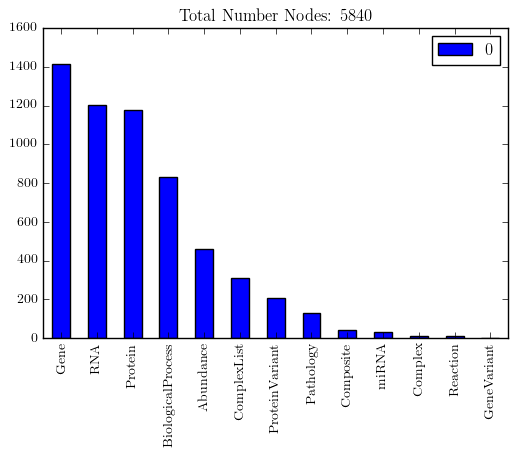

In [3]:
c = Counter(map(itemgetter(0), filter(lambda x:x,g)))
df = pd.DataFrame.from_dict(c, orient='index')
df.sort_values(0, ascending=False).plot(kind='bar')
plt.title('Total Number Nodes: {}'.format(g.number_of_nodes()))
plt.show()

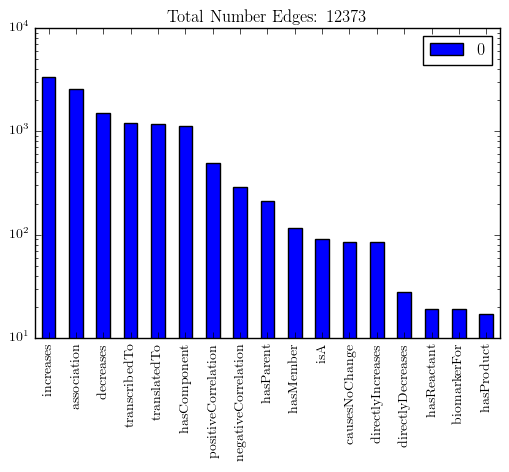

In [4]:
ec = Counter(data['relation'] for u, v, data in g.edges(data=True) if 'relation' in data)
df_ec = pd.DataFrame.from_dict(ec, orient='index')
df_ec.sort_values(0, ascending=False).plot(kind='bar', logy=True)
plt.title('Total Number Edges: {}'.format(g.number_of_edges()))
plt.show()

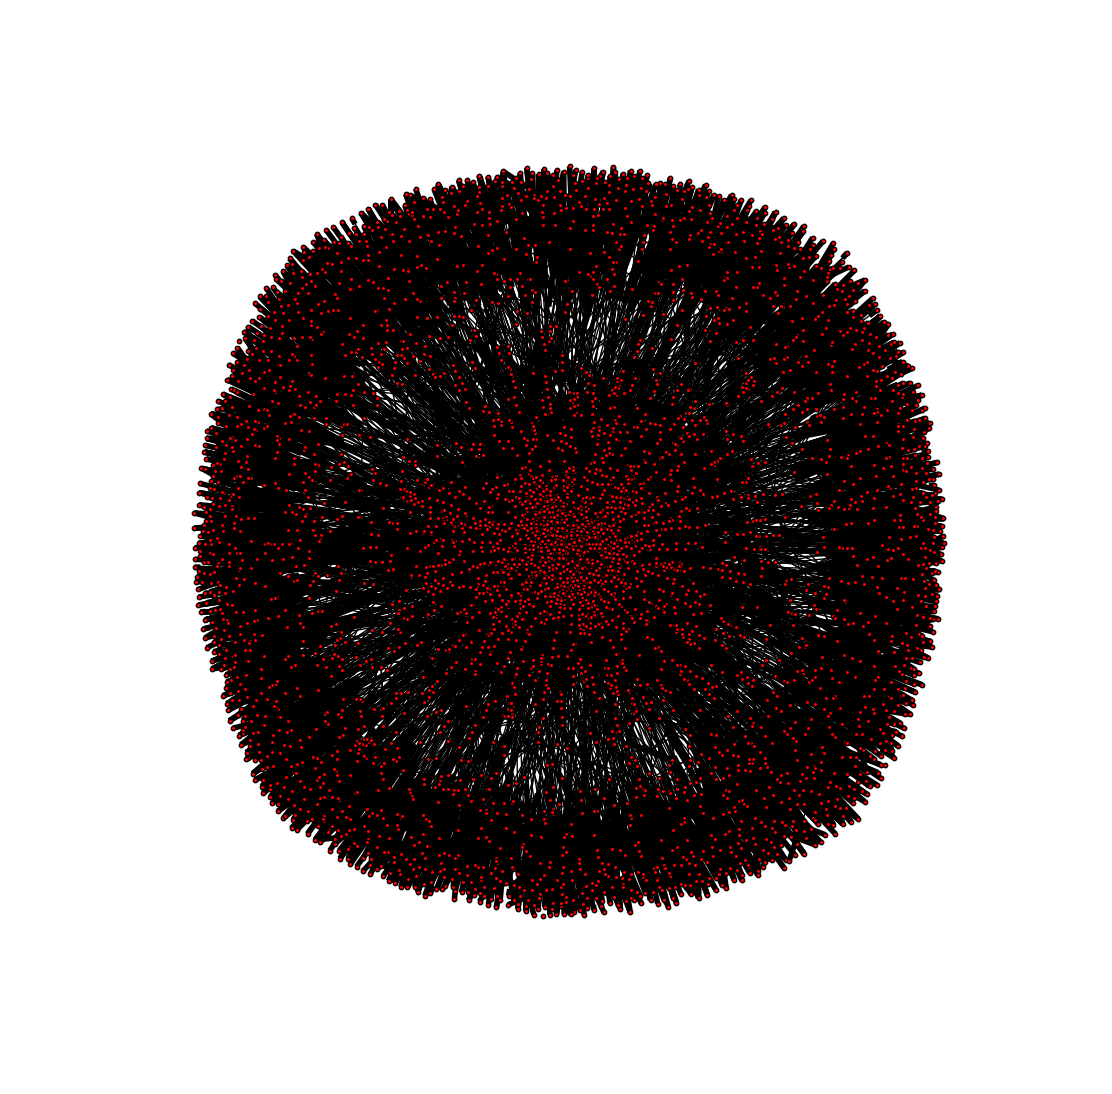

In [5]:
plt.figure(figsize=(10.5, 10.5))
nx.draw(g, node_size=10)